# Initial LCL data analysis & basic MLR model


In [1]:
# import  module containing all my functions 
import mscprojectcoding.FM_MScProject_LoadForecasting_Module as FMmodule


In [2]:
# force reimport of module after edits/updates to functions in PyCharm 
import importlib
importlib.reload(FMmodule)

<module 'mscprojectcoding.FM_MScProject_LoadForecasting_Module' from 'c:\\users\\fmurphy\\onedrive - loughborough university\\fm-project\\mscprojectcoding\\src\\mscprojectcoding\\FM_MScProject_LoadForecasting_Module.py'>

In [3]:
#import all my functions - not all needed.

from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  annPlot                    # plots ANN model forecast for specified windows 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  annPlotInputs              # shift train&test forecasts to align with hr/day indices ie unpack into actual time bands - similar to shiftInputs but returns dictionary of np arreays for test AND train wondows
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_MLP                 # create MLP for ANN
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredictSeries  # split Train and Test numpy arrays for MLR 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredict_df     # split Train and Test data into dfs for ANN - standard version
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredict_df_V2  # split Train and Test data into dfs for ANN - version with day of week classifier scaling
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_save_folder         # create folder name for saving results
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  cv_calc                    # Error calculation - coeff of variance error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  findkeys                   # get all keys and subkeys of nested dictionary 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  flip_dictionary            # invert dictionary nest levels for plotting results (MLR and/or ANN)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  fullprint                  #change num lines to print of a numpy array without changing default
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_NPminmax_values        # get max value in each col OR full np array
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_NaN_stats              # get stats for NaNs in each column
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_TrainTestSeries        # for ANN inputs ?
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_data_range
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_errors                 # compute errors for supplied models, hardwired for MAPE,MAE,CV,RMSE,NRMSE errors
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_limits                 # get x,y limits for plot axis
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_save_folderName        # generate folder name for saving results files
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_uniques                # get unique values from dataframe columns or pd.series?
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_error_percentiles      # get specified percentiles from error dictionary (MLR, ANN)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_errorDictionary        # load error dictionary from disk given path name
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_MLRerrorDictionary     # load MLR error dictionary from disk given path name 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  getRowN_of_uID
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  getTrainTestSeriesNames    # generate list of train, test series names from eg loadSeries, envSeries dictionaries
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  historyPlot                # plots loss function from ANN MLP history object
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  lrmodel_r2                 # 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mae_calc                   # Error calculation - mean avg error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mape_calc                  # Error calculation - Mean avg percentage error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mlr_predict                # returns forecast given MLR regression model
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mlr_train                  # returns MLR regression model 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  merge_TrainTestErrors      # for ANN??
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  nrmse_calc                 # Error calculation - normalised root mean square error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  nrmse_calcV2                 # Error calculation - normalised root mean square error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  peristModelPlot            # plot persistence model series
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistDataWindowed        # generates persistence models with variable window size search
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistScatterPlot         # plot peristance models 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  piecewise_linear           # comput piecewise linear function given slopes, intercept etc
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plotSectionOfLoadProf      # redundant? used in MLR scripts
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_allFeatures           # plot selected columns of numpy array 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_errors                # plot avg errors from errors dictionary (eg for all MLR models)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_forecast              # plot forecast for specified tiime periods (MLR only?)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_percentileTraces      # plot percentile traces extracted from percentile dictionaries created from e.g. ANN and MLR errro dictionaries
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  pltDefaults                # set rc params (matplotlib) plot defaults
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  populate_AllFeatures       # populate numpy array for MLR 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_get                     # persistence model r2 calculations
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_histogram               # plotting of r2 histogram for variable window search persistence model 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_histogramV2             # similar but tailored for publication plots (most series greyed out)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  randomUserGroupAggregate   # form group aggregate load df for random userD grps created by randomUserGroups
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  randomUserGroups           # form random userID clusters of size N  
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  removeNestings
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  rmse_calc                  # Error calculation - root mean sq error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  round_down                 # round a number down to nearest decade (0.1,1,10,100 etc) 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  round_up                   # round a number up to nearest decade (0.1,1,10,100 etc)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_plotErrors             # plot MLR,ANN model errors as boxplot, swarm plot - V1 : plot for various error types - ordered by error type , not model type
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_plotErrors_V2          # plot MLR,ANN model errors as boxplot, swarm plot - V2 : Version 2 :plots one error type with subplot for each model
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_ErrorsAllModels        # multi-model boxplot of errorors in one plot
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_dowSeries              # set day of week classifier channels given a dayOfWeek classifier list
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_envSeries              # set environment series to be used in MLR and/or ANN 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_loadSeries             # select which load series to use in MLR and/or ANN 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  shiftInputs                # shift models/forecast series to align with hr/day indices of load ie unpack into actual time bands
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  show_mem_usage             # shows total memory usage
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  stackplot_of_forecast      # plots time window of all passed model forecasts,loads - load profiles stacked by calendar day


In [4]:
# get list of all functions in module
#dir(FMmodule)

In [5]:
# import standard packages /modules etc : may not need all these..

import matplotlib as mpl

import matplotlib.pyplot as plt     # pyplot = collection of command style functions that make matplotlib work like MATLAB, uses numpy arrays internally
import matplotlib.colors as colors2  # module for converting numbers or color arguments to RGB or RGBA
import matplotlib.cm as cmx         # built-in colour maps and utilities; Any colormap can be reversed by appending '_r', so 'RdYlGn_r' is the reversed Red-Yellow-Green colormap
import matplotlib.mlab as mlab      # matlab compatible cmd names
import matplotlib.ticker as mtick   # configurable tick locating and formatting, used by Axis class
import matplotlib.dates as mdates    # useful for getting tick label as siimple dates

import matplotlib.patches as mpatches  # draw geometric shapes 
from matplotlib.patches import Rectangle
import matplotlib.lines as mlines      # 2D lines
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator,MaxNLocator,PercentFormatter) # needed for eg integer tick marks etc

import seaborn as sns                  # data visualization library based on matplotlib             

%matplotlib inline

import math                            # module provides access to the mathematical functions defined by the C standard
import csv
import sys
import pandas as pd
import numpy as np
import time                 
import re                              # provides regular expression matching operations 
import random
import os

from six.moves import cPickle as pickle   # cPickle is faster as written in C but merged with Pickle in Python 3.x ..

import numpy.polynomial.polynomial as poly  # polynomial functions incl fitting , etc

from sklearn.cluster import KMeans    # Sklearn = SciPy ML toolkit 
from sklearn import linear_model            # Estimated coefficients for linear regression
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression
from sklearn import metrics

from scipy.interpolate import interp1d      # Interpolate a 1-D function.
from scipy.spatial.distance import cdist, pdist       # Pairwise distances between observations in n-dimensional space.
from scipy.spatial.distance import squareform         # Convert a vector-form distance vector to a square-form distance matrix, and vice-versa
from scipy.cluster.hierarchy import dendrogram, linkage   # hierarchical/agglomerative clustering 
from scipy.cluster.hierarchy import fcluster              # Form flat clusters from the hierarchical clustering
from scipy import stats                                   # statistical functions https://docs.scipy.org/doc/scipy/reference/stats.html
from scipy import optimize             # commonly used optimization algorithms eg least squares minimization, curve fitting , etc
from statistics import mean

import json
from datetime import datetime, timedelta 

from itertools import chain           # for iterating through list (of lists) of dictionaries etc
from pathlib import Path              # file/folder paths etc

import requests                              # url requests
from plot_keras_history import plot_history

import importlib  # import other module eg my package

In [6]:
#set matplotlib defaults
#https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

#plt.style.available[:]
#plt.style.use('stylename')
matplotlib.matplotlib_fname()   # find where default rcParams imported from : C:\Users\fmurphy\Miniconda3\envs\fm_ANN\Lib\site-packages\matplotlib\mpl-data\matplotlibrc

#to modify defaults (dynamically - just for this session):
#matplotlib.rc('lines', linewidth=2, color='r')


# set fontsizes etc for plotting 
plt.rcParams["axes.labelsize"] = 15
plt.rc('legend',fontsize=10) # using a size in points
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

#sns.set_style("dark")  # make background grey 
sns.set_style("whitegrid")  # white background, greyt grid lines


#print(plt.rcParams)

In [7]:
# SET SEABORN DEFAULTS

# https://seaborn.pydata.org/tutorial/aesthetics.html
# https://seaborn.pydata.org/generated/seaborn.set_style.html
# https://matplotlib.org/tutorials/introductory/customizing.html

#sns.set_style() # (style=None, rc=None) Set the aesthetic style of the plots. 
sns.set_style(style="whitegrid",
              rc= 
             {'axes.linewidth': 1, 
               'axes.edgecolor':'black', 
               'xtick.direction': 'out',
               'xtick.major.size': 4.0, 
               'ytick.direction': 'out', 
               'ytick.major.size': 4.0, 
               'axes.facecolor': 'white',
               'grid.color': '.8', 
               'grid.linestyle': u'-', 
               'xtick.minor.size': 3.0, 
               'ytick.minor.size': 3.0, 
               'grid.linewidth': 0.})        
sns.axes_style()                  # returns current settings (default axes styles)

plt.style.use('seaborn')     # switch to seaborn style
# plot code
# ...

plt.style.use('default')     # switches back to default matplotlib style
# plot code
# ...

# to see all available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [8]:
# to avoid warning message 
#C:\Users\fmurphy\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [9]:
# override some default print parameters
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',None)

#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=2000)
np.set_printoptions(edgeitems=10)


In [27]:
# load the data from pickle file
consumption_df = pd.read_pickle('../MScProjectCoding/project_data/intermediateDataLCL/cleaned_London_data_subset.pkl')  # read pickled file created by read_csv.CHUNKs script
print(consumption_df.shape)
consumption_df.groupby('tarrif').user_id.count()
consumption_df.head()


(1132, 17524)


user_id tarrif    Acorn    Acorn_Grp  2013-01-01 00:00:00  \
meterID                                                              
2              2    Std  ACORN-A     Affluent                0.219   
6              6    Std  ACORN-Q    Adversity                0.000   
10            10    Std  ACORN-H  Comfortable                0.509   
18            18    Std  ACORN-E     Affluent                0.187   
19            19    Std  ACORN-K    Adversity                0.195   

         2013-01-01 00:30:00  2013-01-01 01:00:00  2013-01-01 01:30:00  \
meterID                                                                  
2                      0.241                0.191                0.235   
6                      0.000                0.000                0.000   
10                     0.453                0.500                0.621   
18                     0.191                0.131                0.146   
19                     0.087                0.116                0.069   

         2013-01-01 02:00:00  2013-01-01 02:30:00  2013-01-01 03:00:00  \
meterID                                                                  
2                      0.182                0.229                0.194   
6                      0.000                0.000                0.000   
10                     0.197                0.176                0.210   
18                     0.115                0.142                0.133   
19                     0.109                0.068                0.109   

         2013-01-01 03:30:00  2013-01-01 04:00:00  2013-01-01 04:30:00  \
meterID                                                                  
2                      0.201                0.122                0.099   
6                      0.000                0.000                0.000   
10                     0.211                0.151                0.152   
18                     0.124                0.161                0.253   
19                     0.028                0.052                0.029   

         2013-01-01 05:00:00  2013-01-01 05:30:00  2013-01-01 06:00:00  \
meterID                                                                  
2                      0.123                0.083                0.130   
6                      0.000                0.000                0.000   
10                     0.236                0.214                0.184   
18                     0.481                0.270                0.288   
19                     0.061                0.091                0.085   

         2013-01-01 06:30:00  2013-01-01 07:00:00  2013-01-01 07:30:00  \
meterID                                                                  
2                      0.076                0.126                0.091   
6                      0.000                0.023                0.045   
10                     0.205                0.245                0.207   
18                     0.271                0.281                0.251   
19                     0.095                0.104                0.122   

         2013-01-01 08:00:00  2013-01-01 08:30:00  2013-01-01 09:00:00  \
meterID                                                                  
2                      0.110                0.106                0.094   
6                      0.045                0.045                0.044   
10                     0.208                0.495                0.267   
18                     0.304                0.206                0.193   
19                     0.050                0.490                0.252   

         2013-01-01 09:30:00  2013-01-01 10:00:00  2013-01-01 10:30:00  \
meterID                                                                  
2                      0.122                0.076                0.124   
6                      0.025                0.000                0.000   
10                     0.245                0.409                0.345   
18                     0.145      

In [28]:
cIDs = consumption_df.user_id.unique()  #return NumPy array with unique values of the column (alreadty unique from pre-processing)
cIDs


array([   2,    6,   10,   18,   19,   27,   40,   48,   49,   57,   60,
         91,   99,  100,  102,  106,  107,  111,  116,  117,  123,  131,
        140,  145,  147,  152,  162,  165,  168,  179,  180,  181,  187,
        193,  228,  248,  255,  260,  267,  270,  277,  280,  281,  295,
        301,  303,  306,  307,  312,  313,  314,  317,  320,  322,  323,
        330,  331,  349,  350,  355,  357,  359,  363,  367,  373,  376,
        381,  383,  390,  396,  397,  415,  418,  433,  439,  443,  447,
        455,  462,  478,  496,  498,  502,  506,  507,  510,  525,  539,
        542,  547,  565,  566,  568,  572,  573,  578,  580,  582,  586,
        587,  590,  593,  604,  605,  609,  612,  614,  615,  618,  621,
        623,  632,  634,  638,  644,  649,  652,  654,  663,  670,  676,
        682,  685,  686,  689,  692,  714,  715,  716,  722,  723,  727,
        731,  732,  737,  742,  746,  749,  750,  754,  756,  769,  772,
        773,  784,  791,  809,  814,  822,  827,  8

In [29]:
# set user_id as index

#consumption_df.rename(columns = {'meterID':'userID'}, inplace = True) 
#consumption_df.rename_axis("user_id")
print(len(consumption_df))
consumption_df = consumption_df.set_index('user_id')
consumption_df.head()

1132


tarrif    Acorn    Acorn_Grp  2013-01-01 00:00:00  \
user_id                                                     
2          Std  ACORN-A     Affluent                0.219   
6          Std  ACORN-Q    Adversity                0.000   
10         Std  ACORN-H  Comfortable                0.509   
18         Std  ACORN-E     Affluent                0.187   
19         Std  ACORN-K    Adversity                0.195   

         2013-01-01 00:30:00  2013-01-01 01:00:00  2013-01-01 01:30:00  \
user_id                                                                  
2                      0.241                0.191                0.235   
6                      0.000                0.000                0.000   
10                     0.453                0.500                0.621   
18                     0.191                0.131                0.146   
19                     0.087                0.116                0.069   

         2013-01-01 02:00:00  2013-01-01 02:30:00  2013-01-01 03:00:00  \
user_id                                                                  
2                      0.182                0.229                0.194   
6                      0.000                0.000                0.000   
10                     0.197                0.176                0.210   
18                     0.115                0.142                0.133   
19                     0.109                0.068                0.109   

         2013-01-01 03:30:00  2013-01-01 04:00:00  2013-01-01 04:30:00  \
user_id                                                                  
2                      0.201                0.122                0.099   
6                      0.000                0.000                0.000   
10                     0.211                0.151                0.152   
18                     0.124                0.161                0.253   
19                     0.028                0.052                0.029   

         2013-01-01 05:00:00  2013-01-01 05:30:00  2013-01-01 06:00:00  \
user_id                                                                  
2                      0.123                0.083                0.130   
6                      0.000                0.000                0.000   
10                     0.236                0.214                0.184   
18                     0.481                0.270                0.288   
19                     0.061                0.091                0.085   

         2013-01-01 06:30:00  2013-01-01 07:00:00  2013-01-01 07:30:00  \
user_id                                                                  
2                      0.076                0.126                0.091   
6                      0.000                0.023                0.045   
10                     0.205                0.245                0.207   
18                     0.271                0.281                0.251   
19                     0.095                0.104                0.122   

         2013-01-01 08:00:00  2013-01-01 08:30:00  2013-01-01 09:00:00  \
user_id                                                                  
2                      0.110                0.106                0.094   
6                      0.045                0.045                0.044   
10                     0.208                0.495                0.267   
18                     0.304                0.206                0.193   
19                     0.050                0.490                0.252   

         2013-01-01 09:30:00  2013-01-01 10:00:00  2013-01-01 10:30:00  \
user_id                                                                  
2                      0.122                0.076                0.124   
6                      0.025                0.000                0.000   
10                     0.245                0.409                0.345   
18                     0.145                0.130                0.122   
19                    

In [30]:
#consumption_df.iloc[:,3:] <= 0.001    # show where ~0 load values

In [31]:
#get idea of how many 0 values are in consumption_df
# treat <= 0.0001 as 0

consumption_df.shape
df_zeroVals = (consumption_df.iloc[:,3:] <= 0.0001).astype(int).sum(axis=1)    # return series with count of number 0 values for each uID (row)
print("Number of 0 values for each uID: \n",df_zeroVals)
consumption_df_zeros = consumption_df[(df_zeroVals != 0.00)]

print("Number of uIDs with at least data point at  ~0 load value in full year: ",(df_zeroVals != 0).astype(int).sum(axis=0)  )          # count number of uIDs with 0 values

#consumption_df_zeros

Number of 0 values for each uID: 
 user_id
2          0
6       1155
10         0
18         0
19         0
        ... 
5538       0
5539       0
5540       0
5549       0
5552      35
Length: 1132, dtype: int64
Number of uIDs with at least data point at  ~0 load value in full year:  203


In [32]:
# get all data where no 0 values for uID
df_loadData = consumption_df[(df_zeroVals == 0)]
print(df_loadData.shape)
df_loadData.tail()

(929, 17523)


tarrif    Acorn    Acorn_Grp  2013-01-01 00:00:00  \
user_id                                                     
5535       ToU  ACORN-F  Comfortable                0.020   
5538       ToU  ACORN-F  Comfortable                0.020   
5539       Std  ACORN-E     Affluent                0.499   
5540       Std  ACORN-N    Adversity                0.059   
5549       ToU  ACORN-K    Adversity                0.118   

         2013-01-01 00:30:00  2013-01-01 01:00:00  2013-01-01 01:30:00  \
user_id                                                                  
5535                   0.023                0.067                0.084   
5538                   0.018                0.018                0.042   
5539                   0.440                0.300                0.319   
5540                   0.032                0.069                0.062   
5549                   0.210                0.228                0.171   

         2013-01-01 02:00:00  2013-01-01 02:30:00  2013-01-01 03:00:00  \
user_id                                                                  
5535                   0.045                0.052                0.052   
5538                   0.040                0.040                0.013   
5539                   0.215                0.187                0.138   
5540                   0.030                0.063                0.067   
5549                   0.071                0.078                0.087   

         2013-01-01 03:30:00  2013-01-01 04:00:00  2013-01-01 04:30:00  \
user_id                                                                  
5535                   0.061                0.096                0.081   
5538                   0.012                0.010                0.011   
5539                   0.136                0.174                0.183   
5540                   0.030                0.056                0.066   
5549                   0.032                0.100                0.103   

         2013-01-01 05:00:00  2013-01-01 05:30:00  2013-01-01 06:00:00  \
user_id                                                                  
5535                   0.039                0.036                0.055   
5538                   0.010                0.011                0.010   
5539                   0.122                0.180                0.214   
5540                   0.031                0.057                0.066   
5549                   0.081                0.042                0.036   

         2013-01-01 06:30:00  2013-01-01 07:00:00  2013-01-01 07:30:00  \
user_id                                                                  
5535                   0.087                0.076                0.038   
5538                   0.010                0.010                0.010   
5539                   0.176                0.212                0.224   
5540                   0.030                0.057                0.062   
5549                   0.092                0.261                0.652   

         2013-01-01 08:00:00  2013-01-01 08:30:00  2013-01-01 09:00:00  \
user_id                                                                  
5535                   0.055                0.035                0.079   
5538                   0.011                0.010                0.029   
5539                   0.318                0.216                0.342   
5540                   0.030                0.061                0.100   
5549                   0.775                0.824                0.800   

         2013-01-01 09:30:00  2013-01-01 10:00:00  2013-01-01 10:30:00  \
user_id                                                                  
5535                   0.083                0.057                0.036   
5538                   0.041                0.040                0.035   
5539                   0.220                0.282                0.465   
5540                   0.077                0.074                0.071   
5549                  

In [33]:
# write df_loadData to pickle file
#df_loadData.to_pickle('./intermediateData/LCL_df_loadData.pkl')

In [34]:
df_loadData = pd.read_pickle('../MScProjectCoding/project_data/intermediateDataLCL/LCL_df_loadData.pkl')

** Note: may want to reload with gap filled version at some stage  **

** Drop ToU tarrif for now, keep Std**

In [35]:
#drop Time Of Use tarrif for now, keep standard tarrif 

#df_loadData.groupby('tarrif').count()
#df_loadData.groupby('Acorn_Grp').count()
df_loadDataStd = df_loadData[df_loadData.tarrif != 'ToU']
df_loadDataStd.head()



tarrif    Acorn    Acorn_Grp  2013-01-01 00:00:00  \
user_id                                                     
2          Std  ACORN-A     Affluent                0.219   
10         Std  ACORN-H  Comfortable                0.509   
18         Std  ACORN-E     Affluent                0.187   
19         Std  ACORN-K    Adversity                0.195   
27         Std  ACORN-J  Comfortable                0.240   

         2013-01-01 00:30:00  2013-01-01 01:00:00  2013-01-01 01:30:00  \
user_id                                                                  
2                      0.241                0.191                0.235   
10                     0.453                0.500                0.621   
18                     0.191                0.131                0.146   
19                     0.087                0.116                0.069   
27                     0.218                0.379                0.215   

         2013-01-01 02:00:00  2013-01-01 02:30:00  2013-01-01 03:00:00  \
user_id                                                                  
2                      0.182                0.229                0.194   
10                     0.197                0.176                0.210   
18                     0.115                0.142                0.133   
19                     0.109                0.068                0.109   
27                     0.254                0.196                0.190   

         2013-01-01 03:30:00  2013-01-01 04:00:00  2013-01-01 04:30:00  \
user_id                                                                  
2                      0.201                0.122                0.099   
10                     0.211                0.151                0.152   
18                     0.124                0.161                0.253   
19                     0.028                0.052                0.029   
27                     0.135                0.144                0.103   

         2013-01-01 05:00:00  2013-01-01 05:30:00  2013-01-01 06:00:00  \
user_id                                                                  
2                      0.123                0.083                0.130   
10                     0.236                0.214                0.184   
18                     0.481                0.270                0.288   
19                     0.061                0.091                0.085   
27                     0.126                0.145                0.126   

         2013-01-01 06:30:00  2013-01-01 07:00:00  2013-01-01 07:30:00  \
user_id                                                                  
2                      0.076                0.126                0.091   
10                     0.205                0.245                0.207   
18                     0.271                0.281                0.251   
19                     0.095                0.104                0.122   
27                     0.133                0.119                0.149   

         2013-01-01 08:00:00  2013-01-01 08:30:00  2013-01-01 09:00:00  \
user_id                                                                  
2                      0.110                0.106                0.094   
10                     0.208                0.495                0.267   
18                     0.304                0.206                0.193   
19                     0.050                0.490                0.252   
27                     0.123                0.103                0.132   

         2013-01-01 09:30:00  2013-01-01 10:00:00  2013-01-01 10:30:00  \
user_id                                                                  
2                      0.122                0.076                0.124   
10                     0.245                0.409                0.345   
18                     0.145                0.130                0.122   
19                     0.182                0.178                0.188   
27                    

In [36]:
Nusers = df_loadDataStd.shape[0]
Nusers


722

In [37]:
# check if still have good distribution across acorn groups
# consumption_df.groupby('Acorn_Grp').count()  # 1132 users (before got rid of users with 0 values and/or ToU tariffs)
df_loadDataStd.groupby('Acorn_Grp').count()

tarrif  Acorn  2013-01-01 00:00:00  2013-01-01 00:30:00  \
Acorn_Grp                                                              
ACORN-U           7      7                    7                    7   
Adversity       222    222                  222                  222   
Affluent        294    294                  294                  294   
Comfortable     199    199                  199                  199   

             2013-01-01 01:00:00  2013-01-01 01:30:00  2013-01-01 02:00:00  \
Acorn_Grp                                                                    
ACORN-U                        7                    7                    7   
Adversity                    222                  222                  222   
Affluent                     294                  294                  294   
Comfortable                  199                  199                  199   

             2013-01-01 02:30:00  2013-01-01 03:00:00  2013-01-01 03:30:00  \
Acorn_Grp                                                                    
ACORN-U                        7                    7                    7   
Adversity                    222                  222                  222   
Affluent                     294                  294                  294   
Comfortable                  199                  199                  199   

             2013-01-01 04:00:00  2013-01-01 04:30:00  2013-01-01 05:00:00  \
Acorn_Grp                                                                    
ACORN-U                        7                    7                    7   
Adversity                    222                  222                  222   
Affluent                     294                  294                  294   
Comfortable                  199                  199                  199   

             2013-01-01 05:30:00  2013-01-01 06:00:00  2013-01-01 06:30:00  \
Acorn_Grp                                                                    
ACORN-U                        7                    7                    7   
Adversity                    222                  222                  222   
Affluent                     294                  294                  294   
Comfortable                  199                  199                  199   

             2013-01-01 07:00:00  2013-01-01 07:30:00  2013-01-01 08:00:00  \
Acorn_Grp                                                                    
ACORN-U                        7                    7                    7   
Adversity                    222                  222                  222   
Affluent                     294                  294                  294   
Comfortable                  199                  199                  199   

             2013-01-01 08:30:00  2013-01-01 09:00:00  2013-01-01 09:30:00  \
Acorn_Grp                                                                    
ACORN-U                        7                    7                    7   
Adversity                    222                  222                  222   
Affluent                     294                  294                  294   
Comfortable                  199                  199                  199   

             2013-01-01 10:00:00  2013-01-01 10:30:00  2013-01-01 11:00:00  \
Acorn_Grp                                                                    
ACORN-U                        7                    7                    7   
Adversity                    222                  222                  222   
Affluent                     294                  294                  294   
Comfortable                  199                  199                  199   

             2013-01-01 11:30:00  2013-01-01 12:00:00  2013-01-01 12:30:00  \
Acorn_Grp                                                                    
ACORN-U                        7                    7                    7   
Adversity                    222                  222          

In [38]:
# save cleaned 30min load data :
df_loadDataStd.to_pickle('../MScProjectCoding/project_data/intermediateDataLCL/LCL_df_loadData_30min.pkl')

In [39]:
df_loadDataStd = pd.read_pickle('../MScProjectCoding/project_data/intermediateDataLCL/LCL_df_loadData_30min.pkl')

# Plot consumption profile for single /few users


index data:2013-02-15 00:00:00 hr:0,startTick:2160,Window:[2160, 2496],Length(hrs) 168.0


(<Figure size 1200x400 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x28f998b7e80>])

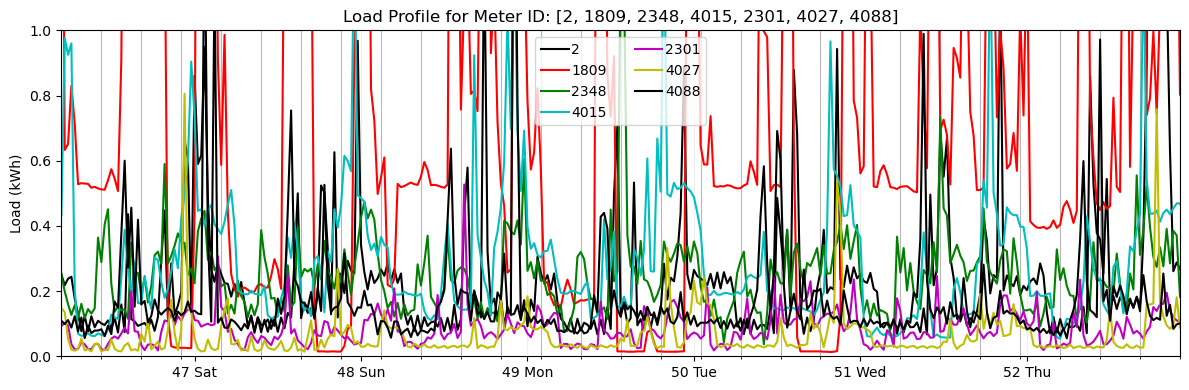

In [40]:
#uID = [2]
uID = [2,1809, 2348, 4015, 2301, 4027, 4088]

startDay=45
smplsPerDay=48
startIndexToPlot=(startDay*smplsPerDay)
nDays=7

load_df = pd.DataFrame(df_loadDataStd.iloc[:,3:].loc[uID]) #,columns=[uID])  # full load series for calendar year
type(load_df)
load_df.T
labelTitle = 'Load Profile for Meter ID: '+str(uID)

plotSectionOfLoadProf(load_df.T,startIndexToPlot,nDays,labelTitle,smplsPerDay)

keep just load data, convert from 1/2hr to 1 hr data (data is given as kWh at 30min intervals) 

Note: here I was following example from Ed's code / Texas data .. at some stage could go back and use original 1/2 hr data?

In [41]:
cIDs = df_loadDataStd.index.values #.user_id.unique()
type(cIDs)

numpy.ndarray

In [42]:
# extract all load data , first to df; 

min30_df = df_loadDataStd.iloc[:,3:]    # dataframe with all rows, from columnn 3 

In [43]:
# now convert to np array
min30Vals = min30_df.iloc[:,:].values   # numpy array with all 30min consumption data values
min30Vals


array([[0.219    , 0.241    , 0.191    , 0.235    , 0.182    , 0.229    ,
        0.194    , 0.201    , 0.122    , 0.099    , ..., 0.252    ,
        0.307    , 0.833    , 0.4      , 0.332    , 0.451    , 0.456    ,
        0.402    , 0.491    , 0.452    ],
       [0.509    , 0.453    , 0.5      , 0.621    , 0.197    , 0.176    ,
        0.21     , 0.211    , 0.151    , 0.152    , ..., 1.016    ,
        1.558    , 1.391    , 1.198    , 0.932    , 0.715    , 0.697    ,
        0.779    , 0.851    , 0.85     ],
       [0.187    , 0.191    , 0.131    , 0.146    , 0.115    , 0.142    ,
        0.133    , 0.124    , 0.161    , 0.253    , ..., 0.565    ,
        0.292    , 0.127    , 0.125    , 0.128    , 0.145    , 0.135    ,
        0.132    , 0.139    , 0.134    ],
       [0.195    , 0.087    , 0.116    , 0.069    , 0.109    , 0.068    ,
        0.109    , 0.028    , 0.052    , 0.029    , ..., 0.206    ,
        0.197    , 0.218    , 0.219    , 0.218    , 0.19     , 0.221    ,
        0.

In [44]:
print(min30Vals.min())   # min value in all array
#min30Vals.min(axis=1)    # min value in each row
#print(len(np.where(min30Vals==0.0)[0]))
#len(np.where(min30Vals==0.0))
#np.count_nonzero(min30Vals, axis=1)

0.001


In [45]:
# change the vals to hourly  - assume kWh units of energy "dataset contains energy consumption, in kWh (per half hour)"
[a,b] = np.shape(min30Vals)   # numpy array 
print("Shape: ",[a,b])
hourlyVals = np.zeros((a,np.int(b/2)))  # numpy array with b/2 columns
for j in range(np.int(b/2)):
    hourlyVals[:,j] = np.sum(min30Vals[:,j*2+0:(j+1)*2], axis=1)  # for each row (user_id), sum columns in groups of 2 ie 1hr
 
hourlyVals

Shape:  [722, 17520]


array([[0.46     , 0.426    , 0.411    , 0.395    , 0.221    , 0.206    ,
        0.206    , 0.217    , 0.216    , 0.216    , ..., 0.62     ,
        1.034    , 0.841    , 0.747    , 0.477    , 0.559    , 1.233    ,
        0.783    , 0.858    , 0.943    ],
       [0.962    , 1.121    , 0.373    , 0.421    , 0.303    , 0.45     ,
        0.389    , 0.452    , 0.703    , 0.512    , ..., 2.57     ,
        3.8569999, 3.3589999, 2.881    , 3.575    , 2.574    , 2.589    ,
        1.647    , 1.476    , 1.701    ],
       [0.378    , 0.277    , 0.257    , 0.257    , 0.414    , 0.751    ,
        0.559    , 0.532    , 0.51     , 0.338    , ..., 0.557    ,
        0.292    , 0.468    , 1.104    , 1.109    , 0.857    , 0.252    ,
        0.273    , 0.267    , 0.273    ],
       [0.282    , 0.185    , 0.177    , 0.137    , 0.081    , 0.152    ,
        0.18     , 0.226    , 0.54     , 0.434    , ..., 0.445    ,
        0.467    , 0.52     , 0.711    , 0.463    , 0.403    , 0.437    ,
        0.

In [46]:
# make an hourly dataframe - for now
colsT = pd.date_range(start='1/1/2013', end='1/1/2014', freq='1H')[0:-1]  #https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
print(len(colsT))
hourly_df = pd.DataFrame(hourlyVals, index=np.arange(a), columns=colsT)  #np.arange(a) start = 0, stop=a,step=1  
hourly_df

8760


2013-01-01 00:00:00  2013-01-01 01:00:00  2013-01-01 02:00:00  \
0                  0.460                0.426                0.411   
1                  0.962                1.121                0.373   
2                  0.378                0.277                0.257   
3                  0.282                0.185                0.177   
4                  0.458                0.594                0.450   
..                   ...                  ...                  ...   
717                0.398                0.284                0.270   
718                0.258                0.221                0.070   
719                0.624                0.150                0.125   
720                0.939                0.619                0.402   
721                0.091                0.131                0.093   

     2013-01-01 03:00:00  2013-01-01 04:00:00  2013-01-01 05:00:00  \
0                  0.395                0.221                0.206   
1                  0.421                0.303                0.450   
2                  0.257                0.414                0.751   
3                  0.137                0.081                0.152   
4                  0.325                0.247                0.271   
..                   ...                  ...                  ...   
717                0.281                0.251                0.296   
718                0.168                0.133                0.080   
719                0.124                0.116                0.129   
720                0.274                0.357                0.302   
721                0.097                0.122                0.088   

     2013-01-01 06:00:00  2013-01-01 07:00:00  2013-01-01 08:00:00  \
0                  0.206                0.217                0.216   
1                  0.389                0.452                0.703   
2                  0.559                0.532                0.510   
3                  0.180                0.226                0.540   
4                  0.259                0.268                0.226   
..                   ...                  ...                  ...   
717                0.220                0.401                1.072   
718                0.074                0.073                0.090   
719                0.113                0.398                0.496   
720                0.390                0.436                0.534   
721                0.096                0.119                0.091   

     2013-01-01 09:00:00  2013-01-01 10:00:00  2013-01-01 11:00:00  \
0                  0.216                0.200                0.242   
1                  0.512                0.754                2.117   
2                  0.338                0.252                0.265   
3                  0.434                0.366                0.352   
4                  0.215                0.374                0.368   
..                   ...                  ...                  ...   
717                0.485                0.361                0.272   
718                0.089                0.307                0.148   
719                0.832                0.224                0.200   
720                0.562                0.747                0.499   
721                0.177                0.145                0.085   

     2013-01-01 12:00:00  2013-01-01 13:00:00  2013-01-01 14:00:00  \
0                  1.301                0.341                0.594   
1                  1.482                0.615                0.578   
2                  0.269                0.246                0.249   
3                  0.948                0.215                0.165   
4                  0.447                1.058                0.717   
..                   ...                  ...                  ...   
717                0.383                0.750                0.373   
718                0.368                0.627                0.211   
719        

In [47]:
hourly_df['user_id'] = cIDs
cIDs

array([   2,   10,   18,   19,   27,   40,   49,   57,   60,   91,   99,
        100,  102,  111,  116,  117,  123,  131,  140,  145,  152,  162,
        168,  179,  181,  228,  248,  255,  260,  267,  270,  277,  280,
        281,  295,  301,  306,  307,  312,  313,  314,  317,  320,  322,
        323,  330,  349,  350,  355,  357,  359,  363,  367,  373,  381,
        396,  397,  415,  443,  455,  462,  496,  498,  502,  506,  510,
        547,  566,  568,  572,  573,  578,  604,  612,  614,  618,  623,
        632,  634,  638,  644,  654,  663,  670,  676,  682,  685,  686,
        689,  692,  715,  727,  731,  732,  737,  742,  746,  750,  756,
        773,  784,  809,  827,  852,  855,  867,  872,  876,  888,  891,
        899,  903,  909,  919,  952,  955,  956,  966,  968,  995, 1000,
       1003, 1008, 1021, 1029, 1032, 1060, 1072, 1081, 1088, 1112, 1114,
       1128, 1130, 1135, 1151, 1164, 1168, 1178, 1183, 1184, 1210, 1212,
       1214, 1221, 1227, 1233, 1236, 1241, 1244, 12

In [48]:
# only run once!
hourly_df = hourly_df.set_index('user_id')
hourly_df

2013-01-01 00:00:00  2013-01-01 01:00:00  2013-01-01 02:00:00  \
user_id                                                                  
2                      0.460                0.426                0.411   
10                     0.962                1.121                0.373   
18                     0.378                0.277                0.257   
19                     0.282                0.185                0.177   
27                     0.458                0.594                0.450   
...                      ...                  ...                  ...   
5526                   0.398                0.284                0.270   
5527                   0.258                0.221                0.070   
5530                   0.624                0.150                0.125   
5539                   0.939                0.619                0.402   
5540                   0.091                0.131                0.093   

         2013-01-01 03:00:00  2013-01-01 04:00:00  2013-01-01 05:00:00  \
user_id                                                                  
2                      0.395                0.221                0.206   
10                     0.421                0.303                0.450   
18                     0.257                0.414                0.751   
19                     0.137                0.081                0.152   
27                     0.325                0.247                0.271   
...                      ...                  ...                  ...   
5526                   0.281                0.251                0.296   
5527                   0.168                0.133                0.080   
5530                   0.124                0.116                0.129   
5539                   0.274                0.357                0.302   
5540                   0.097                0.122                0.088   

         2013-01-01 06:00:00  2013-01-01 07:00:00  2013-01-01 08:00:00  \
user_id                                                                  
2                      0.206                0.217                0.216   
10                     0.389                0.452                0.703   
18                     0.559                0.532                0.510   
19                     0.180                0.226                0.540   
27                     0.259                0.268                0.226   
...                      ...                  ...                  ...   
5526                   0.220                0.401                1.072   
5527                   0.074                0.073                0.090   
5530                   0.113                0.398                0.496   
5539                   0.390                0.436                0.534   
5540                   0.096                0.119                0.091   

         2013-01-01 09:00:00  2013-01-01 10:00:00  2013-01-01 11:00:00  \
user_id                                                                  
2                      0.216                0.200                0.242   
10                     0.512                0.754                2.117   
18                     0.338                0.252                0.265   
19                     0.434                0.366                0.352   
27                     0.215                0.374                0.368   
...                      ...                  ...                  ...   
5526                   0.485                0.361                0.272   
5527                   0.089                0.307                0.148   
5530                   0.832                0.224                0.200   
5539                   0.562                0.747                0.499   
5540                   0.177                0.145                0.085   

         2013-01-01 12:00:00  2013-01-01 13:00:00  2013-01-01 14:00:00  \
user_id                                                                  
2        

started with 1132 users out of 5567 (that had full data for 2013)     
a) dropped ~ 203 users with 0 vaue loads      
b) dropped 207 ToU tarrif users => 1132-203-207=722

# Master load dataset for use in all subsequent analysis :

In [50]:
# write hourly_df to pkl file
hourly_df.to_pickle('../MScProjectCoding/project_data/intermediateDataLCL/LCL_hourly_df.pkl')

In [52]:
hourly_df

2013-01-01 00:00:00  2013-01-01 01:00:00  2013-01-01 02:00:00  \
user_id                                                                  
2                      0.460                0.426                0.411   
10                     0.962                1.121                0.373   
18                     0.378                0.277                0.257   
19                     0.282                0.185                0.177   
27                     0.458                0.594                0.450   
...                      ...                  ...                  ...   
5526                   0.398                0.284                0.270   
5527                   0.258                0.221                0.070   
5530                   0.624                0.150                0.125   
5539                   0.939                0.619                0.402   
5540                   0.091                0.131                0.093   

         2013-01-01 03:00:00  2013-01-01 04:00:00  2013-01-01 05:00:00  \
user_id                                                                  
2                      0.395                0.221                0.206   
10                     0.421                0.303                0.450   
18                     0.257                0.414                0.751   
19                     0.137                0.081                0.152   
27                     0.325                0.247                0.271   
...                      ...                  ...                  ...   
5526                   0.281                0.251                0.296   
5527                   0.168                0.133                0.080   
5530                   0.124                0.116                0.129   
5539                   0.274                0.357                0.302   
5540                   0.097                0.122                0.088   

         2013-01-01 06:00:00  2013-01-01 07:00:00  2013-01-01 08:00:00  \
user_id                                                                  
2                      0.206                0.217                0.216   
10                     0.389                0.452                0.703   
18                     0.559                0.532                0.510   
19                     0.180                0.226                0.540   
27                     0.259                0.268                0.226   
...                      ...                  ...                  ...   
5526                   0.220                0.401                1.072   
5527                   0.074                0.073                0.090   
5530                   0.113                0.398                0.496   
5539                   0.390                0.436                0.534   
5540                   0.096                0.119                0.091   

         2013-01-01 09:00:00  2013-01-01 10:00:00  2013-01-01 11:00:00  \
user_id                                                                  
2                      0.216                0.200                0.242   
10                     0.512                0.754                2.117   
18                     0.338                0.252                0.265   
19                     0.434                0.366                0.352   
27                     0.215                0.374                0.368   
...                      ...                  ...                  ...   
5526                   0.485                0.361                0.272   
5527                   0.089                0.307                0.148   
5530                   0.832                0.224                0.200   
5539                   0.562                0.747                0.499   
5540                   0.177                0.145                0.085   

         2013-01-01 12:00:00  2013-01-01 13:00:00  2013-01-01 14:00:00  \
user_id                                                                  
2        

In [53]:
# first lets look at the consumption data - aggregate plus a couple of individual
aggregateLoad = hourly_df.sum(axis=0)    # sum each column ie aggregate of all users at each time 
print("Aggregate Load: \n",aggregateLoad)
annualUserLoad = pd.DataFrame(hourly_df.sum(axis=1),columns=['Annual Load'])
print("Annual user load: \n",annualUserLoad)


Aggregate Load: 
 2013-01-01 00:00:00    459.465
2013-01-01 01:00:00    379.727
2013-01-01 02:00:00    295.575
2013-01-01 03:00:00    253.434
2013-01-01 04:00:00    231.147
                        ...   
2013-12-31 19:00:00    639.031
2013-12-31 20:00:00    585.349
2013-12-31 21:00:00    518.606
2013-12-31 22:00:00    480.386
2013-12-31 23:00:00    428.246
Length: 8760, dtype: float64
Annual user load: 
          Annual Load
user_id             
2        4214.648000
10       9308.915997
18       3723.387000
19       2309.475000
27       3174.822000
...              ...
5526     3781.546000
5527     2239.141000
5530     4207.295000
5539     5884.509001
5540     1726.336000

[722 rows x 1 columns]


In [54]:
print("Average household annual consumption is ",annualUserLoad.sum(axis=0)/hourly_df.shape[0])
print("std deviation of annual consumption is : {0} \n".format(annualUserLoad.std(axis=0)))

Average household annual consumption is  Annual Load    4219.221615
dtype: float64
std deviation of annual consumption is : Annual Load    3140.596645
dtype: float64 



above figure ties with reported here:
https://www.ovoenergy.com/guides/energy-guides/how-much-electricity-does-a-home-use.html

In [55]:
print("Mean annual load:",aggregateLoad)
aggregateLoad
#aggregateLoad.index

Mean annual load: 2013-01-01 00:00:00    459.465
2013-01-01 01:00:00    379.727
2013-01-01 02:00:00    295.575
2013-01-01 03:00:00    253.434
2013-01-01 04:00:00    231.147
                        ...   
2013-12-31 19:00:00    639.031
2013-12-31 20:00:00    585.349
2013-12-31 21:00:00    518.606
2013-12-31 22:00:00    480.386
2013-12-31 23:00:00    428.246
Length: 8760, dtype: float64


2013-01-01 00:00:00    459.465
2013-01-01 01:00:00    379.727
2013-01-01 02:00:00    295.575
2013-01-01 03:00:00    253.434
2013-01-01 04:00:00    231.147
                        ...   
2013-12-31 19:00:00    639.031
2013-12-31 20:00:00    585.349
2013-12-31 21:00:00    518.606
2013-12-31 22:00:00    480.386
2013-12-31 23:00:00    428.246
Length: 8760, dtype: float64

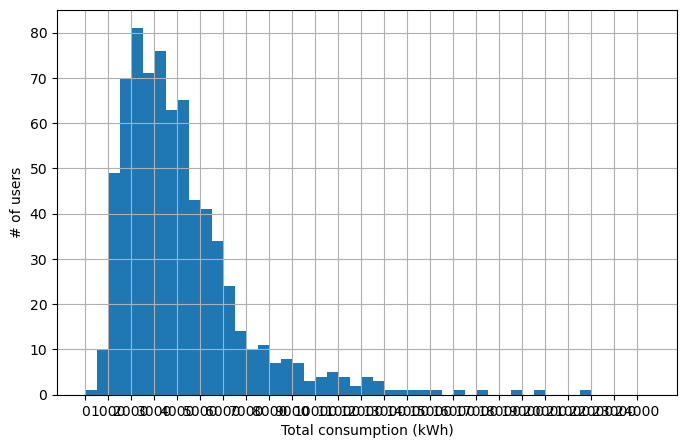

In [56]:
# plot a histogram of consumption
consTotal = hourly_df.sum(axis=1).values   # sum by row (annual aggregate of each users consumption) 
consBins = np.arange(0,25000,500)  # 0 to 30MWh in 500Wh steps
consHist, consEdges = np.histogram(consTotal, consBins, density=False)  #data, bins, False=>consHist contain #samples in each bin.
widths = consEdges[1:]-consEdges[0:-1]  # consEdges=1*50 array ; array[0]=0,array[50]=49000 (bin edges)
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
ax1.bar(consEdges[0:-1]+widths/2,consHist,width=widths)
ax1.set_xlabel('Total consumption (kWh)')
ax1.set_ylabel('# of users')
ax1.set_xticks(np.arange(0,25000,1000))
ax1.grid(which='both')


In [57]:
#read cleaned temperature data

hourlyTemp = np.genfromtxt(r'./hourlyTempCleaned.csv',delimiter=',')
print(len(hourlyTemp))
hourlyTemp

8760


array([7.01, 7.49, 7.16, 7.04, 6.29, 6.2 , 5.73, 5.04, 5.76, 5.36, ...,
       7.48, 7.02, 6.86, 6.47, 6.37, 6.26, 5.77, 5.92, 6.54, 7.43])

In [58]:
# try this instead to see if can replicate drift seen in MLR7
# get hourly weather data
df_wxDarksky = pd.read_pickle('../MScProjectCoding/project_data/intermediateDataLCL/London_df_wxDarksky.pkl')

dtypes = { 'summary':'category','icon':'category','precipIntensity':'float32','precipProbability':'float32',\
           'temperature':'float32','apparentTemperature':'float32','dewPoint':'float32','humidity':'float32',\
           'pressure':'float32','windSpeed':'float32','windGust':'float32','windBearing':'float32','cloudCover':'float32',\
           'uvIndex':'float32','visibility':'float32','precipType':'category','precipAccumulation':'float32' }

date_col = ['date_time']
df_wxDarksky = df_wxDarksky.astype(dtype=dtypes)

# set datetime index from POSIX time 
df_wxDarksky['date_time'] = pd.to_datetime(df_wxDarksky['time'],unit='s')
df_wxDarksky['date_time'] = df_wxDarksky['date_time'].dt.tz_localize('UTC') # not really required..
df_wxDarksky = df_wxDarksky.set_index('date_time')
           
# sort by time index if needed
df_wxDarksky_sorted = df_wxDarksky.sort_index(axis=0,inplace=False)


wx_var='temperature'
hourlyTemp = df_wxDarksky[wx_var].interpolate(method='pad', limit=5).to_numpy(dtype='float64')      # pad up to 5 consecutive NaNs

print(len(hourlyTemp))
hourlyTemp  


8760


array([9.56999969, 9.38000011, 9.18000031, 7.88000011, 7.38000011,
       6.36999989, 5.38000011, 5.07999992, 4.67000008, 4.57999992, ...,
       7.57000017, 7.28000021, 7.17000008, 6.76999998, 6.1500001 ,
       6.67000008, 5.61999989, 5.96999979, 6.67000008, 7.67999983])

In [59]:
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*(x-x0)+y0, lambda x:k2*(x-x0)+y0])  # lambda function

In [60]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', \
          'November', 'December']
daynum = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]


In [61]:
np.sum(daynum[0:13])

365

['-17.74', '523.81', '-42.93', '-6.12']
Covariance :  [[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]
[ 4.36531551e+02 -1.13429186e+01  2.20191107e-01]


C:\Users\fmurphy\Miniconda3\envs\fm_ANN\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


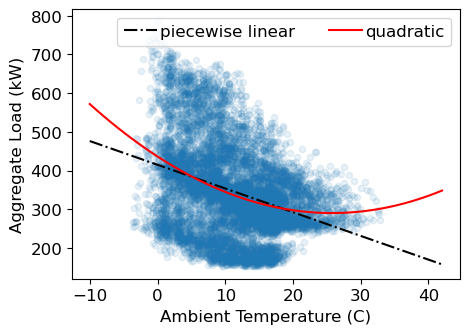

In [62]:
# plot consumption v temperature
fig = plt.figure(figsize=(5,3.5))
ax1 = fig.add_subplot(111)
ax1.scatter(hourlyTemp,hourly_df.sum(axis=0),marker='o',s=20,alpha=0.1)  # scatter plot aggregated (across users) consumption per hr v hourly temperature
p , e = optimize.curve_fit(piecewise_linear, hourlyTemp,hourly_df.sum(axis=0))   # Use least squares opt to fit a function, f, to data: fit piecewise linear curve (scipy)\
                                                                                 # return 1)optimal fit as a tuple and 2)covariance
print(['%.2f'%e for e in p])  # print coefficients
print("Covariance : ",e)
#print("Optimal fit parameters: ",p)
xd = np.linspace(-10,42,101)       # 101 samples from temperature  -10C to 42C  - for use as dependent variable for poly fitting etc
ax1.plot(xd, piecewise_linear(xd, *p), color='k', linestyle='-.')    # line plot linear fit against dependent variable temperature where latter is in equal intervals
coefs = poly.polyfit(hourlyTemp, hourly_df.sum(axis=0), 2)         # numpy polynomial fit, order 2 ie quadratic
print(coefs)
ffit = poly.polyval(xd, coefs)                   # numpy.polyval - Evaluate a polynomial (coefs) at specific values (xd)

ax1.plot(xd, ffit, color='r')                   # plot ffit (quadratic) fit 

ax1.set_xlabel('Ambient Temperature (C)', fontsize=12)
ax1.set_ylabel('Aggregate Load (kW)', fontsize=12)

ax1.tick_params(axis='both', labelsize=12)

proxys = [ ]
proxys.append( mlines.Line2D([], [], color='k', linestyle='-.') )  # legend line style : https://matplotlib.org/tutorials/intermediate/legend_guide.html
proxys.append( mlines.Line2D([], [], color='r', linestyle='-') )

plt.legend(proxys, ['piecewise linear','quadratic'],\
           ncol=2, fontsize=12, handletextpad=0.2)
# fig.savefig('../outputs/Temperature_hourlyload_predictor.png', dpi=300, format='png',  bbox_inches='tight')

Wider spread of consumption data at low temperatures (winter) than in summer


In [63]:
# updated time ranges to match UK data, keep the variable names the same for simplicity
# see .\Figures\LondonAggregateLoad_DailyTimeBands.png

nightTime = np.asarray([23,0,1,2,3,4,5,6])   # ie 2300 to 0700
earlyMorn = np.asarray([7,8,9])              # 0700 to 1000
dayTime = np.asarray([10,11,12,13,14,15])    # 1000 to 1600
eveningTime = np.asarray([16,17,18,19,20,21,22,23])   #1600 to 0000   OVERLAPS WITH nightTime
timeLists = [nightTime, earlyMorn, dayTime, eveningTime]   # list of lists
lineStyles = ['-','-.',':','--']
timeLists

[array([23,  0,  1,  2,  3,  4,  5,  6]),
 array([7, 8, 9]),
 array([10, 11, 12, 13, 14, 15]),
 array([16, 17, 18, 19, 20, 21, 22, 23])]

In [64]:

np.int(np.sum(daynum[0:months.index('January')])*24)
daynum[0:months.index('January')]
months.index('November')

10

In [65]:
##### lets train on data up until September
startTrain = np.int(np.sum(daynum[0:months.index('January')])*24)   # 0 hrs
endTrain = np.int(np.sum(daynum[0:months.index('September')])*24)   # end August in hrs

#####
# get all new features
startPred = np.int(np.sum(daynum[0:months.index('September')])*24)
endPred = np.int(np.sum(daynum[0:months.index('November')])*24)
lenPrediction = endPred-startPred
print('The training length = %d hours'%(endTrain-startTrain))   #0 ,5832,5832,7296   # 1/Jan to 31/Aug training data; 1/Sep-31/Oct Prediction
print('The prediction length = %d hours'%lenPrediction)

featureLength = endPred-(startTrain+168) # we need to train on 1 week behind
featureLength   # (traing+prediction)-168  


The training length = 5832 hours
The prediction length = 1464 hours


7128

<class 'matplotlib.cm.ScalarMappable'>


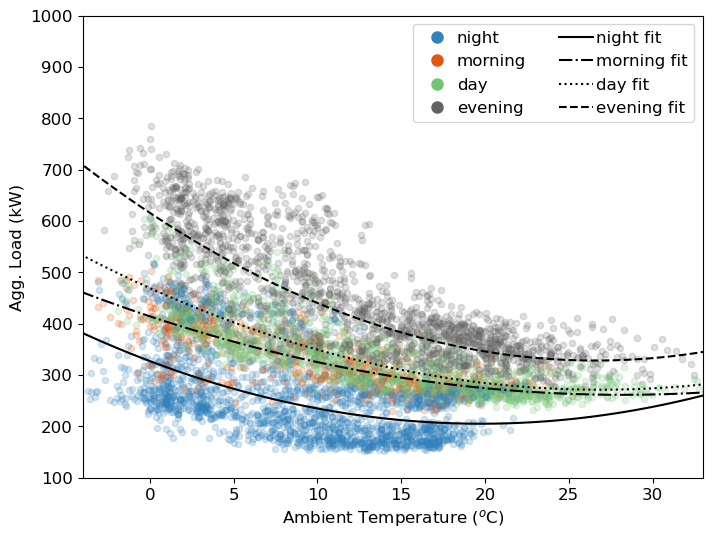

In [66]:
#create colormap for ploting aggregae load v teperature for each of daily time windows

# in subsequent scripts, have put this next block into setColMap function
minVal, maxVal = 1, 24.
cmOcc = plt.cm.get_cmap('tab20c')   # get tab20c colour bar object
print(cmOcc)
cNorm = colors2.Normalize(vmin=minVal, vmax=maxVal)    # map minVal,maxVal range to cNorm 0-1 colour range indices
print(cNorm)
scalarMap3 = cmx.ScalarMappable(norm=cNorm, cmap=cmOcc)  # match cNorm normalised data (hrs) to tab20c colour bar
print(scalarMap3)
scalarMap3._A = []   # not sure what this is for but seems to be required from other exampes.
print(type(scalarMap3))

fig = plt.figure(figsize=(8,6))
nDays = np.int((endTrain-startTrain)/24)
hourlyTempReshape = hourlyTemp[startTrain:endTrain].reshape(nDays,24)   #reshape(1*8760) array to nDays * 24 (rows * cols).
loadReshape = (aggregateLoad[startTrain:endTrain].values).reshape(nDays,24)  # reshape aggregate load array (aggregate of all users) 
ax1 = fig.add_subplot(111)
for k in range(24):                     # loop through the 4 daily time windows
    #cl = scalarMap3.to_rgba((np.float(k+1)))
    if k in nightTime:
        cl = scalarMap3.to_rgba((1))    # 1st cell in tab20c colour bar? (x is 1-d or 2-d array of scalars and the corresponding ndarray of rgba values will be returned, based on the norm and colormap set for this ScalarMappable)
    elif k in earlyMorn:
        cl = scalarMap3.to_rgba((6))    # 6th cell etc?
    elif k in dayTime:
        cl = scalarMap3.to_rgba((12))
    elif k in eveningTime:
        cl = scalarMap3.to_rgba((20))

    else:
        print('Oops')
    cl = colors2.rgb2hex(cl)
    ax1.scatter(hourlyTempReshape[:,k],loadReshape[:,k],marker='o',s=20,alpha=0.2, color=cl)  # plot all data points in eg 'Moring' window with colour 1 etc

colorIndex = [1,6,12,20]   # from tab20c colour bar colours (20 colours)
colorsO = []

############ FIT POLYNOMIAL to Aggload v Temp AT EACH TIME BLOCK ##########
for k in range(4):
    coefs = poly.polyfit(hourlyTempReshape[:,timeLists[k]].flatten(),loadReshape[:,timeLists[k]].flatten(), 2) ## performs a least squares polynomial fit 
    ffit = poly.polyval(xd, coefs)
    plt.plot(xd, ffit, color='k', linestyle=lineStyles[k])
    cl = scalarMap3.to_rgba((colorIndex[k]))
    colorsO.append(colors2.rgb2hex(cl))           # add each of 4 colours to array for legend 

ax1.set_xlabel('Ambient Temperature ($^o$C)', fontsize=12)
ax1.set_ylabel('Agg. Load (kW)', fontsize=12)
ax1.set_ylim([100,1000])
ax1.set_xlim([np.floor(np.min(hourlyTempReshape)),np.ceil(np.max(hourlyTempReshape))])
ax1.tick_params(axis='both', labelsize=12)

proxys = [ plt.plot([],[], marker="o", ms=8, ls="", mec=None, color=colorsO[i])[0] for i in range(4) ]  # legend stuff
for k in range(4):
    proxys.append( mlines.Line2D([], [], color='k', linestyle=lineStyles[k]) )

plt.legend(proxys, ['night', 'morning', 'day', 'evening', 'night fit', 'morning fit', 'day fit', 'evening fit'],\
           ncol=2, numpoints=1, fontsize=12, handletextpad=0.2)

#fig.savefig('./Figures/Temperature_hourlyload.png', dpi=300, format='png',  bbox_inches='tight')

In [67]:
#hourlyTempReshape.shape[0]
#hourlyTempReshape.shape[1]
#hourlyTempReshape[:,timeLists[0]].flatten()


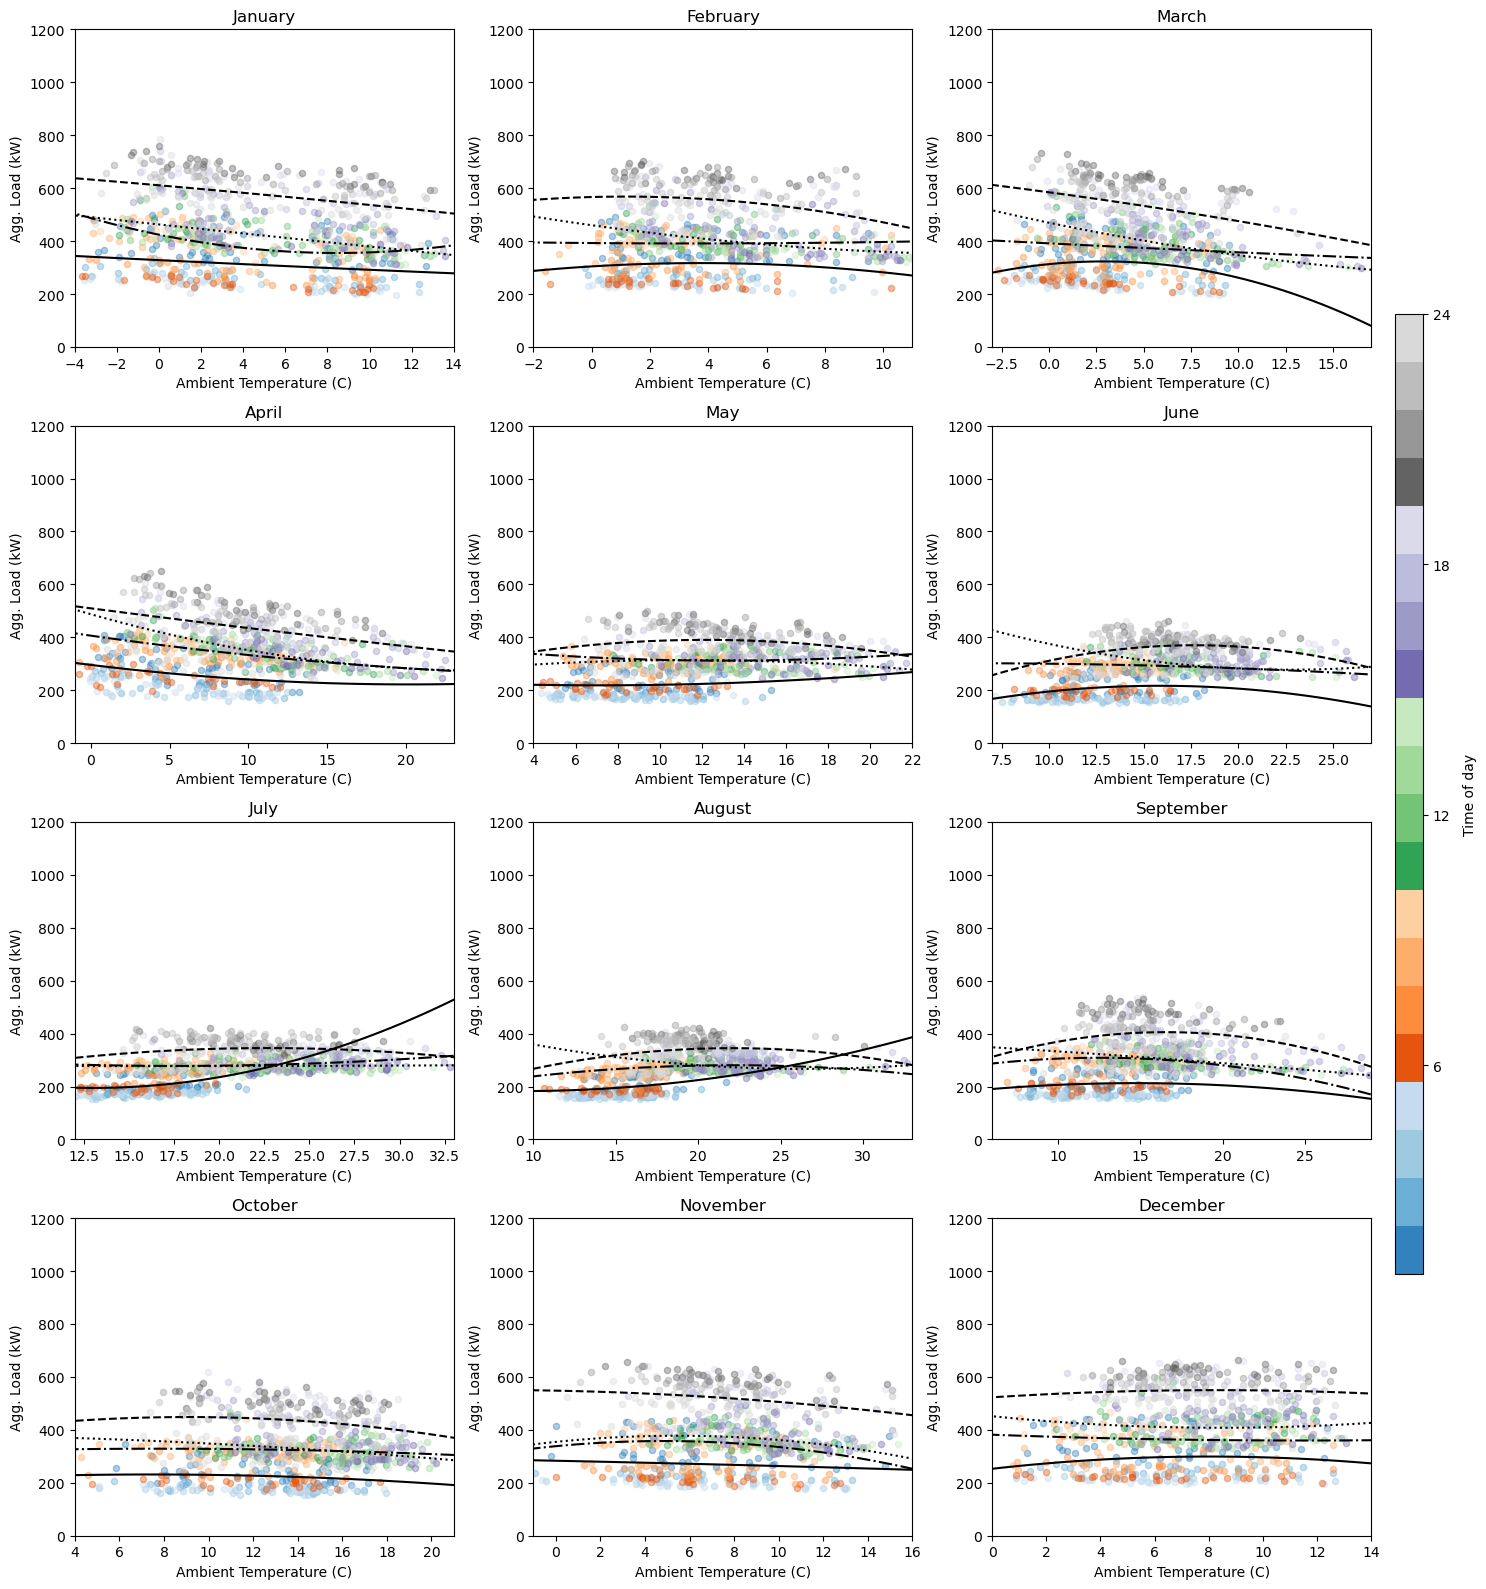

In [68]:
#create new colormap
minVal, maxVal = 1, 24.
cmOcc = plt.cm.get_cmap('tab20c')
cNorm = colors2.Normalize(vmin=minVal, vmax=maxVal)
scalarMap3 = cmx.ScalarMappable(norm=cNorm, cmap=cmOcc)
scalarMap3._A = []

fig = plt.figure(figsize=(14,16))
for j in range(len(months)):                 # loop over months and do same as above ie plot agg load v temp for each of 4 daily time windows , fit curves
    start = np.int(np.sum(daynum[0:j])*24)    # recall daynum = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    end = np.int(np.sum(daynum[0:j+1])*24)
    #hourlyTempFirst, hourlyTempSecond = np.zeros(((end-start)/2)), np.zeros(((end-start)/2))
    nDays = np.int((end-start)/24)
    hourlyTempReshape = hourlyTemp[start:end].reshape(nDays,24)
    loadReshape = (aggregateLoad[start:end].values).reshape(nDays,24)

    # add plot for month j
    ax1 = fig.add_subplot(4,3,j+1)
    for k in range(24):                            
        cl = scalarMap3.to_rgba((np.float(k+1)))          #  different colour for each hr
        cl = colors2.rgb2hex(cl)
        ax1.scatter(hourlyTempReshape[:,k],loadReshape[:,k],marker='o',s=20,alpha=0.4, color=cl)  
        
    #FIT POLYNOMIAL AT EACH TIME BLOCK #  
    for k in range(4):
        coefs = poly.polyfit(hourlyTempReshape[:,timeLists[k]].flatten(),loadReshape[:,timeLists[k]].flatten(), 2)
        ffit = poly.polyval(xd, coefs)
        plt.plot(xd, ffit, color='k', linestyle=lineStyles[k])
    
    ax1.set_xlabel('Ambient Temperature (C)')
    ax1.set_ylabel('Agg. Load (kW)')
    ax1.set_title(months[j])
    ax1.set_ylim([0,1200])
    ax1.set_xlim([np.floor(np.min(hourlyTempReshape)),np.ceil(np.max(hourlyTempReshape))])  # neat floor/ceiling (integer) limits
fig.tight_layout()

cbar_ax = plt.axes([1, 0.2, 0.02, 0.6])   # x pos, bottom pos, width, top pos ?? 
cbar = fig.colorbar(scalarMap3, cax=cbar_ax, ticks=np.arange(0,24.1,6), orientation='vertical')  # plot colour bar on right
cbar_ax.tick_params(axis='both', which='major')
cbar.set_label('Time of day', labelpad=9, rotation=90)

Again, notice lower consumption and lower variance in summer months 

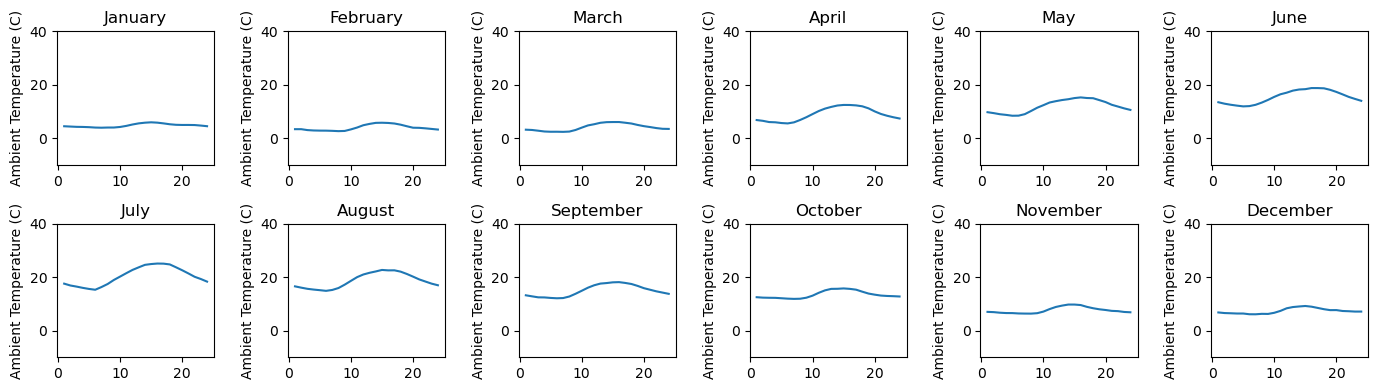

In [69]:
# plot average monthly temperature profile (by day : x axis = hrs)
fig = plt.figure(figsize=(14,4))
for j in range(len(months)):
    start = np.int(np.sum(daynum[0:j])*24)
    end = np.int(np.sum(daynum[0:j+1])*24)
    nDays = np.int((end-start)/24)
    hourlyTempReshape = hourlyTemp[start:end].reshape(nDays,24)
    ax1 = fig.add_subplot(2,6,j+1)
    ax1.plot(np.arange(1,24.1), np.mean(hourlyTempReshape, axis=0))
    ax1.set_ylabel('Ambient Temperature (C)')
    ax1.set_title(months[j])
    ax1.set_ylim([-10,40])
fig.tight_layout()

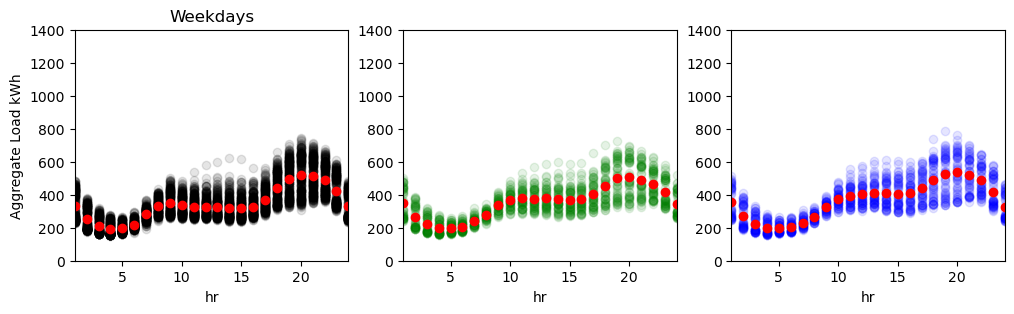

In [70]:
# plot weekdays, sat and sun (all aggregate consumption) by hr 
fig = plt.figure(figsize=(12,3))
axs = []
for j in range(3):
    axs.append( fig.add_subplot(1,3,j+1))        # add 1*3 subplot array to figure
    
start = 0
end = 24
weekdays, saturdays, sundays = [], [], []
for j in range(365):
    dayConsumption = aggregateLoad[start:end]     # iterate through DOY : recall aggregateLoad is 1*8760 array = agg across all users at each time
    # get the day of week
    day_of_week = dayConsumption.index[0]
    day_of_week = day_of_week.dayofweek
    if day_of_week in [0,1,2,3,4]:
        axs[0].scatter(np.arange(1,25),dayConsumption,color='k',alpha=0.1)  # plot on left
        weekdays.append(dayConsumption)                                     # append the 24 hourly values for day j if weekday
        axs[0].set_ylabel('Aggregate Load kWh')
        axs[0].set_title('Weekdays')
    elif day_of_week in [5]:
        axs[1].scatter(np.arange(1,25),dayConsumption,color='g',alpha=0.1)  # plot on centre
        saturdays.append(dayConsumption)
    else:
        axs[2].scatter(np.arange(1,25),dayConsumption,color='b',alpha=0.1)  # plot on right
        sundays.append(dayConsumption)
    start+=24
    end+=24             # day iterator
for ax in axs:
    ax.set_xlim([1,24])
    ax.set_ylim([0,1400])
    ax.set_xlabel('hr')

    

axs[0].scatter(np.arange(1,25),np.mean(weekdays, axis=0),color='r')      # plot mean of weekday consumption at each hr
axs[1].scatter(np.arange(1,25),np.mean(saturdays, axis=0),color='r')
axs[2].scatter(np.arange(1,25),np.mean(sundays, axis=0),color='r')

Plot above shows, for each hr, aggregate of all consumption at that hr on each day of year (segeregated by weekdays, saturdays, sundays)

In [71]:
#dayConsumption.index[0].dayofweek
#len(hourly_df)
#np.random.randint(len(hourly_df))  # generates random integer in range 1 to len(hourly_df) ie 1-881
#hourly_df.index.values

** Look at individual household:   
Select 15 random households  - this pool used for all subsequent individual user analysis  **

In [72]:
# get 15 random users   

randIDs = []
for j in range(15):
    uID = hourly_df.index.values[np.random.randint(len(hourly_df))]      # select ranbdom set from the  user IDs
    randIDs.append(uID)

randIDs_save=randIDs
randIDs
#hourly_df.index.values


[1328,
 1521,
 2605,
 4922,
 2558,
 3834,
 5219,
 3959,
 1679,
 3357,
 3417,
 1662,
 1541,
 572,
 1991]

In [73]:
df_loadDataStd.loc[randIDs].iloc[:,:3]

tarrif    Acorn    Acorn_Grp
user_id                             
1328       Std  ACORN-E     Affluent
1521       Std  ACORN-E     Affluent
2605       Std  ACORN-E     Affluent
4922       Std  ACORN-H  Comfortable
2558       Std  ACORN-E     Affluent
3834       Std  ACORN-H  Comfortable
5219       Std  ACORN-D     Affluent
3959       Std  ACORN-H  Comfortable
1679       Std  ACORN-H  Comfortable
3357       Std  ACORN-C     Affluent
3417       Std  ACORN-H  Comfortable
1662       Std  ACORN-E     Affluent
1541       Std  ACORN-E     Affluent
572        Std  ACORN-D     Affluent
1991       Std  ACORN-H  Comfortable

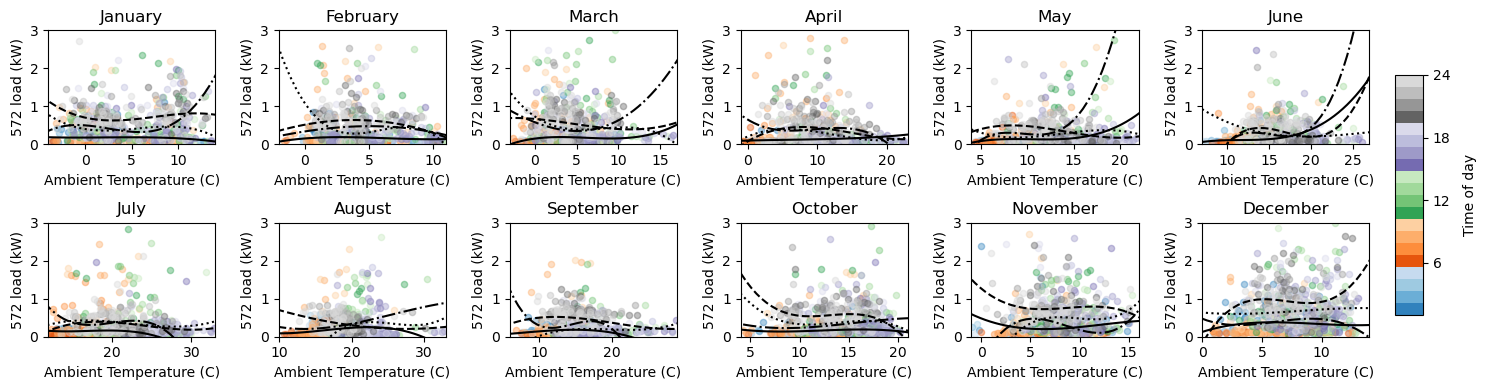

In [74]:
# analysis for one user

uID = randIDs[13]
fig = plt.figure(figsize=(14,4))
for j in range(len(months)):
    start = np.int(np.sum(daynum[0:j])*24)
    end = np.int(np.sum(daynum[0:j+1])*24)
    nDays = np.int((end-start)/24)
    hourlyTempReshape = hourlyTemp[start:end].reshape(nDays,24)
    loadReshape = hourly_df.loc[uID][start:end]
    loadReshape = (loadReshape.values).reshape(nDays,24)

    ax1 = fig.add_subplot(2,6,j+1)
    for k in range(24):
        cl = scalarMap3.to_rgba((np.float(k+1)))
        cl = colors2.rgb2hex(cl)
        ax1.scatter(hourlyTempReshape[:,k],loadReshape[:,k],marker='o',s=20,alpha=0.4, color=cl)   
        
    ############ FIT POLYNOMIAL AT EACH TIME BLOCK ##########
    for k in range(4):
        coefs = poly.polyfit(hourlyTempReshape[:,timeLists[k]].flatten(),loadReshape[:,timeLists[k]].flatten(), 3)
        ffit = poly.polyval(xd, coefs)
        plt.plot(xd, ffit, color='k', linestyle=lineStyles[k])
            
    ax1.set_xlim([np.floor(np.min(hourlyTempReshape)),np.ceil(np.max(hourlyTempReshape))])
    ax1.set_ylim([0,3])
    ax1.set_xlabel('Ambient Temperature (C)')
    str111 = '%d load (kW)'%uID
    ax1.set_ylabel(str111)
    ax1.set_title(months[j])
fig.tight_layout()

cbar_ax = plt.axes([1, 0.2, 0.02, 0.6])
cbar = fig.colorbar(scalarMap3, cax=cbar_ax, ticks=np.arange(0,24.1,6), orientation='vertical')  # add colour bar to fig
cbar_ax.tick_params(axis='both', which='major')
cbar.set_label('Time of day', labelpad=9, rotation=90)

In [75]:
#enumerate(aggregateLoad.index)
#randIDs

Look at some random households in random months

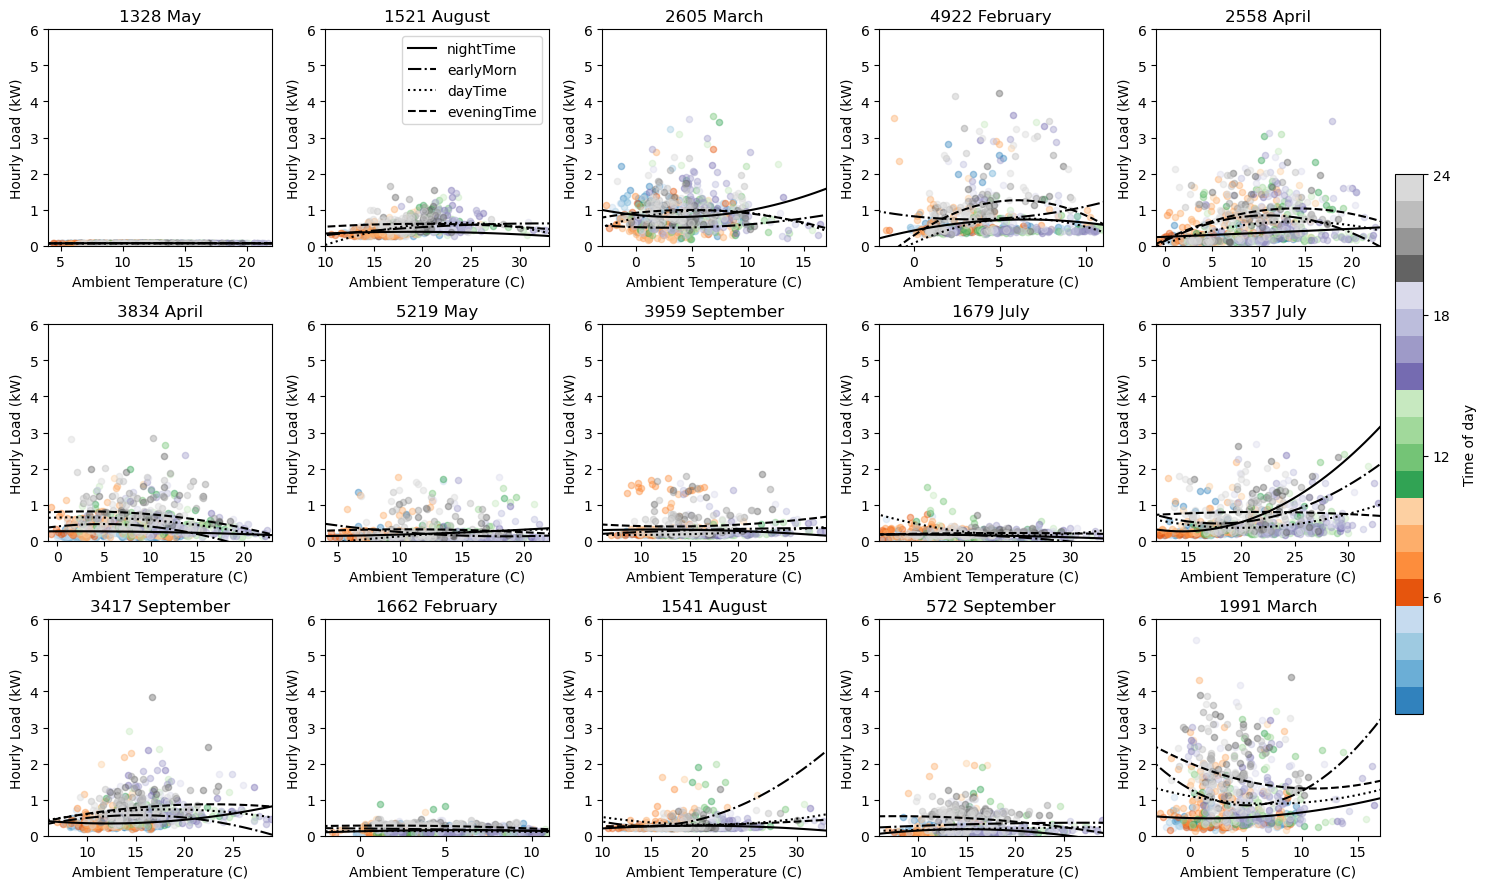

In [76]:
colorPal = sns.color_palette('hls',10)         # pallete , # colours
fig = plt.figure(figsize=(14,9))
for j in range(15):
    uID = randIDs[j] # pick the user             (from the randomly selected subset of 15)
    month = months[np.random.randint(len(months))]    # pick random month
    start = np.int(np.sum(daynum[0:months.index(month)])*24)              # start hr (start of month)
    end = np.int(np.sum(daynum[0:months.index(month)+1])*24)        # end hr (end of month)
    nDays = int((end-start)/24)
    ax1 = fig.add_subplot(3,5,j+1)
    ax1.set_title('%d'%uID+' '+month)
    
    hourlyTempReshape = hourlyTemp[start:end].reshape(nDays,24)      ##reshape month subset of (1*8760) array to nDays (in month)* 24 (rows * cols).
    loadReshape = hourly_df.loc[uID][start:end]                      # access consumption data for user
    loadReshape = (loadReshape.values).reshape(nDays,24)
    
    for k in range(24):
        cl = scalarMap3.to_rgba((np.float(k+1)))
        cl = colors2.rgb2hex(cl)
        ax1.scatter(hourlyTempReshape[:,k],loadReshape[:,k],marker='o',s=20,alpha=0.4, color=cl)   
        
    ############ FIT POLYNOMIAL AT EACH TIME BLOCK ##########
    lines = []
    for k in range(4):
        coefs = poly.polyfit(hourlyTempReshape[:,timeLists[k]].flatten(),loadReshape[:,timeLists[k]].flatten(), 2)
        ffit = poly.polyval(xd, coefs)
        l, = plt.plot(xd, ffit, color='k', linestyle=lineStyles[k])
        lines.append(l)

    ax1.set_xlabel('Ambient Temperature (C)')
    ax1.set_ylabel('Hourly Load (kW)')
    ax1.set_xlim([np.floor(np.min(hourlyTempReshape)),np.ceil(np.max(hourlyTempReshape))])
    ax1.set_ylim([0,6])
    if j == 1:
        ax1.legend(lines,['nightTime', 'earlyMorn', 'dayTime', 'eveningTime'])
fig.tight_layout()

cbar_ax = plt.axes([1, 0.2, 0.02, 0.6])
cbar = fig.colorbar(scalarMap3, cax=cbar_ax, ticks=np.arange(0,24.1,6), orientation='vertical')  # add colour bar to fig
cbar_ax.tick_params(axis='both', which='major')
cbar.set_label('Time of day', labelpad=9, rotation=90)

In [77]:
#for count,ele in enumerate(aggregateLoad.index): 
#    print(count,ele) 
#randIDs
#range(Nusers)


** Get aggregate of 15 users **

In [78]:
# get aggregate of randIDs users 
#aggregateLoad
#hourly_df.loc[randIDs_save]
aggLoad_randIDgrp = hourly_df.loc[randIDs_save].sum(axis=0)
aggLoad_randIDgrp

2013-01-01 00:00:00     7.442
2013-01-01 01:00:00     6.536
2013-01-01 02:00:00     5.470
2013-01-01 03:00:00     4.725
2013-01-01 04:00:00     4.544
                        ...  
2013-12-31 19:00:00    13.762
2013-12-31 20:00:00    11.939
2013-12-31 21:00:00    10.079
2013-12-31 22:00:00     9.130
2013-12-31 23:00:00     8.390
Length: 8760, dtype: float64

[3357, 3417, 1662, 1541, 572, 1991]
Window:  [1000, 1336]  startTick: 1008 length hrs 336
uID:  572


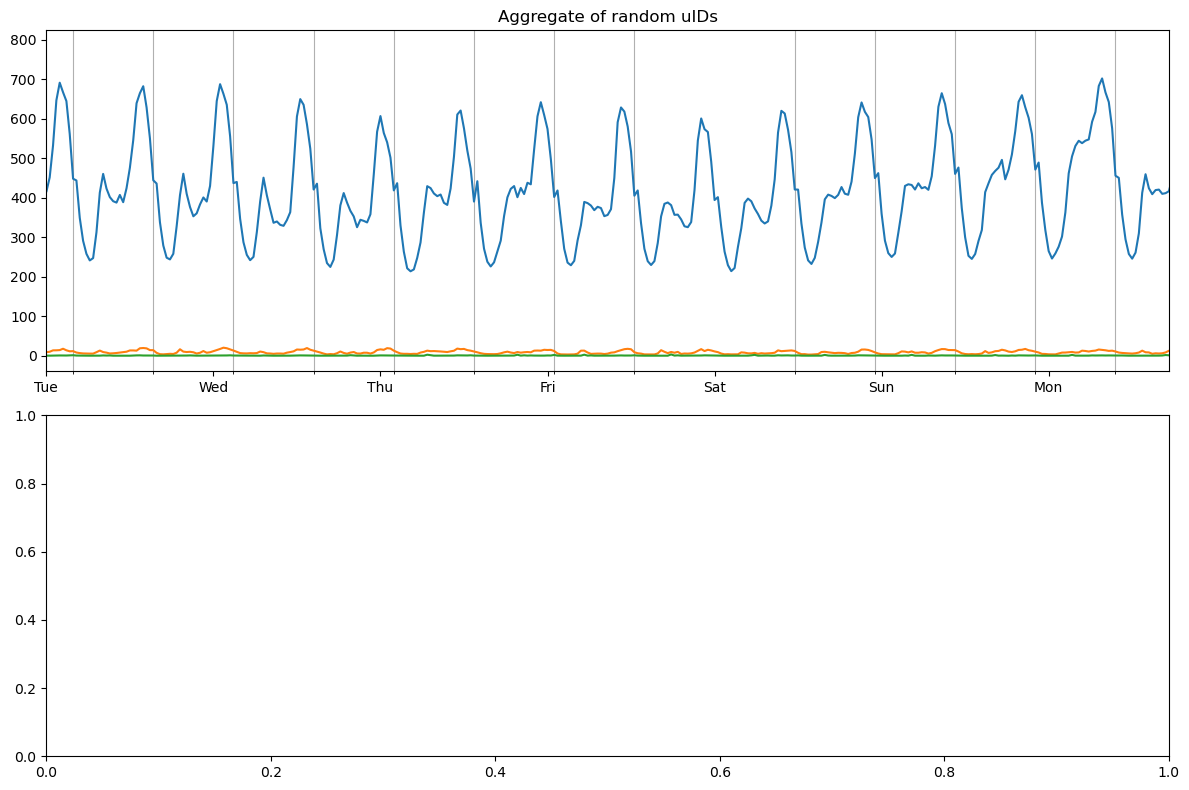

In [82]:
# Plot a) aggregate of  all ~700-800 users b) aggregate of randID group of 15 users c)  6 of random subset of users 
# all in a time window of ~2 weeks

randIDs = randIDs[-6:]    # take last 6 to get better mix of Acorn Grps 
print(randIDs)
timePlot = np.arange(1,len(hourlyTemp)+1)  # array going from 1 to 8760 at intervals of 1

fig = plt.figure(figsize=(12,8))
axs = []

# select ~ 2 week window 
window = [1000+0,1000+24*14]       # window 1000 to 1336 hrs ie 16:00 Xday 11th : 16:00 (X+14)day 25th  Feb

dayLabels = ['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun']

indexVals = aggregateLoad.index    # index = hr in datetime64ns format  (8760 values)
# find the first tick
for j,ind in enumerate(indexVals):               # counter j, index ind  (tuple)
    if j >=window[0]:
        #print(j,ind.hour)
        if ind.hour == 0:
            startTick =0+j                       # find first midnight in range
            print("Window: ",window," startTick:",startTick, "length hrs",(window[1]-window[0]))
            break


            
            
            for i in range(2):
    axs.append(fig.add_subplot(2,1,i+1))  # add i th sub plot to x*1 subplot array
for i in range(1): 
    if i in [0]: # plot the load  
        plotVals = aggregateLoad.values        
        axs[i].plot(timePlot,plotVals)
        axs[i].set_title('Aggregate all users')        
    #elif i in [1]:
        plotVals = aggLoad_randIDgrp.values       
        axs[i].plot(timePlot,plotVals)
        axs[i].set_title('Aggregate of random uIDs')
    #else:
    uID = randIDs[i-2]
    print('uID: ',uID)
    plotVals = hourly_df.loc[uID] 
    axs[i].plot(timePlot,plotVals)
        
    axs[i].set_xlim(window)
    axs[i].set_xticks(np.arange(startTick,window[1],24), minor=True)             # tick positions at midnight
    #axs[i].set_xticks(np.arange(startTick+12,window[1],24), minor=True)         # tick positions correspond to noon
    tickLabs = []
    for ti in np.arange(startTick+12,window[1],24):
        tickLabs.append(dayLabels[indexVals[window[0]+ti].dayofweek])
    axs[i].set_xticklabels(tickLabs)
    axs[i].grid( which='minor')
    if i>1:
        axs[i].set_title('user ID: %d'%uID)
fig.tight_layout()
# 2015 starts on thursday

720 0
Window:  [720, 888]  startTick: 720
[720 744 768 792 816 840 864]


FileNotFoundError: [Errno 2] No such file or directory: './Figures/Aggregage_1Week.png'

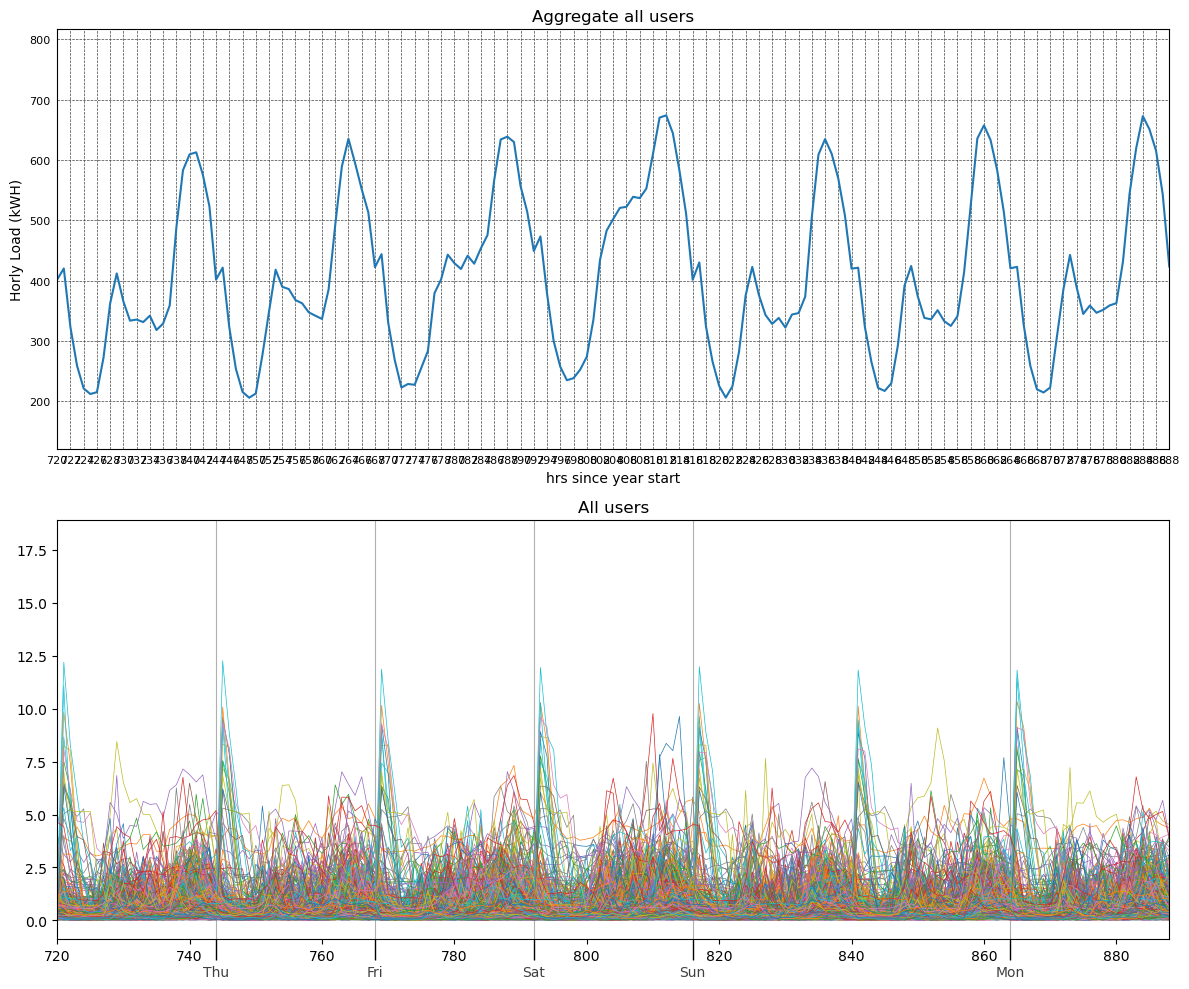

In [83]:
# Plot a) aggregate of  all ~700-800 users (again) b) all user profiles


timePlot = np.arange(1,len(hourlyTemp)+1)  # array going from 1 to 8760 at intervals of 1

fig = plt.figure(figsize=(12,10))
axs = []

day_ = 30
window = [24*day_,(24*day_)+(24*7)]       ## set  ~ 1 week window (set start on midnight for now)

dayLabels = ['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun']
indexVals = aggregateLoad.index    # index = hr in datetime64ns format  (8760 values)

# find the first midnight tick  - redundant given start at midnight
for j,ind in enumerate(indexVals):               # counter j, index ind  (tuple)
    if j >=window[0]:
        if ind.hour == 0:
            print(j,ind.hour)
            startTick =0+j                       # find first midnight in range
            print("Window: ",window," startTick:",startTick)
            break

for j in range(2):
    axs.append( fig.add_subplot(2,1,j+1))

# first subplot:   Plot aggergate

plotVals = aggregateLoad.values        
axs[0].plot(timePlot,plotVals)

axs[0].set_title('Aggregate all users')     
axs[0].set_xlim(window)

axs[0].xaxis.set_major_locator(plt.MultipleLocator(2))           # major x axis ticks
axs[0].tick_params(which='major', width=0.0, length=1,labelsize=8)

axs[0].set_xticks(np.arange(startTick,window[1],24), minor=True)           # minor x axis tick positions correspond to nmidnight
axs[0].tick_params(which='minor', width=1.0, length=15, labelsize=10,labelcolor='0.25')

print(np.arange(startTick,window[1],24))


tickLabs = []
for ti in np.arange(startTick,window[1],24):
    tickLabs.append(dayLabels[indexVals[ti].dayofweek])
axs[0].set_xticklabels(tickLabs, minor=True)
axs[0].set_xlabel('hrs since year start')
axs[0].set_ylabel('Horly Load (kWH)')

axs[0].grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10,which = 'major')


# second subplot: plot all user load profiles
for i in range(Nusers): 
    uID = hourly_df.index[i-1]
    #print('uID: ',uID)
    plotVals = hourly_df.loc[uID] 
    axs[1].plot(timePlot,plotVals,linewidth = 0.5)
        
axs[1].set_xlim(window)
axs[1].set_xticks(np.arange(startTick,window[1],24), minor=True)             # tick positions at midnight

axs[1].tick_params(which='minor', width=1.0, length=15, labelsize=10,labelcolor='0.25')
tickLabs = []
for ti in np.arange(startTick,window[1],24):
    tickLabs.append(dayLabels[indexVals[ti].dayofweek])
axs[1].set_xticklabels(tickLabs, minor=True)
axs[1].grid( which='minor')
axs[1].set_title('All users')     

fig.tight_layout()

#fig.savefig('./Figures/Aggregage_1Week.png', dpi=300, format='png',  bbox_inches='tight')

In [13]:
hourly_df.index

Int64Index([   2,   10,   18,   19,   27,   40,   49,   57,   60,   91,
            ...
            5461, 5463, 5475, 5518, 5525, 5526, 5527, 5530, 5539, 5540],
           dtype='int64', name='user_id', length=722)

In [22]:
# get ordinal row # for selected uIDs 

rowN = getRowN_of_uID([5293, 5007, 381, 2487, 5343, 5275],hourly_df.index)

# select uIDs to highlight (where u = row of df containing user uID)

idHighlight = [hourly_df.index[u] for u in rowN]
idHighlight    # selected uID


Row# for uID 5293 is :  682
Row# for uID 5007 is :  644
Row# for uID 381 is :  54
Row# for uID 2487 is :  293
Row# for uID 5343 is :  692
Row# for uID 5275 is :  677
row numbers of uID:  [682, 644, 54, 293, 692, 677]


[5293, 5007, 381, 2487, 5343, 5275]

In [149]:
#print(aggregateLoad.shape)
#print(aggregateLoad.mean())
aggregateLoad


2013-01-01 00:00:00    459.465
2013-01-01 01:00:00    379.727
2013-01-01 02:00:00    295.575
2013-01-01 03:00:00    253.434
2013-01-01 04:00:00    231.147
                        ...   
2013-12-31 19:00:00    639.031
2013-12-31 20:00:00    585.349
2013-12-31 21:00:00    518.606
2013-12-31 22:00:00    480.386
2013-12-31 23:00:00    428.246
Length: 8760, dtype: float64

In [153]:
aggregateLoad.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', length=8760)

In [150]:
hourly_df

2013-01-01 00:00:00  2013-01-01 01:00:00  2013-01-01 02:00:00  \
user_id                                                                  
2                      0.460                0.426                0.411   
10                     0.962                1.121                0.373   
18                     0.378                0.277                0.257   
19                     0.282                0.185                0.177   
27                     0.458                0.594                0.450   
...                      ...                  ...                  ...   
5526                   0.398                0.284                0.270   
5527                   0.258                0.221                0.070   
5530                   0.624                0.150                0.125   
5539                   0.939                0.619                0.402   
5540                   0.091                0.131                0.093   

         2013-01-01 03:00:00  2013-01-01 04:00:00  2013-01-01 05:00:00  \
user_id                                                                  
2                      0.395                0.221                0.206   
10                     0.421                0.303                0.450   
18                     0.257                0.414                0.751   
19                     0.137                0.081                0.152   
27                     0.325                0.247                0.271   
...                      ...                  ...                  ...   
5526                   0.281                0.251                0.296   
5527                   0.168                0.133                0.080   
5530                   0.124                0.116                0.129   
5539                   0.274                0.357                0.302   
5540                   0.097                0.122                0.088   

         2013-01-01 06:00:00  2013-01-01 07:00:00  2013-01-01 08:00:00  \
user_id                                                                  
2                      0.206                0.217                0.216   
10                     0.389                0.452                0.703   
18                     0.559                0.532                0.510   
19                     0.180                0.226                0.540   
27                     0.259                0.268                0.226   
...                      ...                  ...                  ...   
5526                   0.220                0.401                1.072   
5527                   0.074                0.073                0.090   
5530                   0.113                0.398                0.496   
5539                   0.390                0.436                0.534   
5540                   0.096                0.119                0.091   

         2013-01-01 09:00:00  2013-01-01 10:00:00  2013-01-01 11:00:00  \
user_id                                                                  
2                      0.216                0.200                0.242   
10                     0.512                0.754                2.117   
18                     0.338                0.252                0.265   
19                     0.434                0.366                0.352   
27                     0.215                0.374                0.368   
...                      ...                  ...                  ...   
5526                   0.485                0.361                0.272   
5527                   0.089                0.307                0.148   
5530                   0.832                0.224                0.200   
5539                   0.562                0.747                0.499   
5540                   0.177                0.145                0.085   

         2013-01-01 12:00:00  2013-01-01 13:00:00  2013-01-01 14:00:00  \
user_id                                                                  
2        

uID:  5293
uID:  5007
uID:  381


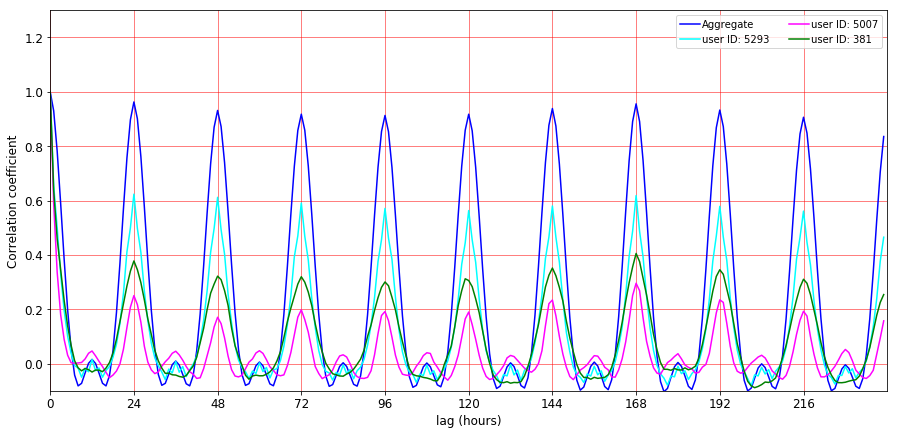

In [56]:
# look at repeat periods using autocorrelation of full year load data

nD = 10   # 10 days - LAG MAX
colors = ['b', 'cyan', 'magenta', 'green']
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(111)
proxys = []
for i in range(4):                                       
    # now lets look at autocorrelation of the load
    if i==0:                                                        # looking at user aggregated load
        loadNorm = aggregateLoad-aggregateLoad.mean()               # compute residual aggregate load  before autocorrelation
    else:                  
        uID = idHighlight[i-1]                                      # looking at individual user load for ~ 3 users
        print("uID: ",uID)
        loadNorm = hourly_df.loc[uID]-hourly_df.loc[uID].mean()        # compute residual user load  before autocorrelation
    lagNWeeks = np.zeros((24*nD))               # 24 * 10 = 240 length array
    #print(lagNWeeks)
    for j in range(len(lagNWeeks)):                 # loop through 240 1hr steps (i.e. 0 to 10 days lag)
        lagNWeeks[j] = loadNorm.autocorr(lag=j)     # autocorrelation using step of 1hr
    
    l, = ax1.plot(np.arange(24*nD),lagNWeeks,color=colors[i])
    proxys.append(l)
ax1.set_xlabel('lag (hours)', fontsize=12)
ax1.set_ylabel('Correlation coefficient', fontsize=12)
ax1.set_xlim([0,24*nD])
ax1.set_xticks(np.arange(0,24*nD,24));
ax1.set_ylim([-0.1,1.3])
#ax1.grid()


# Customize the major grid
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
#ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')


legLabs = []
legLabs.append('Aggregate')
for i in range(3):
    legLabs.append('user ID: %d'%idHighlight[i])
    #legLabs.append('example house %d'%(i+1))
plt.legend(proxys, legLabs,\
           ncol=2, fontsize=10, handletextpad=0.2)
ax1.tick_params(axis='both', labelsize=12)
fig.savefig('./Figures/Autocorrelation.png', dpi=300, format='png',  bbox_inches='tight')

all profiles show strong 24hr periodicity  
aggregate and some  individual profiles show some 168hr periodicity   
some users show strong 12 hr periodocity (morning and evening peaks?)

uID:  5293
8760 8760
uID:  5007
8760 8760
uID:  381
8760 8760


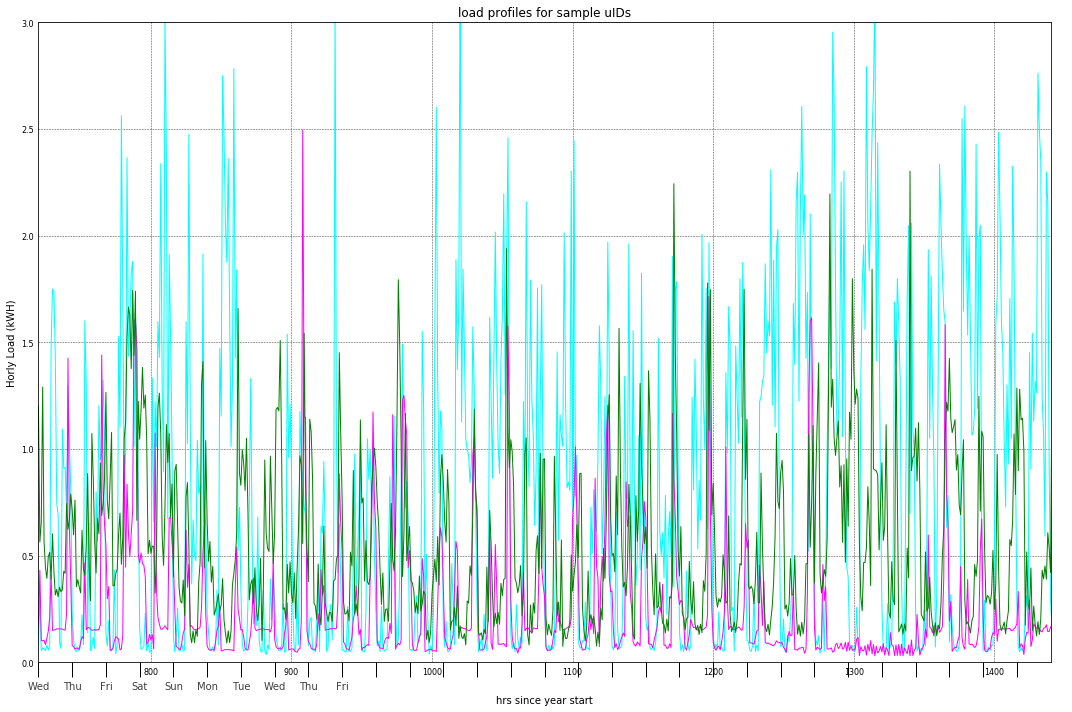

In [57]:
# plot load profiles for above highlighted uIDs
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)
colors = ['cyan', 'magenta', 'green']
timePlot = np.arange(1,len(hourlyTemp)+1)
window = [24*50,(24*50)+(24*10)]       ## set  ~week window (set start on midnight for now)

for i in range(3): 
    uID = idHighlight[i]
    print('uID: ',uID)
    plotVals = hourly_df.loc[uID] 
    print(len(plotVals),len(timePlot))
    ax1.plot(timePlot,plotVals,linewidth = 1,color=colors[i])
    

ax1.set_title('load profiles for sample uIDs')     
ax1.set_xlim(window[0],window[1])
ax1.set_ylim([0,3])

#ax1.xaxis.set_major_locator(plt.MultipleLocator(24))           # major x axis ticks
ax1.tick_params(which='major', width=0.0, length=1,labelsize=8)

ax1.set_xticks(np.arange(startTick,window[1],24), minor=True)           # minor x axis tick positions correspond to midnight
ax1.tick_params(which='minor', width=1.0, length=15, labelsize=10,labelcolor='0.25')

tickLabs = []
for ti in np.arange(window[0],window[1],24):
    tickLabs.append(dayLabels[indexVals[ti].dayofweek])
ax1.set_xticklabels(tickLabs, minor=True)
ax1.set_xlabel('hrs since year start')
ax1.set_ylabel('Horly Load (kWH)')

ax1.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10,which = 'major')
fig.tight_layout()


In [14]:
aggIndices = aggregateLoad.index
T_to_F = [1,2,3,4]
S_to_M = [5,6,0]
#aggIndices


In [21]:

a = aggIndices[0]
a.dayofyear  # 1 (1st day of year)
a
range(int(endTrain/24)-1)

NameError: name 'endTrain' is not defined

** Test Persistance Model over 24h lag for Weekdays and weekends **

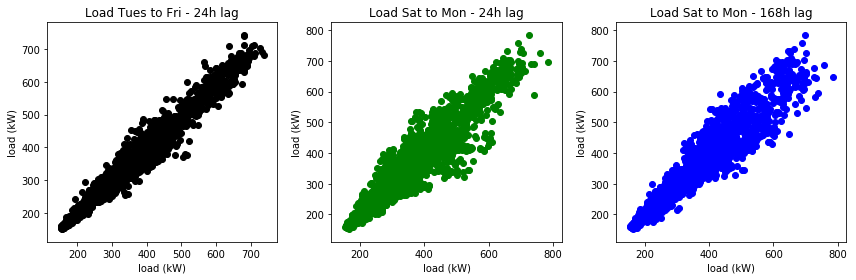

In [29]:
# scatter plot of load against load at previous time one day earlier  (aggregate)
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
# loop through the days
for day in range(int(endTrain/24)-1):
    startIndex = (day+1)*24
    dayOfWeek = aggIndices[startIndex].dayofweek
    if dayOfWeek in T_to_F:
        ax1.scatter(aggregateLoad[startIndex-24:startIndex], aggregateLoad[startIndex:startIndex+24], color='k')
    else:
        ax2.scatter(aggregateLoad[startIndex-24:startIndex], aggregateLoad[startIndex:startIndex+24], color='g')
        if day>6:
            ax3.scatter(aggregateLoad[startIndex-168:startIndex-144], \
                        aggregateLoad[startIndex:startIndex+24], color='b')
ax1.set_title('Load Tues to Fri - 24h lag')
ax2.set_title('Load Sat to Mon - 24h lag')
ax3.set_title('Load Sat to Mon - 168h lag')
ax1.set_xlabel('load (kW)'), ax1.set_ylabel('load (kW)')
ax2.set_xlabel('load (kW)'), ax2.set_ylabel('load (kW)')
ax3.set_xlabel('load (kW)'), ax3.set_ylabel('load (kW)')
fig.tight_layout()

In [1]:
randIDs

NameError: name 'randIDs' is not defined

1382
2013-01-01 00:00:00    0.530
2013-01-01 01:00:00    0.231
2013-01-01 02:00:00    0.252
2013-01-01 03:00:00    0.232
2013-01-01 04:00:00    0.230
                       ...  
2013-12-31 19:00:00    0.195
2013-12-31 20:00:00    1.284
2013-12-31 21:00:00    0.472
2013-12-31 22:00:00    0.440
2013-12-31 23:00:00    0.434
Name: 1382, Length: 8760, dtype: float64


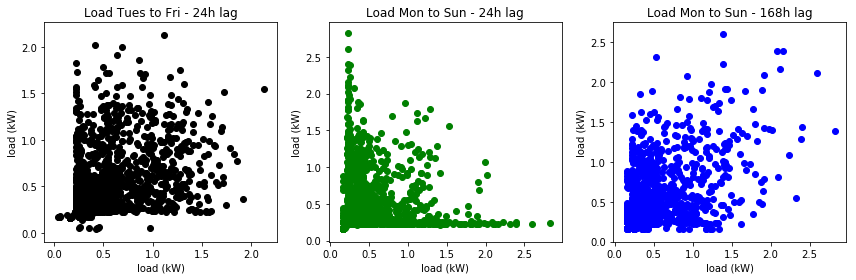

In [62]:
 # scatter plot of load against load at previous time one day earlier  - one user OR aggregae of randID group
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
# loop through the days

uID = randIDs[0]
print(uID)

# try one user OR aggregate of small group of users
testLoad = hourly_df.loc[uID]
#testLoad =  aggLoad_randIDgrp.values 
print(testLoad)

for day in range(int(endTrain/24)-1):
    startIndex = (day+1)*24
    dayOfWeek = aggIndices[startIndex].dayofweek
    if dayOfWeek in T_to_F:
        ax1.scatter(testLoad[startIndex-24:startIndex], testLoad[startIndex:startIndex+24], color='k')
    else:
        ax2.scatter(testLoad[startIndex-24:startIndex], testLoad[startIndex:startIndex+24], color='g')
        if day>6:
            ax3.scatter(testLoad[startIndex-168:startIndex-144], testLoad[startIndex:startIndex+24], color='b')
ax1.set_title('Load Tues to Fri - 24h lag')
ax2.set_title('Load Mon to Sun - 24h lag')
ax3.set_title('Load Mon to Sun - 168h lag')
ax1.set_xlabel('load (kW)'), ax1.set_ylabel('load (kW)')
ax2.set_xlabel('load (kW)'), ax2.set_ylabel('load (kW)')
ax3.set_xlabel('load (kW)'), ax3.set_ylabel('load (kW)')
fig.tight_layout()
fname = './Figures/24hr_persistance_user' + str(uID) + '.png'
fig.savefig(fname, dpi=300, format='png',  bbox_inches='tight')
#fig.savefig('./Figures/24hr_persistance_aggergate_15uIDs.png', dpi=300, format='png',  bbox_inches='tight')

** Now try some training using simple naive and MLR models as per Pecan data example 
 from Barbour & Gonzalez 2018 Enhancing Household-level Load forecasting ** 
 
start with an initial model:
$ \hat{P}_{t} = \sum_{i=1}^{2}[dayType_{t}^{(i)}(\beta_{0,i} + \beta_{1,i}P_{t-24} + \beta_{2,i}P_{t-168})] +
\sum_{i=1}^{4} [daySection_{t}^{(i)}(\beta_{3,i}+\beta_{4,i}T_t+\beta_{5,i}T_t^2)] $ <br>
* TF - Tuesday to Friday <br>
* SM - Saturday to Monday <br>
* We assume we know temperature (rather than forecast)
* there are 4 daySections (night, morning, afternoon, evening) which can have different tempertaure responses    
Note: time bands adjusted based on analysis of London data aggregate summer and winter load profiles
see: /Figures/LondonAggregateLoad_DailyTimeBands.png

In [15]:
##### lets train on data up until September
startTrain = np.int(np.sum(daynum[0:months.index('January')])*24)   # 0 hrs
endTrain = np.int(np.sum(daynum[0:months.index('September')])*24)   # end August in hrs

#####
# get all new features
startPred = np.int(np.sum(daynum[0:months.index('September')])*24) # end Aug/start Sep
endPred = np.int(np.sum(daynum[0:months.index('November')])*24)  # end October
lenPrediction = endPred-startPred
print('The training length = %d hours'%(endTrain-startTrain),'from %d hours'%startTrain,'to %d hours'%endTrain)   #0 ,5832,5832,7296   # 1/Jan to 31/Aug training data; 1/Sep-31/Oct Prediction
print('The prediction length = %d hours'%lenPrediction,'from %d hours'%startPred,'to %d hours'%endPred)

featureLength = endPred-(startTrain+168) # we need to train on 24 hours behind
featureLength   # (traing+prediction)-168  

The training length = 5832 hours from 0 hours to 5832 hours
The prediction length = 1464 hours from 5832 hours to 7296 hours


7128

In [16]:
# copied from above .. as keep forgetting to set when running MLR models again

nightTime = np.asarray([23,0,1,2,3,4,5,6])   # ie 2300 to 0700
earlyMorn = np.asarray([7,8,9])              # 0700 to 1000
dayTime = np.asarray([10,11,12,13,14,15])    # 1000 to 1600
eveningTime = np.asarray([16,17,18,19,20,21,22,23])   #1600 to 0000   OVERLAPS WITH nightTime
timeLists = [nightTime, earlyMorn, dayTime, eveningTime]   # list of lists
lineStyles = ['-','-.',':','--']
timeLists

[array([23,  0,  1,  2,  3,  4,  5,  6]),
 array([7, 8, 9]),
 array([10, 11, 12, 13, 14, 15]),
 array([16, 17, 18, 19, 20, 21, 22, 23])]

May wish to consider changing training length to cover full caendar year 

   
Recall: timeLists = [nightTime, earlyMorn, dayTime, eveningTime] for HoD terms       

### Populate the allFeatures array    


In [1]:
# set up training inputs
# assuming interaction pattern of load/ Hour of Day/ Temperature remains constant across seasons....

dayClassifier = [[1,2,3,4],[5,6,0]]
# at the moment there are 2*24 lag terms (ie Tues-Fri and Sat-Mon), 2*168 lag terms,
# 12 temperature terms (3 for each of 4 HoD bands) i.e. 1,T,T^2
# featureLength = endPred-(startTrain+168) = ~7100 # we need to train on 24, 168 hours behind

allFeatures = np.zeros((featureLength,18))  # 6 + 12 terms
#allFeatures[:,0] = aggregateLoad[startTrain:endTrain-24]
yData = aggregateLoad[startTrain+168:endPred]       # drop 1st week of year ie yData[0]=agg..Load[168]\
                    # yData should have Training and Prediction index range but not the 1st week
print(len(yData))          # = 7128 i.e. (EndPred-(startTrain+168))
interestTemp = hourlyTemp[startTrain+168:endPred]     # drop 1st week of year

# NB yData must start at hr 168 and not hr 0 of year for following to work:

for j in range(len(yData)):             # loop over all hrs in yData, j = 0 to (endPred-(startTrain+168)

    hourTrain = yData.index[j].hour          
    dayTrain = yData.index[j].dayofweek
    dayOfYear= yData.index[j].dayofyear    # ie 8,9,10...
    if j<=1:
        print("j:",j,"hourTrain:",hourTrain,"dayTrain (day of week):",dayTrain,"dayOfYear:",dayOfYear)
              
    # set the DoW constants  :
    dummy = np.zeros((len(dayClassifier)))  # [0,0]
    for k in range(len(dayClassifier)):      # {0,1}
        dummy[k] = (dayTrain in dayClassifier[k])   # [0,1] if Sat-Mon or [1,0] if Tues-Fri
    allFeatures[j,0:2] = dummy  # constants for tues-fri and sat-mon   1 or 0  (DoW terms eqn 3)

    # set linear DoW load terms for l(t-24)
    dummy = np.zeros((len(dayClassifier)))        
    for k in range(len(dayClassifier)):            
        dummy[k] = (dayTrain in dayClassifier[k])*aggregateLoad[(startTrain+168)+j-24]      
    allFeatures[j,2:4] = dummy   # linear terms for 24 hour lag for tues-fri and sat-mon, l(t-24) term eqn 2

    # set linear DoW load terms for l(t-168)
    dummy = np.zeros((len(dayClassifier)))  
    for k in range(len(dayClassifier)):       
        dummy[k] = (dayTrain in dayClassifier[k])*aggregateLoad[startTrain+j]        # i.e.. start of Jan for j=0, dayOfYear=8    
    allFeatures[j,4:6] = dummy   # linear terms for 168 hour lag for tues-fri and sat-mon, l(t-168) term eqn 2

    # in each daySection there is a constant, a linear temp term and a quadratic term
    dummy = np.zeros((len(timeLists)*3))    # 12 terms
    for k in range(len(timeLists)):         # k = 0 ,1,2,3
        dummy[3*k:3*(k+1)] = (hourTrain in timeLists[k])  # fill HoD terms (1 or 0) for all 12 elements
        dummy[3*k] = dummy[3*k]*interestTemp[j]           # set HoD * T term for each HoD k val
        dummy[3*k+1] = dummy[3*k+1]*(interestTemp[j]**2)  # set HoD * T^2 term for each HoD k val
        dummy[3*k+2] = dummy[3*k+2]*1                     # set HoD * constant(1) foreach HoD k val     #(interestTemp[j]**3)*0     # no cubic T term?

              
    # add more here if wish to add more terms e.g. for other weather parameters etc
              
    allFeatures[j,6:] = dummy                             # add all 12 HoD-Temperature terms 


NameError: name 'np' is not defined

all Features[;,:]   :  
columns 1-6 have DoW * load terms    
$ \sum_{i=1}^{2}[dayType_{t}^{(i)}(\beta_{0,i} + \beta_{1,i}P_{t-24} + \beta_{2,i}P_{t-168})]        $ <br>


columns 7-18 have HoD * temperature terms   :      
$ \sum_{i=1}^{4} [daySection_{t}^{(i)}(\beta_{3,i}+\beta_{4,i}T_t+\beta_{5,i}T_t^2)] $ <br>

(all $\beta $ terms initially 1 by default )  

In [18]:
# plot allFeatures - trouble shooting MLR7

def plot_allFeatures(n,allFeatures):
    fig = plt.figure(figsize=(20,n*3))
    axs = []  
    lineColors = ['k','b','g','r','m','c']

    for i in range(n):
        axs.append(fig.add_subplot(n,1,i+1))
        axs[i].plot(np.arange(allFeatures.shape[0]), allFeatures[:,i], color=lineColors[i%6])
        axs[i].tick_params(axis='both', labelsize=18)
        axs[i].set_ylabel('col'+str(i), fontsize=18);
    fig.tight_layout()


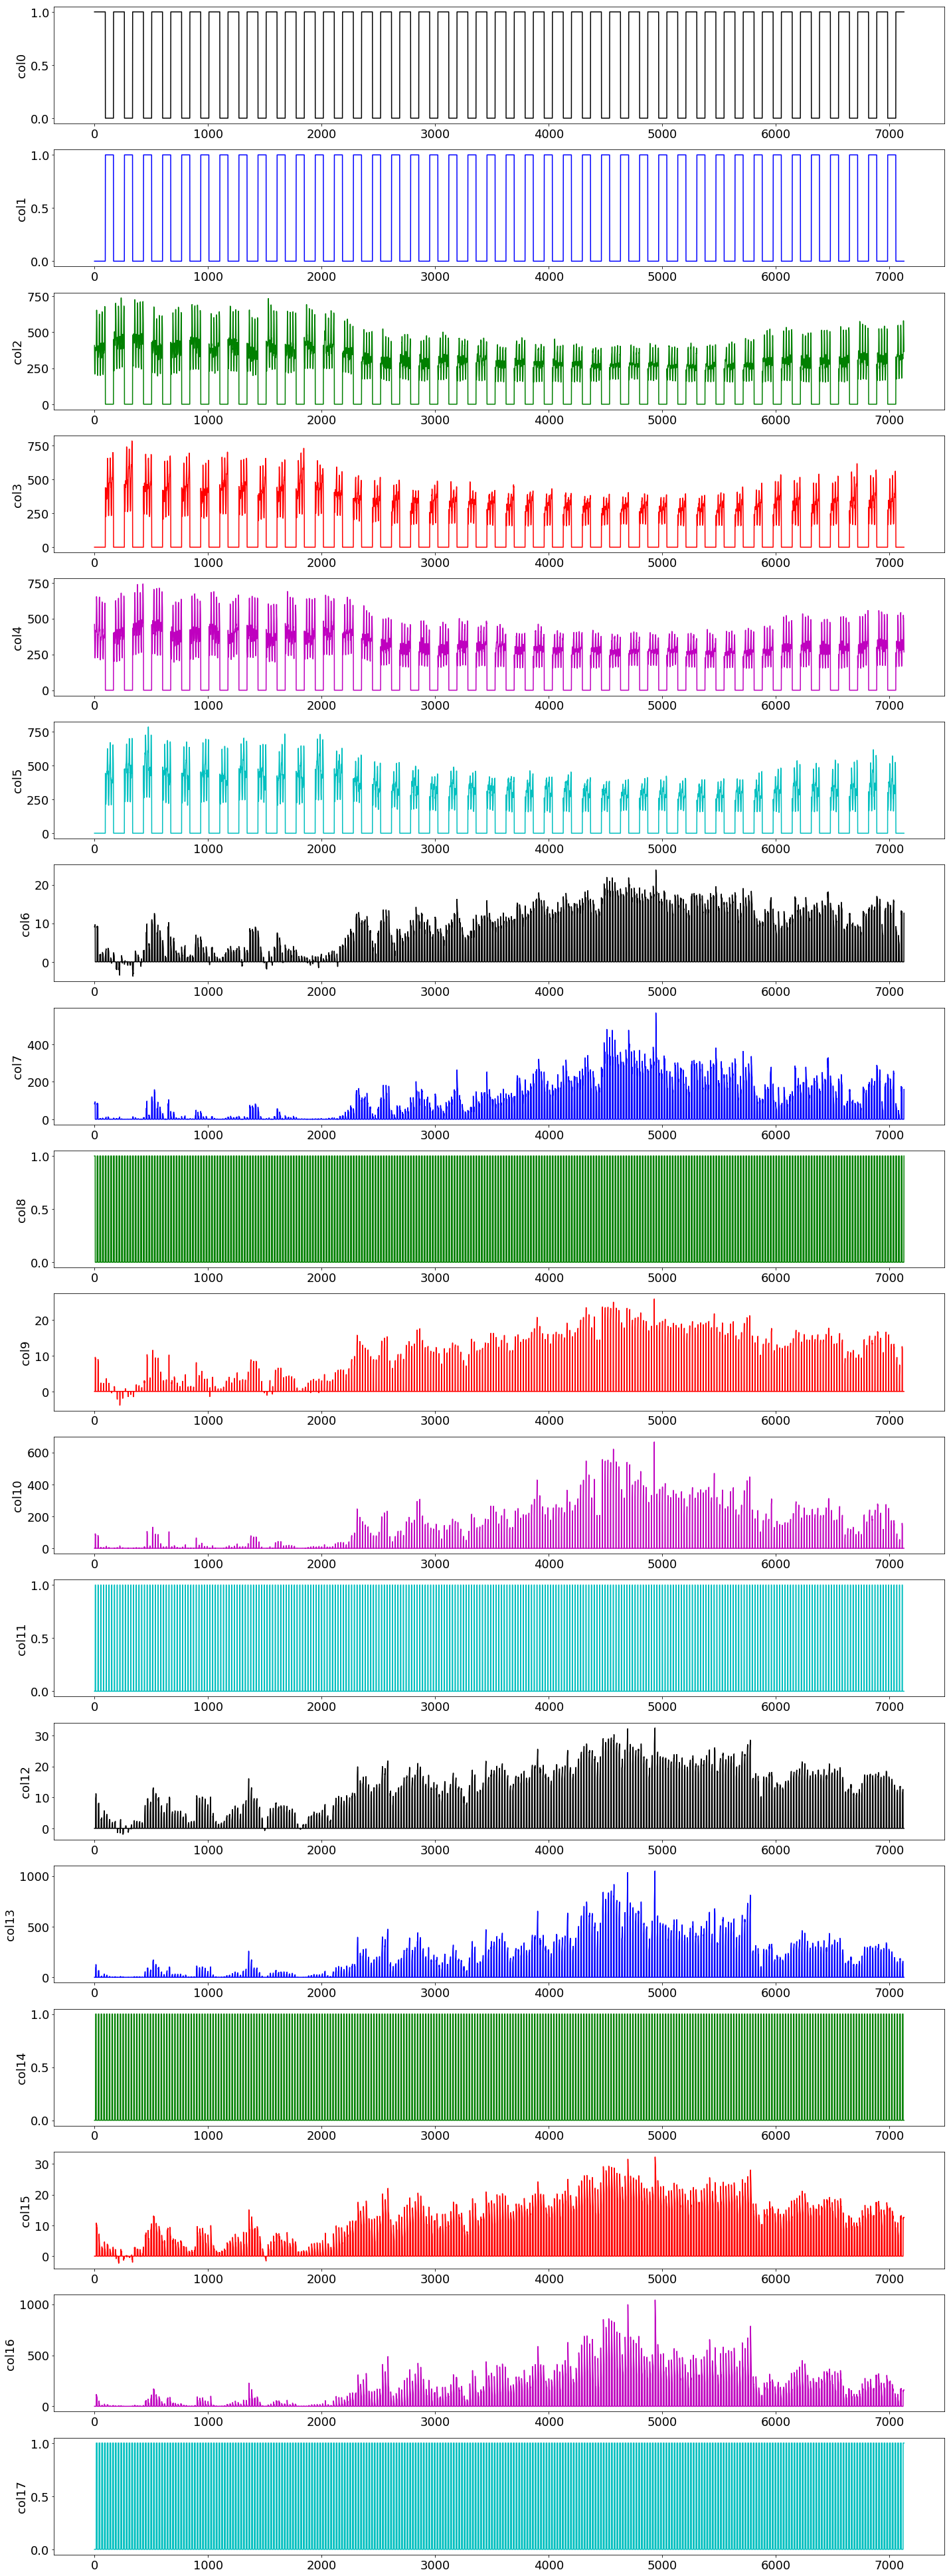

In [19]:
# review allFeatures

#allFeatures[7124:7127]
#allFeatures[:,i]
n=allFeatures.shape[1]  # no of columns to plot
plot_allFeatures(n,allFeatures)


In [20]:
print(startTrain,endTrain,startPred,endPred)
print(startTrain/24,endTrain/24,startPred/24,endPred/24)
type(yData)

0 5832 5832 7296
0.0 243.0 243.0 304.0


pandas.core.series.Series

** Training and Prediction Data **

In [21]:
# remember we do not have features for the first week (yData, all FeaturesTrain index0 on 8/Jan)

print("allFeatures shape:",allFeatures.shape)

allFeaturesTrain = allFeatures[startTrain:endTrain-168,:]
print("allFeaturesTrain shape:",allFeaturesTrain.shape)

# again, remeber no features for the first week: 

allFeaturesPredict = allFeatures[startPred-168:endPred-168,:]
print("allFeaturesPredict shape:",np.shape(allFeaturesPredict))

allFeatures shape: (7128, 18)
allFeaturesTrain shape: (5664, 18)
allFeaturesPredict shape: (1464, 18)


** now make the models **         
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.    

 Get model coefficients, intercept   
 Run model on training data to get R2 coefficient

In [22]:
# Model with quadratic temperature : 
# match lengths of allFeatures and yData (independednt var)
clfQuadraticTemp = linear_model.LinearRegression(fit_intercept=True)    # # create sklearn linear regression object
clfQuadraticTemp.fit(allFeaturesTrain, yData[startTrain:endTrain-168])  # fit linear model (self, X, y[sample_weight=None]) ; X = training data, y target values. Will be cast to X’s dtype if necessary
coefQuadraticTemp = clfQuadraticTemp.coef_                 # get fit coefficients for the linear regression (all 18  terms)
print(coefQuadraticTemp)

#get intercept from linear model
print("intercept : ",clfQuadraticTemp.intercept_   )

# get errors from training period (Run prediction on training data using regression model coefQuadraticTemp )
trainQuadraticTemp = clfQuadraticTemp.predict(allFeaturesTrain)

# get R^2 coeff of determination
scoreQuadraticTemp = clfQuadraticTemp.score(allFeaturesTrain, yData[startTrain:endTrain-168])  
print("R2 coefficient: ",scoreQuadraticTemp)


[ 0.94310593 -0.94310593  0.63142718  0.31464681  0.21470881  0.54158598
 -3.96793994  0.17088676 -4.18336521 -3.59103033  0.10800594 14.80243247
 -5.87508352  0.16039767 33.32920671 -5.52423787  0.13685634 47.7475313 ]
intercept :  54.63203259470947
R2 coefficient:  0.9593649545076733


In [23]:
# check dimensions of trainQuadtraticTemp etc

print(trainQuadraticTemp.shape)    # endTrain-(startTrain+168)
print(endTrain-(startTrain+168))

(5664,)
5664


In [24]:
# temperature unaware model  (only 6 terms)
clfTempUnaware = linear_model.LinearRegression(fit_intercept=True)   # create sklearn linear regression object
clfTempUnaware.fit(allFeaturesTrain[:,0:6], yData[startTrain:endTrain-168])   # ignore Temperature terms, use only DoW terms
coefTempUnaware = clfTempUnaware.coef_

# get errors from training period (predict for training period using regression model coefTempUnaware)
trainTempUnaware = clfTempUnaware.predict(allFeaturesTrain[:,0:6])

# get R^2 coeff of determination
scoreTempUnaware = clfTempUnaware.score(allFeaturesTrain[:,0:6], yData[startTrain:endTrain-168])  
scoreTempUnaware


0.9519483376133938

 ** Now look at the results on the validation period **

In [25]:
# lets look at the predicted and actual load for the months of september-october
actual = aggregateLoad[startPred:endPred]
predictedQuadraticTemp = np.zeros((np.shape(actual)))  # initialize 
predictedTempUnaware = np.zeros((np.shape(actual)))    # initialize 
seasonalNaive1 = aggregateLoad[startPred-24:endPred-24].values   # 24 hr lag naive persistence model
seasonalNaive2 = aggregateLoad[startPred-168:endPred-168].values # 168 hr lag naive persistence model

# predict using the QUADTRATIC temp model
predictedQuadraticTemp = clfQuadraticTemp.predict(allFeaturesPredict)     # apply all 18 coeffs to input load and temp data
# predict using the temp unaware model
predictedTempUnaware = clfTempUnaware.predict(allFeaturesPredict[:,0:6])

In [26]:
print(actual.shape)
print(predictedQuadraticTemp.shape)
predictedQuadraticTemp[:10]

(1464,)
(1464,)


array([238.07514949, 192.54787458, 172.24822765, 163.67797767,
       167.93701932, 175.12864836, 196.11940094, 244.17078407,
       292.45411026, 320.22667271])

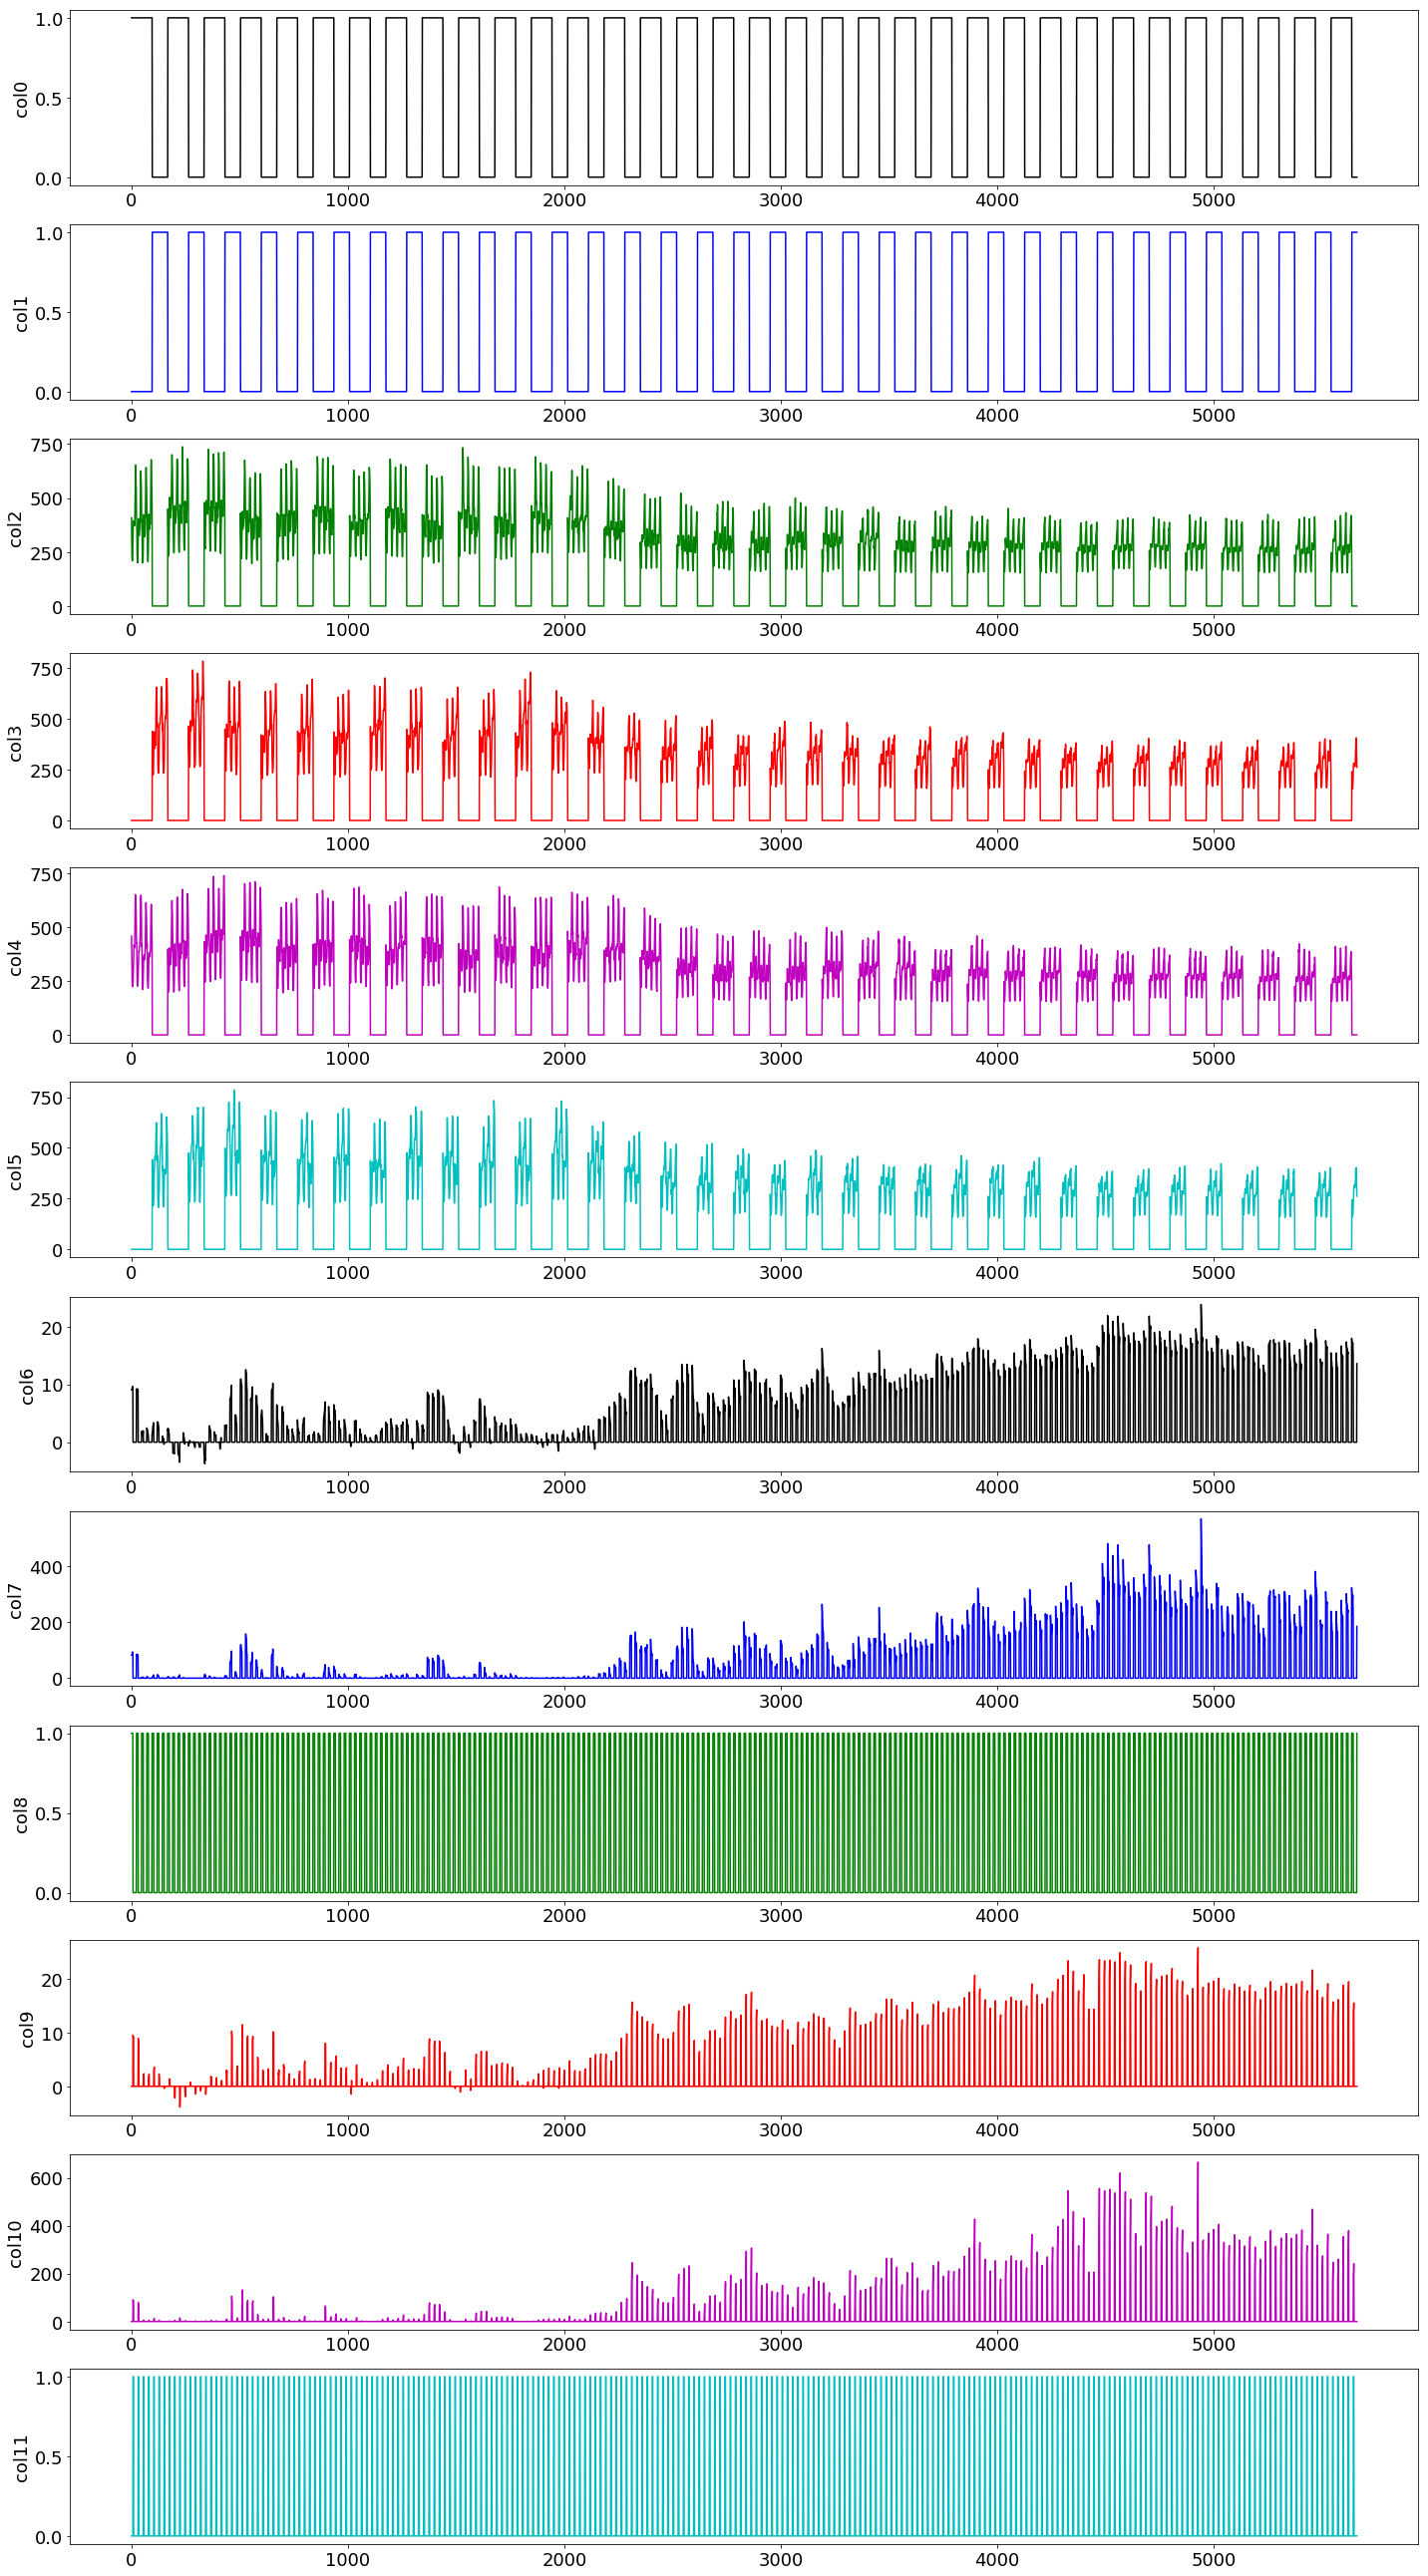

In [27]:
plot_allFeatures(12,allFeaturesTrain)

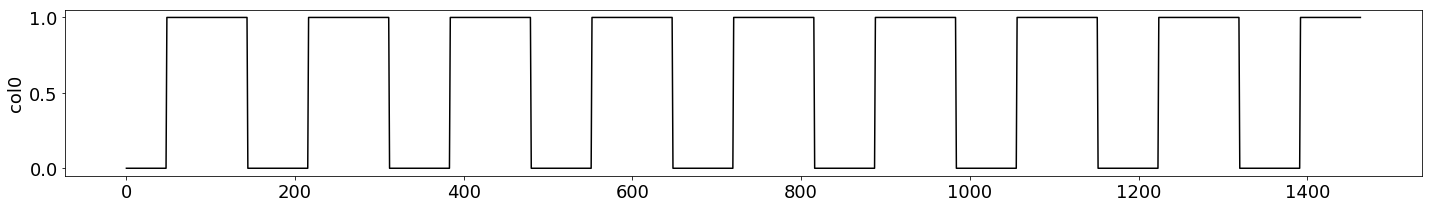

In [28]:
plot_allFeatures(1,allFeaturesPredict)

In [29]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', \
          'November', 'December']
daynum = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayLabels = ['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun']

6832 7168
[1000, 1336]


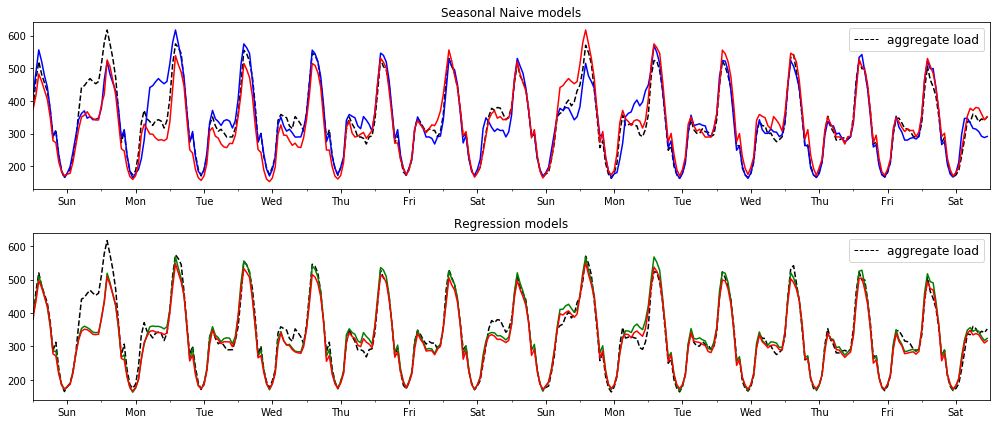

In [30]:
# Plot Actual, Predicted over ~2 week window 

fig = plt.figure(figsize = (14,6))
axs = []
#nModels = 3
window = [1000,1336]     # 14 day window
plotStart, plotEnd = startPred+window[0], startPred+window[1]
titles = ['Seasonal Naive models', 'Regression models']

print(plotStart, plotEnd)
print(window)


for j in range(2):
    axs.append(fig.add_subplot(2,1,j+1))
    
indexVals = actual.index
# find the first tick
j = startPred+window[0]
for ind in indexVals:
    if j >= plotStart:
        if ind.hour == 0:
            startTick = 0+j
            break
    j+=1
    
for j in range(2):
    axs[j].plot(np.arange(plotStart,plotEnd), actual[window[0]:window[1]], color='k', linestyle='--')
    if j == 0:
        axs[j].plot(np.arange(plotStart,plotEnd), seasonalNaive1[window[0]:window[1]], color='b', linestyle='-')
        axs[j].plot(np.arange(plotStart,plotEnd), seasonalNaive2[window[0]:window[1]], color='r', linestyle='-')
    elif j == 1:
        axs[j].plot(np.arange(plotStart,plotEnd), predictedTempUnaware[window[0]:window[1]], \
                    color='g', linestyle='-')
        axs[j].plot(np.arange(plotStart,plotEnd), predictedQuadraticTemp[window[0]:window[1]], \
                    color='r', linestyle='-')
    axs[j].set_xlim([plotStart,plotEnd])
    axs[j].set_title(titles[j])
    axs[j].set_xticks(np.arange(startTick,plotEnd,12), minor=True)   #midnight = minor ticks
    axs[j].set_xticks(np.arange(startTick+12,plotEnd,24))            #noon = major tiks
    tickLabs = []
    for ti in np.arange(startTick+12,plotEnd,24):
        tickLabs.append(dayLabels[indexVals[ti-startPred].dayofweek])   
    axs[j].set_xticklabels(tickLabs)
    
    
    lines = []
    line = mlines.Line2D([], [], color='k', label='aggregate load', linewidth=1, linestyle='--')
    lines.append(line)
    
    axs[j].legend(handles=lines, ncol=3, fontsize=12, frameon=True)

    
fig.tight_layout()
fig.savefig('./Figures/agg_result_14_days.png', dpi=300, format='png',  bbox_inches='tight')

[[0, 168], [168, 336], [336, 504], [504, 672], [672, 840], [840, 1008], [1008, 1176], [1176, 1344]]


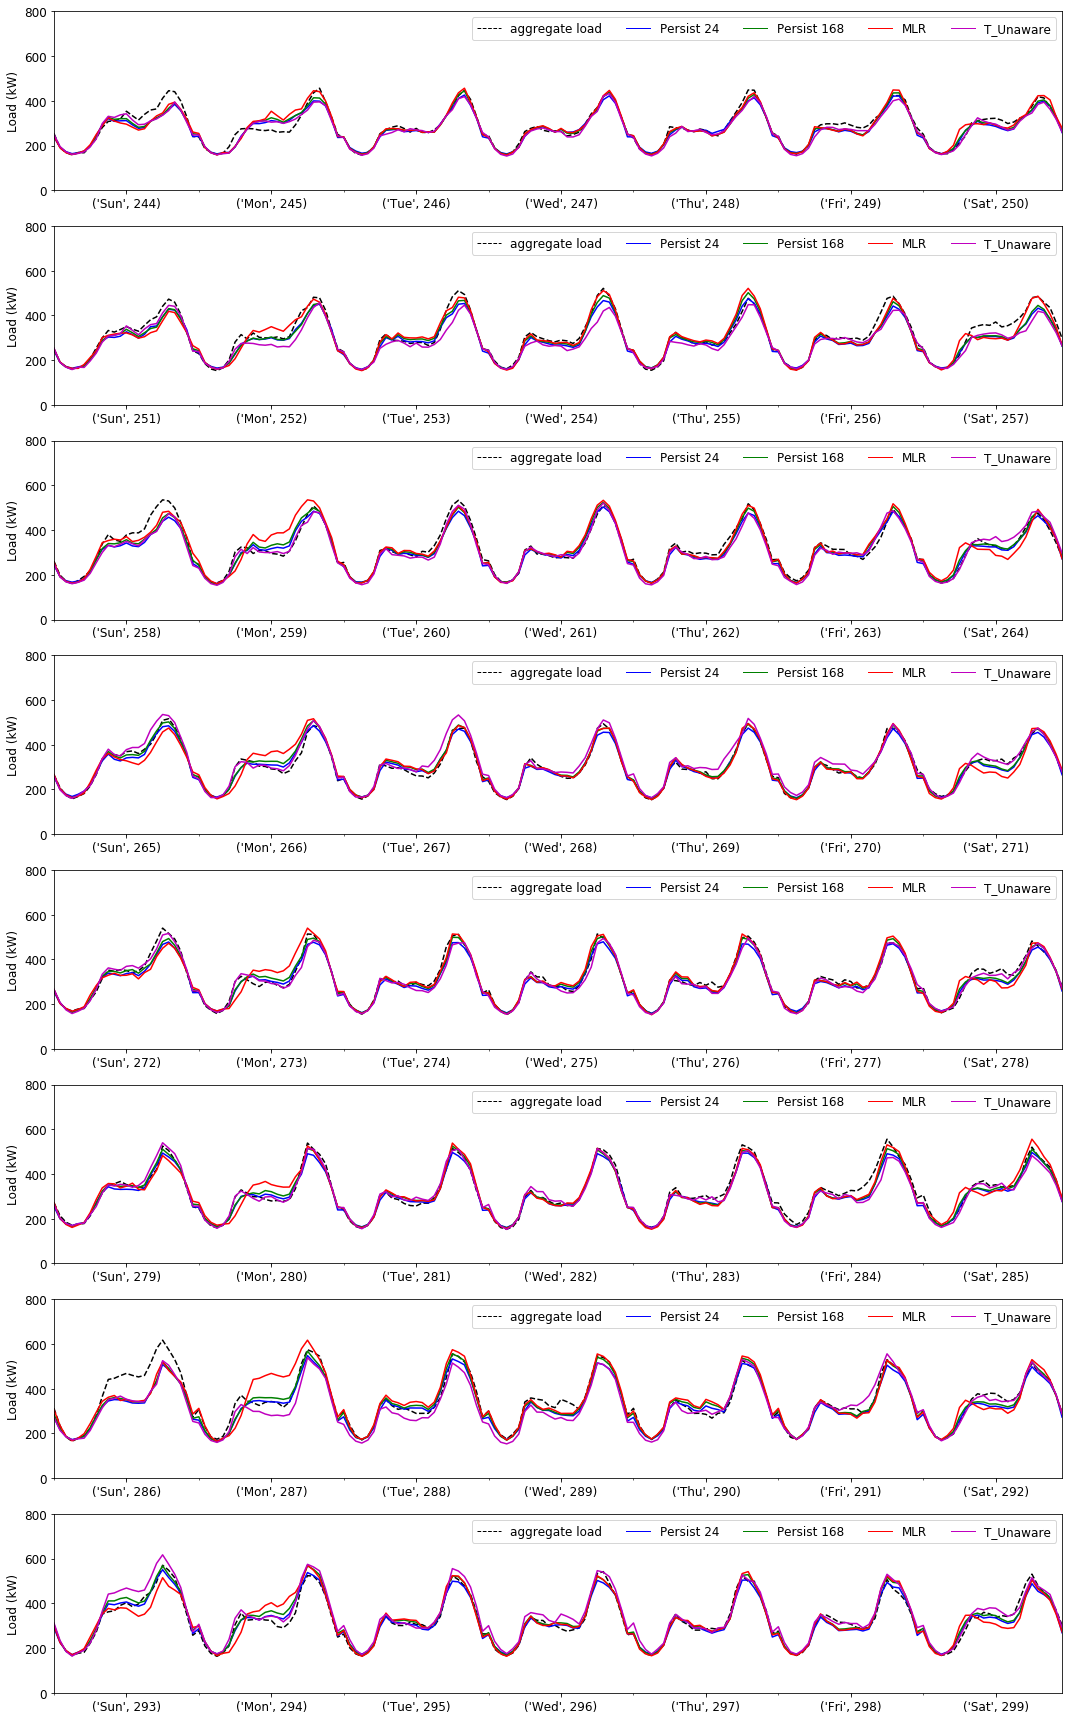

In [31]:
# Plot Actual, Naive Persistance model, MLR Quadratic Temp model

window = []
n = 8   # #weeks to plot

for i in range(n):
    window.append([i*7*24,(i+1)*7*24])
print(window)

#window = [0,240]
fig = plt.figure(figsize = (15,n*3))
axs = []

startPeriod = 0

for i in range(n):
    plotStart, plotEnd = startPred+window[i][0], startPred+window[i][1]
    axs.append(fig.add_subplot(n,1,i+1))

    indexVals = actual.index
    # find the first tick
    j = startPred+window[i][0]
    for ind in indexVals:
        if j >= plotStart:
            if ind.hour == 0:
                startTick = 0+j
                break
        j+=1
    j=0

    axs[i].plot(np.arange(plotStart,plotEnd), actual[window[i][0]:window[i][1]], color='k', linestyle='--')
    axs[i].plot(np.arange(plotStart,plotEnd), predictedQuadraticTemp[window[i][0]:window[i][1]], color='b', linestyle='-')
    axs[i].plot(np.arange(plotStart,plotEnd), predictedTempUnaware[window[i][0]:window[i][1]], color='g', linestyle='-')
    axs[i].plot(np.arange(plotStart,plotEnd), seasonalNaive1[window[i][0]:window[i][1]], color='r', linestyle='-')
    axs[i].plot(np.arange(plotStart,plotEnd), seasonalNaive2[window[i][0]:window[i][1]], color='m', linestyle='-')
    axs[i].set_xlim([plotStart,plotEnd-1])
    axs[i].set_xticks(np.arange(startTick,plotEnd,12), minor=True)
    axs[i].set_xticks(np.arange(startTick+12,plotEnd,24))
    axs[i].set_ylim([0,800])

    tickLabs = []
    for ti in np.arange(startTick+12,plotEnd,24):
        tickLabs.append((dayLabels[indexVals[ti-startPred].dayofweek],indexVals[ti-startPred].dayofyear))
    axs[i].set_xticklabels(tickLabs);
    axs[i].tick_params(axis='both', labelsize=12)
    axs[i].set_ylabel('Load (kW)', fontsize=12);

    lineLabels = ['Persist 24','Persist 168','MLR','T_Unaware']
    lines = []
    line = mlines.Line2D([], [], color='k', label='aggregate load', linewidth=1, linestyle='--')
    lines.append(line)
    lineColors = ['b','g','r','m']

    for j in range(4):
        line = mlines.Line2D([], [], color=lineColors[j], label=lineLabels[j], linewidth=1)
        lines.append(line)

    axs[i].legend(handles=lines, ncol=5, fontsize=12, frameon=True)


fig.tight_layout()
fig.savefig('./Figures/agg_result_10_days.png', dpi=300, format='png',  bbox_inches='tight')


In [32]:
# old version - latest in FM_MScProject_LoadForecasting_Module.py

#DEFINE FUNCTION TO  Plot WINDOW ON Actual, Naive Persistance model, MLR Quadratic Temp model

# aggregate:
# a)actual b) predictedQuadraticTemp c) predictedTempUnaware d) seasonalNaive1 e) seasonalNaive2

# individual :
# a) actualIndividual_nU = hourly_df.iloc[nU,startPred:endPred].values  
# b) predQuadraticTempIndividual[nU] c) predictedTempUnawareIndividual[nU] , etc etc


# n = number of 1 week windows to plot

def plot_forecast(n,startPred,actual,predQT,predTU,SN1,SN2,figTitle,yLim):
    
    window = []
    dayLabels = ['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun']
    
    for i in range(n):
        window.append([i*7*24,(i+1)*7*24])
    print(window)

    fig = plt.figure(figsize = (15,n*4))
    axs = []

#    startPeriod = 0 # not used?

    for i in range(n):
        plotStart, plotEnd = startPred+window[i][0], startPred+window[i][1]
        axs.append(fig.add_subplot(n,1,i+1))

        indexVals = actual.index
        # find the first tick
        j = startPred+window[i][0]
        for ind in indexVals:
            if j >= plotStart:
                if ind.hour == 0:
                    startTick = 0+j
                    break
            j+=1
        j=0

        axs[i].plot(np.arange(plotStart,plotEnd), actual[window[i][0]:window[i][1]], color='k', linestyle='--')
        axs[i].plot(np.arange(plotStart,plotEnd), predQT[window[i][0]:window[i][1]], color='b', linestyle='-')
        #axs[i].plot(np.arange(plotStart,plotEnd), predTU[window[i][0]:window[i][1]], color='g', linestyle='-')
        axs[i].plot(np.arange(plotStart,plotEnd), SN1[window[i][0]:window[i][1]], color='r', linestyle='-')
        #axs[i].plot(np.arange(plotStart,plotEnd), SN2[window[i][0]:window[i][1]], color='m', linestyle='-')
        axs[i].set_xlim([plotStart,plotEnd-1])
        axs[i].set_xticks(np.arange(startTick,plotEnd,12), minor=True)
        axs[i].set_xticks(np.arange(startTick+12,plotEnd,24))
        
        axs[i].set_ylim([yLim[0],yLim[1]])

        tickLabs = []
        for ti in np.arange(startTick+12,plotEnd,24):
            tickLabs.append((dayLabels[indexVals[ti-startPred].dayofweek])) #,indexVals[ti-startPred].dayofyear
        axs[i].set_xticklabels(tickLabs);
        axs[i].tick_params(axis='both', labelsize=12)
        axs[i].set_ylabel('Load (kW)', fontsize=12);

        #lineLabels = ['Persist 24','Persist 168','MLR','T_Unaware']
        lineLabels = ['Persist 24','MLR']
        lines = []
        #line = mlines.Line2D([], [], color='k', label='aggregate load', linewidth=1, linestyle='--')
        line = mlines.Line2D([], [], color='k', label='load', linewidth=1, linestyle='--')
        lines.append(line)
        #lineColors = ['b','g','r','m']
        lineColors = ['b','r']
        for j in range(len(lineLabels)):
            line = mlines.Line2D([], [], color=lineColors[j], label=lineLabels[j], linewidth=1)
            lines.append(line)

        axs[i].legend(handles=lines, ncol=5, fontsize=12, frameon=True,loc='upper right')


    fig.tight_layout()
    fig.savefig(figTitle, dpi=300, format='png',  bbox_inches='tight')


[[0, 168]]


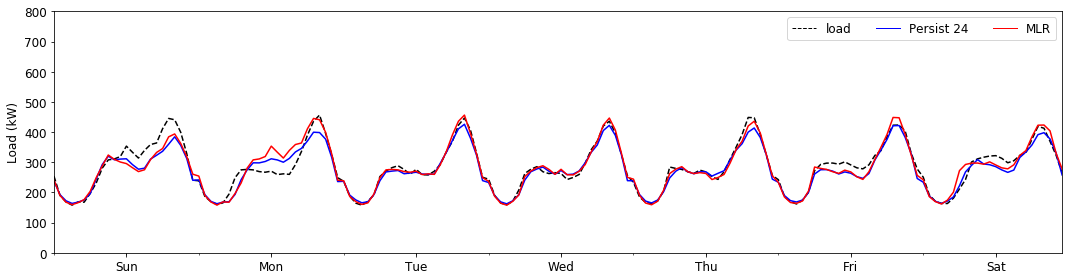

In [33]:
plot_forecast(1,startPred,actual,predictedQuadraticTemp,predictedTempUnaware,seasonalNaive1,seasonalNaive2,\
              './Figures/agg_result_10_days.png',[0,800])

In [34]:
# save the training data to create a NN
with open('./intermediateData/aggTrainingData.pickle', 'wb') as f:
    pickle.dump(allFeaturesTrain, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('./intermediateData/aggLoad.pickle', 'wb') as f:
    pickle.dump(aggregateLoad, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('./intermediateData/aggTestingData.pickle', 'wb') as f:
    pickle.dump(allFeaturesPredict, f, protocol=pickle.HIGHEST_PROTOCOL)

In [35]:
# copied from above
# get ordinal row # for selected uIDs 

rowN = getRowN_of_uID([5293, 5007, 381, 2487, 5343, 5275],hourly_df.index)

# select uIDs to highlight (where u = row of df containing user uID)

idHighlight = [hourly_df.index[u] for u in rowN]
idHighlight    # selected uID


Row# for uID 5293 is :  682
Row# for uID 5007 is :  644
Row# for uID 381 is :  54
Row# for uID 2487 is :  293
Row# for uID 5343 is :  692
Row# for uID 5275 is :  677
row numbers of uID:  [682, 644, 54, 293, 692, 677]


[5293, 5007, 381, 2487, 5343, 5275]

In [36]:
idHighlight
print(len(allFeaturesTrain))
print(len(allFeaturesPredict))
print(len(aggregateLoad))

#seasonalNaive1

5664
1464
8760


** First plot ACTUAL load curves over 61 day prediction period    
Aggregate of All users + 3 individual users from idHighlight **

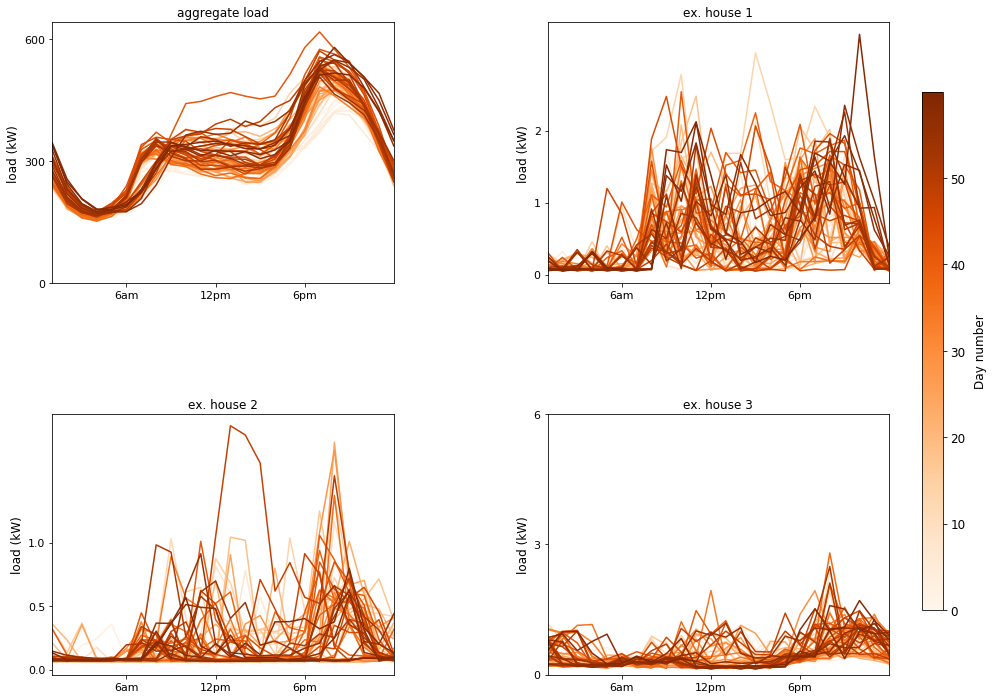

In [37]:
#create colormap which has EUI?
minVal, maxVal = 0, 60.             # 60 days ~ Sep, October
cmOcc = plt.cm.get_cmap('Oranges')
cNorm = colors2.Normalize(vmin=minVal, vmax=maxVal)
scalarMap3 = cmx.ScalarMappable(norm=cNorm, cmap=cmOcc)
scalarMap3._A = []

# Look at each day in the forecast period
fig = plt.figure(figsize = (15,12))
axs = [fig.add_subplot(2,2,i+1) for i in range(4)]

counter = 0
for row in (actual.values).reshape(int(lenPrediction/24),24):               # reshape to 61*24 ie each row is 1 day 
    cl = scalarMap3.to_rgba((counter/np.float(lenPrediction/24))*60)        # scale colour by day (counter) value
    cl = colors2.rgb2hex(cl)
    axs[0].plot(np.arange(1,25),row,color=cl)                               #plot actual AGGREGATE  load curve for day with colour of day
    counter+=1

# look at the same for 3 random individuals 
actualInd = hourly_df.loc[idHighlight[0]][startPred:endPred]
counter = 0
for row in (actualInd.values).reshape(int(lenPrediction/24),24):
    cl = scalarMap3.to_rgba((counter/np.float(lenPrediction/24))*60)
    cl = colors2.rgb2hex(cl)
    axs[1].plot(np.arange(1,25),row,color=cl)                              # example1 actual load curves over prediction period
    counter+=1

actualInd = hourly_df.loc[idHighlight[1]][startPred:endPred]
counter = 0
for row in (actualInd.values).reshape(int(lenPrediction/24),24):
    cl = scalarMap3.to_rgba((counter/np.float(lenPrediction/24))*60)
    cl = colors2.rgb2hex(cl)
    axs[2].plot(np.arange(1,25),row,color=cl)                               # example2 actual load curves over prediction period
    counter+=1
    
actualInd = hourly_df.loc[idHighlight[2]][startPred:endPred]
counter = 0
for row in (actualInd.values).reshape(int(lenPrediction/24),24):
    cl = scalarMap3.to_rgba((counter/np.float(lenPrediction/24))*60)
    cl = colors2.rgb2hex(cl)
    axs[3].plot(np.arange(1,25),row,color=cl)                              # example3 actual load curves over prediction period
    counter+=1

plotTitles = ['aggregate load', 'ex. house 1', 'ex. house 2', 'ex. house 3']
for i in range(4):
    axs[i].set_title(plotTitles[i])
    axs[i].set_xlim([1,24])
    axs[i].set_ylabel('load (kW)', fontsize=12)
    axs[i].set_xticks(np.array([6,12,18]))
    axs[i].set_xticklabels(['6am','12pm','6pm'])
    axs[i].tick_params(axis='both', labelsize=11)
axs[0].set_yticks([0,300,600])    
axs[1].set_yticks([0,1,2])
axs[2].set_yticks([0,0.5,1])
axs[3].set_yticks([0,3,6])
plt.subplots_adjust(wspace=0.45, hspace=0.5)

cbar_ax = plt.axes([0.93, 0.2, 0.02, 0.6])
cbar = fig.colorbar(scalarMap3, cax=cbar_ax, ticks=np.arange(0,60,10), orientation='vertical')
cbar_ax.tick_params(axis='both', which='major', labelsize=12)
cbar.set_label('Day number', labelpad=9, rotation=90, fontsize=12)
fig.savefig('./Figures/daily_load_evolution_aggregate_vs_individual.png',\
dpi=300, format='png',  bbox_inches='tight')


** Above plots show user actual load curves for 61 days over prediction window **

In [38]:
type(predictedQuadraticTemp)
type(actual.values)
type(actual)
actual

2013-09-01 00:00:00    254.222000
2013-09-01 01:00:00    190.220000
2013-09-01 02:00:00    168.508000
2013-09-01 03:00:00    158.025000
2013-09-01 04:00:00    168.722000
                          ...    
2013-10-31 19:00:00    516.414001
2013-10-31 20:00:00    511.770000
2013-10-31 21:00:00    479.615000
2013-10-31 22:00:00    421.791000
2013-10-31 23:00:00    350.321000
Length: 1464, dtype: float64

** Now plot PREDICTED load profiles **

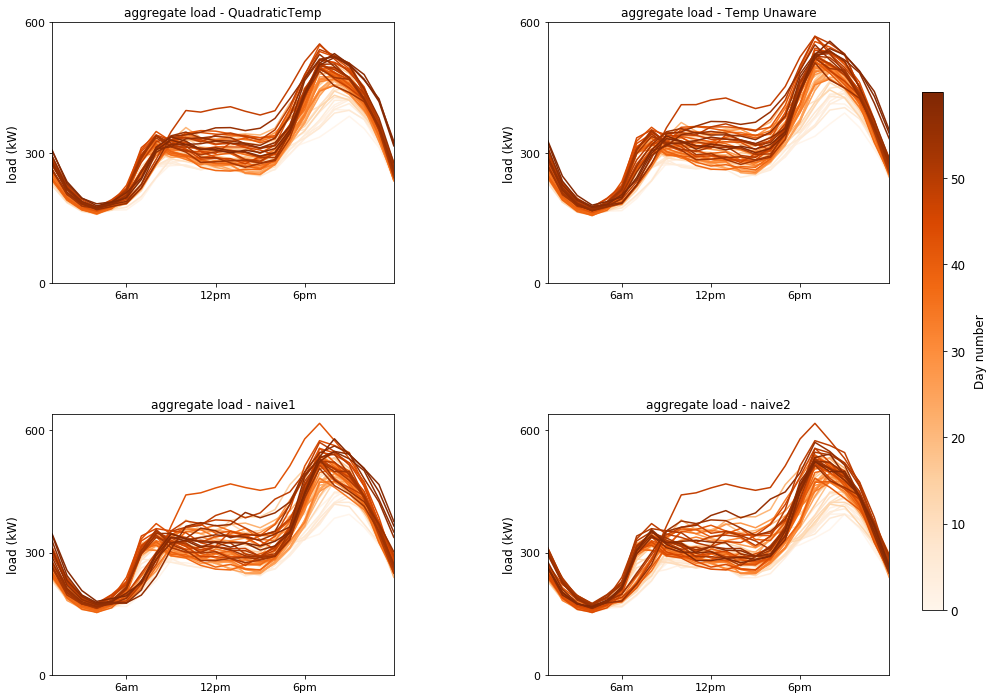

In [39]:
# Now  Plook at the QuadraticT,Temp unaware and naive persistence predictions

#create colormap which has EUI?
minVal, maxVal = 0, 60.             # 60 days ~ Sep, October
cmOcc = plt.cm.get_cmap('Oranges')
cNorm = colors2.Normalize(vmin=minVal, vmax=maxVal)
scalarMap3 = cmx.ScalarMappable(norm=cNorm, cmap=cmOcc)
scalarMap3._A = []

# Look at each day in the forecast period
fig = plt.figure(figsize = (15,12))
axs = [fig.add_subplot(2,2,i+1) for i in range(4)]

counter = 0
for row in (predictedQuadraticTemp).reshape(int(lenPrediction/24),24):               # reshape to 61*24 ie each row is 1 day 
    cl = scalarMap3.to_rgba((counter/np.float(lenPrediction/24))*60)        # scale colour by day (counter) value
    cl = colors2.rgb2hex(cl)
    axs[0].plot(np.arange(1,25),row,color=cl)                               #plot QuadT predicted aggregate load curve for day with colour of day
    counter+=1


counter = 0
for row in (predictedTempUnaware).reshape(int(lenPrediction/24),24):
    cl = scalarMap3.to_rgba((counter/np.float(lenPrediction/24))*60)
    cl = colors2.rgb2hex(cl)
    axs[1].plot(np.arange(1,25),row,color=cl)                            #plot T unaware predicted aggregate  load curve for day with colour of day
    counter+=1

counter = 0
for row in (seasonalNaive1).reshape(int(lenPrediction/24),24):
    cl = scalarMap3.to_rgba((counter/np.float(lenPrediction/24))*60)
    cl = colors2.rgb2hex(cl)
    axs[2].plot(np.arange(1,25),row,color=cl)                            #plot seasonal naive1  aggregate  load curve for day with colour of day
    counter+=1

counter = 0
for row in (seasonalNaive2).reshape(int(lenPrediction/24),24):
    cl = scalarMap3.to_rgba((counter/np.float(lenPrediction/24))*60)
    cl = colors2.rgb2hex(cl)
    axs[3].plot(np.arange(1,25),row,color=cl)                            #plot seasonal naive2  aggregate  load curve for day with colour of day
    counter+=1

plotTitles = ['aggregate load - QuadraticTemp', 'aggregate load - Temp Unaware', 'aggregate load - naive1', 'aggregate load - naive2']

for i in range(4):
    axs[i].set_title(plotTitles[i])
    axs[i].set_xlim([1,24])
    axs[i].set_ylabel('load (kW)', fontsize=12)
    axs[i].set_xticks(np.array([6,12,18]))
    axs[i].set_xticklabels(['6am','12pm','6pm'])
    axs[i].tick_params(axis='both', labelsize=11)
axs[0].set_yticks([0,300,600])    
axs[1].set_yticks([0,300,600])
axs[2].set_yticks([0,300,600])
axs[3].set_yticks([0,300,600])
plt.subplots_adjust(wspace=0.45, hspace=0.5)

cbar_ax = plt.axes([0.93, 0.2, 0.02, 0.6])
cbar = fig.colorbar(scalarMap3, cax=cbar_ax, ticks=np.arange(0,60,10), orientation='vertical')
cbar_ax.tick_params(axis='both', which='major', labelsize=12)
cbar.set_label('Day number', labelpad=9, rotation=90, fontsize=12)

fig.savefig('./Figures/predicted_daily_load_evolution_aggregate.png',\
dpi=300, format='png',  bbox_inches='tight')

above plots show predicted load curves for various models (all aggregate loads)     
    
        

** error analysis for AGGREGATE prediction:  **

In [40]:
len(predictedTempUnaware)

1464

In [41]:
# calculate MAPE's for the forecast.  
# recall 'actual' contains load data for prediction window, 
# seasonalNaive1,2,predicted etc : all have length = prediction window length ie same as 'actual'

APEs = np.zeros((lenPrediction,4))
APEs[:,0] = np.abs(seasonalNaive1-actual)/np.abs(actual)   # diff /actual
APEs[:,1] = np.abs(seasonalNaive2-actual)/np.abs(actual)
APEs[:,2] = np.abs(predictedTempUnaware-actual)/np.abs(actual)
APEs[:,3] = np.abs(predictedQuadraticTemp-actual)/np.abs(actual)
APEs

array([[0.05011368, 0.01761846, 0.03387995, 0.06351476],
       [0.00106193, 0.0290348 , 0.01667176, 0.0122378 ],
       [0.00489591, 0.01821872, 0.01077053, 0.02219614],
       [0.00924537, 0.01677583, 0.01708029, 0.03577268],
       [0.01523216, 0.02401584, 0.01722135, 0.00465251],
       [0.05142199, 0.02247513, 0.03744689, 0.04459624],
       [0.03509825, 0.00956809, 0.01027785, 0.00239888],
       [0.07693173, 0.00756514, 0.02739637, 0.05613855],
       [0.02619189, 0.06399532, 0.04343815, 0.04230873],
       [0.05241895, 0.0740315 , 0.05948237, 0.03995698],
       ...,
       [0.04199305, 0.14040914, 0.06378249, 0.08811056],
       [0.03405631, 0.14088319, 0.05805595, 0.08608202],
       [0.07750952, 0.07180816, 0.08271948, 0.07149785],
       [0.02329658, 0.01667071, 0.02677722, 0.04301096],
       [0.04572752, 0.02253631, 0.02792031, 0.0095798 ],
       [0.12169306, 0.03448203, 0.07851946, 0.02326052],
       [0.05545069, 0.02443285, 0.02744808, 0.0156768 ],
       [0.0565662 ,

In [46]:
APEs = np.zeros((len(actual),4))
APEs[:,0] = mape_calc(actual,seasonalNaive1)
APEs[:,1] = mape_calc(actual,seasonalNaive2)
APEs[:,2] = mape_calc(actual,predictedTempUnaware)
APEs[:,3] = mape_calc(actual,predictedQuadraticTemp)
APEs

MAPEs = np.mean(APEs, axis=0)
MAPEs

array([0.0637302 , 0.06328596, 0.04814437, 0.05224757])

In [47]:
CVs = np.zeros((len(actual),4))

CVs[:,0] = cv_calc(actual,seasonalNaive1)
CVs[:,1] = cv_calc(actual,seasonalNaive2)
CVs[:,2] = cv_calc(actual,predictedTempUnaware)
CVs[:,3] = cv_calc(actual,predictedQuadraticTemp)
CVs

mCVs = np.mean(CVs, axis=0)
mCVs

array([0.09808283, 0.09425169, 0.07319407, 0.07920748])

In [48]:
RMSEs = np.zeros((len(actual),4))

RMSEs[:,0] = rmse_calc(actual,seasonalNaive1)
RMSEs[:,1] = rmse_calc(actual,seasonalNaive2)
RMSEs[:,2] = rmse_calc(actual,predictedTempUnaware)
RMSEs[:,3] = rmse_calc(actual,predictedQuadraticTemp)
RMSEs

mRMSEs = np.mean(RMSEs, axis=0)
mRMSEs

array([30.99508413, 29.78440958, 23.13000522, 25.03030066])

In [49]:
NRMSEs = np.zeros((len(actual),4))

NRMSEs[:,0] = nrmse_calc(actual,seasonalNaive1)
NRMSEs[:,1] = nrmse_calc(actual,seasonalNaive2)
NRMSEs[:,2] = nrmse_calc(actual,predictedTempUnaware)
NRMSEs[:,3] = nrmse_calc(actual,predictedQuadraticTemp)
NRMSEs

mNRMSEs = np.mean(NRMSEs, axis=0)
mNRMSEs

array([0.06669927, 0.06409398, 0.04977417, 0.05386347])

[0.0637302  0.06328596 0.04814437 0.05224757]


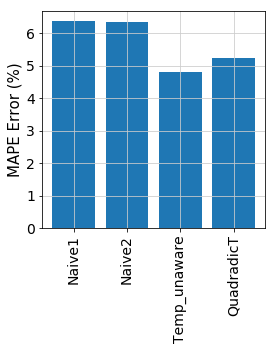

In [51]:
# Plot MAPEs for prediction

fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)
ax1.bar([0,1,2,3],MAPEs*100)
ax1.set_ylabel('MAPE Error (%)',fontsize=15)
ax1.grid(which='both')
ax1.set_xticks(np.array([0,1,2,3]))
ax1.set_xticklabels(['Naive1','Naive2','Temp_unaware','QuadradicT'],rotation='vertical')
ax1.tick_params(axis='both', labelsize=14)

print(MAPEs)
#ax1.set_title('Mean Avg % Errors for AGGREGATE load forecast over 61 day prediction period',fontsize=12)
fig.savefig('./Figures/MAPEs_aggregate.png',dpi=300, format='png',  bbox_inches='tight')

Temp Unaware model is actually slightly better than Quadratic Temperature model !     
May need to go back and test different fits for load as f(temperature) in each HoD band ......

In [52]:
startTrain, endTrain, len(trainQuadraticTemp), 168+5664, len(aggregateLoad[startTrain+144:endTrain-24])

(0, 5832, 5664, 5832, 5664)

In [55]:
# get MAPEs for the training period for comparison : for a) QuadtraticTemp model b) Naive1 (24 hr lag) model
# recall: yData = aggregateLoad[startTrain+168:endPred]   

APEsTrain = np.zeros((len(trainQuadraticTemp),4))
APEsTrain[:,0] = np.abs(aggregateLoad[startTrain+144:endTrain-24].values-yData[0:len(trainQuadraticTemp)])/np.abs(yData[0:len(trainQuadraticTemp)])
APEsTrain[:,1] = np.abs(aggregateLoad[startTrain:endTrain-168].values-yData[0:len(trainQuadraticTemp)])/np.abs(yData[0:len(trainQuadraticTemp)])
APEsTrain[:,2] = np.abs(trainQuadraticTemp-yData[0:len(trainQuadraticTemp)])/np.abs(yData[0:len(trainQuadraticTemp)])
APEsTrain[:,3] = np.abs(trainTempUnaware-yData[0:len(trainQuadraticTemp)])/np.abs(yData[0:len(trainQuadraticTemp)])


In [58]:
MAPEsTrain = np.mean(APEsTrain, axis=0)
MAPEsTrain

array([0.06026323, 0.07328951, 0.04769414, 0.04939233])

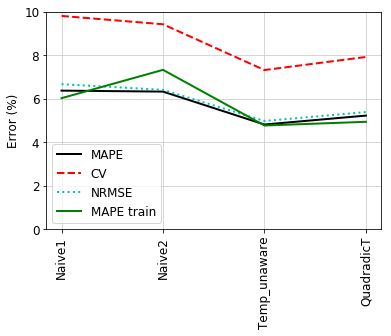

In [60]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)

ax1.plot([0,1,2,3],MAPEs*100,color='k',lw=2,label='MAPE',linestyle='solid')
ax1.plot([0,1,2,3],mCVs*100,color='r',lw=2,label='CV',linestyle='dashed')
ax1.plot([0,1,2,3],mNRMSEs*100,color='c',lw=2,label='NRMSE',linestyle='dotted')
ax1.plot([0,1,2,3],MAPEsTrain*100,color='g',lw=2,label='MAPE train',linestyle='solid')

ax1.set_ylabel('Error (%)',fontsize=12)
ax1.grid(which='both')
ax1.set_xticks(np.array([0,1,2,3]))
ax1.set_ylim(0,10)
ax1.set_xticklabels(['Naive1','Naive2','Temp_unaware','QuadradicT'],rotation='vertical')
ax1.tick_params(axis='both', labelsize=12)
plt.legend(ncol=1,fontsize=12)



In [ ]:
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)
ax1.bar([0,1,2,3],MAPEs*100)
ax1.set_ylabel('MAPE Error (%)',fontsize=15)
ax1.grid(which='both')
ax1.set_xticks(np.array([0,1,2,3]))
ax1.set_xticklabels(['Naive1','Naive2','Temp_unaware','QuadradicT'],rotation='vertical')
ax1.tick_params(axis='both', labelsize=14)

print(MAPEs)
#ax1.set_title('Mean Avg % Errors for AGGREGATE load forecast over 61 day prediction period',fontsize=12)
fig.savefig('./Figures/MAPEs_aggregate.png',dpi=300, format='png',  bbox_inches='tight')

** Now look at forecasts for single users:     
First: set up allFeatures for all users  **

In [61]:
print(np.shape(allFeatures))
print(featureLength)
endPred-(startTrain-168)
len(hourly_df)

(7128, 18)
7128


722

In [62]:
# set up allFeaturesIndividual np array with all input DoY, HoD and load, temperature terms 

nUsers = len(hourly_df)
allFeaturesIndividual = np.zeros((featureLength,12+6*nUsers))

# temperature based features (interact with hour)  i.e. 12 HoD * T terms 
#(independent of user i.e. same for all users and aggregate)
allFeaturesIndividual[:,0:12] = allFeatures[:,6:]    # ie HoD Temp terms

for nU in range(nUsers):                             # for each uID, set the 6 DoW*load terms
    allFeaturesIndividual[:,12+(6*nU)] = 1.
    allFeaturesIndividual[:,12+(6*nU+1)] = 1.
    allFeaturesIndividual[:,12+(6*nU+2)] = hourly_df.iloc[nU][startTrain+144:endPred-24].values   # 24hr lag
    allFeaturesIndividual[:,12+(6*nU+3)] = hourly_df.iloc[nU][startTrain+144:endPred-24].values
    allFeaturesIndividual[:,12+(6*nU+4)] = hourly_df.iloc[nU][startTrain:endPred-168].values    # 168 hrs lag
    allFeaturesIndividual[:,12+(6*nU+5)] = hourly_df.iloc[nU][startTrain:endPred-168].values

# day interact with 1 week and 1 week before features
for j in range(featureLength):
    dayTrain = yData.index[j].dayofweek
    
    dummy = np.zeros((len(dayClassifier)))
    for k in range(len(dayClassifier)):
        dummy[k] = (dayTrain in dayClassifier[k])
        
    for nU in range(nUsers):
        # constants
        allFeaturesIndividual[j,12+(6*nU)] = dummy[0]*allFeaturesIndividual[j,12+(6*nU)]
        allFeaturesIndividual[j,12+(6*nU+1)] = dummy[1]*allFeaturesIndividual[j,12+(6*nU+1)]
        # 24 hr lag
        allFeaturesIndividual[j,12+(6*nU+2)] = dummy[0]*allFeaturesIndividual[j,12+(6*nU+2)]
        allFeaturesIndividual[j,12+(6*nU+3)] = dummy[1]*allFeaturesIndividual[j,12+(6*nU+3)]
        # 168 hr lag
        allFeaturesIndividual[j,12+(6*nU+4)] = dummy[0]*allFeaturesIndividual[j,12+(6*nU+4)]
        allFeaturesIndividual[j,12+(6*nU+5)] = dummy[1]*allFeaturesIndividual[j,12+(6*nU+5)]
        

In [63]:
allFeaturesIndividual.shape   # columns = 12 + (722*6)

(7128, 4344)

** Training data  (Individual users) **

In [64]:
# remember we do not have features for the first week
allFeaturesIndividualTrain = allFeaturesIndividual[startTrain:endTrain-168,:]
allFeaturesIndividualTrain.shape

(5664, 4344)

** Prediction Data (Individual users)  **

In [65]:
# again, remember we do not have features for the first week!!
allFeaturesIndividualPredict = allFeaturesIndividual[startPred-168:endPred-168,:]
allFeaturesIndividualPredict.shape
#len(actual)

(1464, 4344)

In [66]:
#hourly_df.iloc[:,0]

** Make the individual models for all users **

In [67]:
predQuadraticTempIndividual = np.zeros((nUsers, len(actual)))  # recall: len(actual)=startPred:endPred
predTempUnawareIndividual = np.zeros((nUsers, len(actual)))
seasonalNaive1Individual = np.zeros((nUsers, len(actual)))
seasonalNaive2Individual = np.zeros((nUsers, len(actual)))

# compute naive model for all users   (using data from 1 day or 7 days behind prediction time)
for nU in range(nUsers):        
    seasonalNaive1Individual[nU,:] = hourly_df.iloc[nU,startPred-24:endPred-24].values
    seasonalNaive2Individual[nU,:] = hourly_df.iloc[nU,startPred-168:endPred-168].values

# compute quadratic temp and temp unaware models for each users 
for nU in range(nUsers):          
    columns = []
    for j in range(12):           # ie keep 1st 12 cols (HOD Temp terms) for all users
        columns.append(j)
    for j in range(12+(nU*6),12+(nU*6+6)):   # get col index range for user nU
        columns.append(j)
         
    # model qudratic temp (18 terms for each user: 12 temperature terms + 6 DoW terms)
    clfQuadraticTempIndividual = linear_model.LinearRegression(fit_intercept=True)      # create sklearn linear regression object
    clfQuadraticTempIndividual.fit(allFeaturesIndividualTrain[:,columns],  \
                                  hourly_df.iloc[nU,startTrain+168:endTrain].values)   # fit linear model (self, X, y)    

    predQuadraticTempIndividual[nU,:] = clfQuadraticTempIndividual.predict(allFeaturesIndividualPredict[:,columns])   # predict using the QUADRATIC temp model
    
    # Model seasonal only temp unaware  (6 terms for each user)
    columns = columns[12:]
    clfTempUnawareIndividual = linear_model.LinearRegression(fit_intercept=True)
    clfTempUnawareIndividual.fit(allFeaturesIndividualTrain[:,columns], \
                                 hourly_df.iloc[nU,startTrain+168:endTrain].values)
    # predict using the temp unaware model
    predTempUnawareIndividual[nU,:] = clfTempUnawareIndividual.predict(allFeaturesIndividualPredict[:,columns])
  

# Note : errors for training period not currently calculated   ie no trainQuadraticTempIndividual etc

In [68]:
print(predQuadraticTempIndividual.shape)  # 1 row per user 
print(predictedQuadraticTemp.shape)  # 1 single array (aggregate)

u=np.random.randint(nUsers)
print(len(predQuadraticTempIndividual[u]))
print(predQuadraticTempIndividual[u])

(722, 1464)
(1464,)
1464
[0.1974655  0.16054703 0.16277346 0.16875173 0.16886348 0.16540089
 0.19872118 0.43806379 0.4435782  0.43971895 0.3498873  0.31422531
 0.31327032 0.32538163 0.31087578 0.37137066 0.64220776 0.45276154
 0.34139618 0.42581756 0.58621194 0.39462375 0.40729954 0.28601665
 0.1714601  0.1499179  0.14330869 0.15150268 0.17043309 0.15176972
 0.15265436 0.4362077  0.42670657 0.4587805  0.49252816 0.31775933
 0.31807785 0.31754062 0.31526789 0.32900752 0.37190531 0.3474118
 0.3487801  0.33155926 0.35663563 0.77537028 0.64316318 0.23867132
 0.16153426 0.14779705 0.13251493 0.12467557 0.13094683 0.13592922
 0.12971163 0.43129616 0.44638688 0.43348729 0.72830377 0.35144223
 0.41376205 0.34343719 0.28649894 0.3010214  0.32614495 0.34576831
 0.30194602 0.33074892 0.48732333 0.38297147 0.37553959 0.26146019
 0.14934443 0.12806537 0.12851136 0.12977986 0.12858975 0.13089654
 0.1326639  0.41910778 0.40738096 0.44270858 0.43504869 0.83461356
 0.45879395 0.32945176 0.34363805 0.35

 Regression & persistence models for individual users complete ..    
 
 Predicted data in:    
 
 seasonalNaive1Individual    
 seasonalNaive2Individual    
 predQuadraticTempIndividual    
 predTempUnawareIndividual    
 
 
 

In [69]:
# actual load profile data 

actualIndividual = hourly_df.iloc[:,startPred:endPred].values
actualIndividual


array([[0.336    , 0.347    , 0.306    , 0.22     , 0.223    , 0.223    ,
        0.224    , 0.222    , 0.223    , 0.26     , ..., 0.206    ,
        0.205    , 0.211    , 0.259    , 0.466    , 0.545    , 0.972    ,
        0.478    , 0.481    , 0.462    ],
       [0.486    , 0.539    , 0.477    , 0.394    , 0.427    , 0.409    ,
        0.523    , 1.824    , 1.677    , 1.78     , ..., 1.307    ,
        0.99     , 0.849    , 1.71     , 2.285    , 2.679    , 1.326    ,
        1.09     , 1.347    , 0.859    ],
       [0.929    , 1.124    , 0.879    , 0.89     , 0.448    , 0.301    ,
        0.3      , 0.326    , 0.293    , 0.291    , ..., 0.636    ,
        0.419    , 0.358    , 0.644    , 0.317    , 0.266    , 0.281    ,
        0.266    , 0.266    , 0.265    ],
       [0.069    , 0.092    , 0.191    , 0.19     , 0.174    , 0.132    ,
        0.077    , 0.126    , 0.387    , 0.21     , ..., 0.158    ,
        0.454    , 0.37     , 0.508    , 1.13     , 0.153    , 0.183    ,
        0.

In [70]:
# save the training data for all individual users
with open('./intermediateData/IndTrainingData.pickle', 'wb') as f:
    pickle.dump(allFeaturesIndividualTrain, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('./intermediateData/IndLoad.pickle', 'wb') as f:
    pickle.dump(hourly_df, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('./intermediateData/IndTestingData.pickle', 'wb') as f:
    pickle.dump(allFeaturesIndividualPredict, f, protocol=pickle.HIGHEST_PROTOCOL)
    

** Now look at QuadraticTemp,Temp unaware and naive persistence predictions 
for some RANDOM individual users **

In [71]:
# create df to store MAPE errors FOR RANDOM USERS

#if isinstance(df_MAPEs, type(None)):
#    print("df not found so create: ")

labels = ['Naive1 24h Lag', 'Naive2 168h Lag','QuadraticTemp', 'Temp Unaware']
df_MAPEs = pd.DataFrame(labels,columns = ['Model'])


nU 504 Random user uID for plotting:  4019
[[0, 168]]


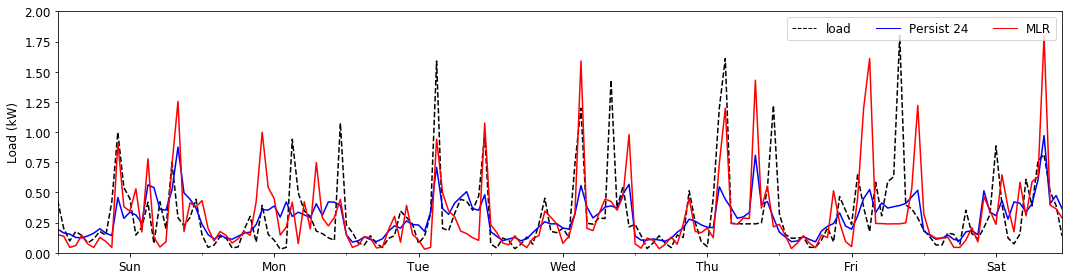

In [72]:
# select random individual user here (note this is just the ROW #, not the uID)

nU=np.random.randint(nUsers)  
#nU=504
uID = hourly_df.iloc[nU].name
print("nU",nU,"Random user uID for plotting: ",uID)


actualIndividual_nU = hourly_df.iloc[nU,startPred:endPred]

plot_forecast(1,startPred,actualIndividual_nU,predQuadraticTempIndividual[nU],predTempUnawareIndividual[nU],seasonalNaive1Individual[nU],\
              seasonalNaive2Individual[nU],'./Figures/agg_result_10_days.png',[0,2])


In [74]:
print(round_up(np.amax(actualIndividual_nU),decimals=-2))
print(round_down(np.amin(actualIndividual_nU),decimals=-2))


100.0
0.0


In [75]:
# get corresponding uID for figure filename
uID = hourly_df.iloc[nU].name
print("Random user uID for plotting: ",uID)


Random user uID for plotting:  4019


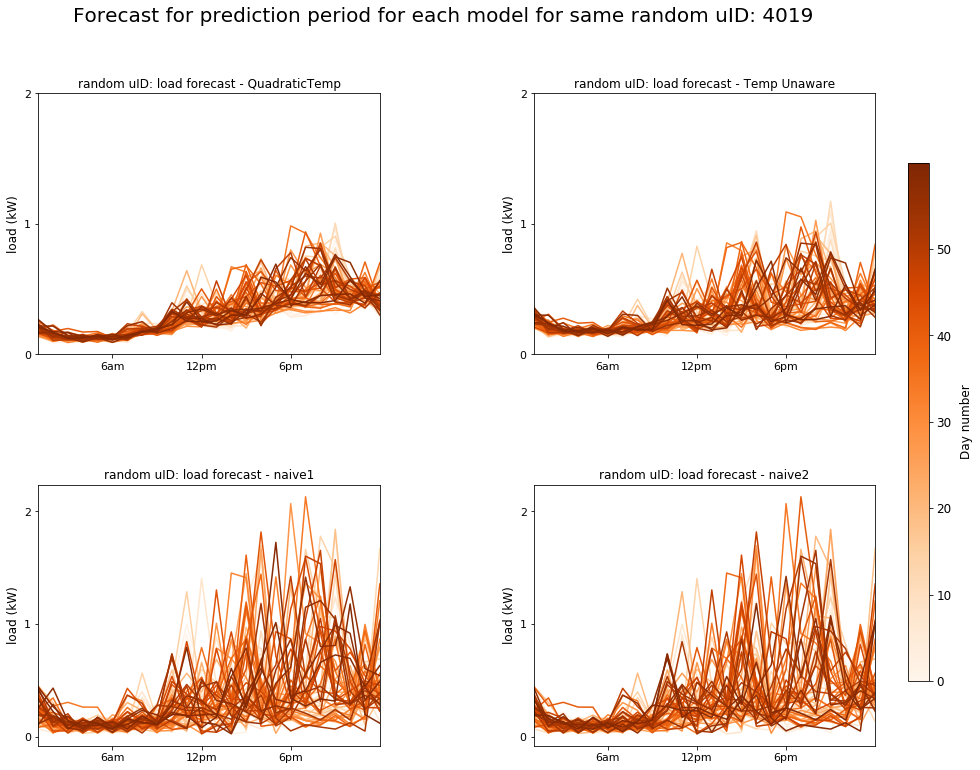

In [76]:
# Plot model predictions for above random individual user 
# AS STACK OF 1 DAY PROFILES

#create colormap
minVal, maxVal = 0, 60.             # 60 days ~ Sep, October
cmOcc = plt.cm.get_cmap('Oranges')
cNorm = colors2.Normalize(vmin=minVal, vmax=maxVal)
scalarMap3 = cmx.ScalarMappable(norm=cNorm, cmap=cmOcc)
scalarMap3._A = []

# Look at each day in the forecast period
fig = plt.figure(figsize = (15,12))
axs = [fig.add_subplot(2,2,i+1) for i in range(4)]

counter = 0
for row in (predQuadraticTempIndividual[nU]).reshape(int(lenPrediction/24),24):               # reshape to 61*24 ie each row is 1 day 
    cl = scalarMap3.to_rgba((counter/np.float(lenPrediction/24))*60)        # scale colour by day (counter) value
    cl = colors2.rgb2hex(cl)
    axs[0].plot(np.arange(1,25),row,color=cl)                               #plot QuadT predicted aggregate load curve for day with colour of day
    counter+=1

counter = 0
for row in (predTempUnawareIndividual[nU]).reshape(int(lenPrediction/24),24):
    cl = scalarMap3.to_rgba((counter/np.float(lenPrediction/24))*60)
    cl = colors2.rgb2hex(cl)
    axs[1].plot(np.arange(1,25),row,color=cl)                            #plot T unaware predicted aggregate  load curve for day with colour of day
    counter+=1

counter = 0
for row in (seasonalNaive1Individual[nU]).reshape(int(lenPrediction/24),24):
    cl = scalarMap3.to_rgba((counter/np.float(lenPrediction/24))*60)
    cl = colors2.rgb2hex(cl)
    axs[2].plot(np.arange(1,25),row,color=cl)                            #plot seasonal naive1  aggregate  load curve for day with colour of day
    counter+=1

counter = 0
for row in (seasonalNaive2Individual[nU]).reshape(int(lenPrediction/24),24):
    cl = scalarMap3.to_rgba((counter/np.float(lenPrediction/24))*60)
    cl = colors2.rgb2hex(cl)
    axs[3].plot(np.arange(1,25),row,color=cl)                            #plot seasonal naive2  aggregate  load curve for day with colour of day
    counter+=1

plotTitles = ['random uID: load forecast - QuadraticTemp', 'random uID: load forecast - Temp Unaware', 'random uID: load forecast - naive1', 'random uID: load forecast - naive2']

for i in range(4):
    axs[i].set_title(plotTitles[i])
    axs[i].set_xlim([1,24])
    axs[i].set_ylabel('load (kW)', fontsize=12)
    axs[i].set_xticks(np.array([6,12,18]))
    axs[i].set_xticklabels(['6am','12pm','6pm'])
    axs[i].tick_params(axis='both', labelsize=11)
axs[0].set_yticks([0,1,2])    
axs[1].set_yticks([0,1,2])
axs[2].set_yticks([0,1,2])
axs[3].set_yticks([0,1,2])
plt.subplots_adjust(wspace=0.45, hspace=0.5)

cbar_ax = plt.axes([0.93, 0.2, 0.02, 0.6])
cbar = fig.colorbar(scalarMap3, cax=cbar_ax, ticks=np.arange(0,60,10), orientation='vertical')
cbar_ax.tick_params(axis='both', which='major', labelsize=12)
cbar.set_label('Day number', labelpad=9, rotation=90, fontsize=12)

fig.suptitle('Forecast for prediction period for each model for same random uID: '+str(uID),fontsize=20)
fname= './Figures/daily_load_evolution_user_' + str(uID) + '.png'
fig.savefig(fname, dpi=300, format='png',  bbox_inches='tight')



** error analysis for random indiviudual nU prediction:  **

In [77]:
#print(lenPrediction)
#print(len(hourly_df.iloc[nU,startPred:endPred].values))
#print(len(predQuadraticTempIndividual[nU]))
#print(len(predTempUnawareIndividual[nU]))
#print(len(seasonalNaive1Individual[nU]))
#print(len(seasonalNaive2Individual[nU]))
#predQuadraticTempIndividual[nU].shape

In [78]:
# calculate MAPE's for the forecast period for random user nU


actualIndividual_nU = hourly_df.iloc[nU,startPred:endPred].values
APEs = np.zeros((lenPrediction,4))
APEs[:,0] = np.abs(seasonalNaive1Individual[nU]-actualIndividual_nU)/np.abs(actualIndividual_nU)
APEs[:,1] = np.abs(seasonalNaive2Individual[nU]-actualIndividual_nU)/np.abs(actualIndividual_nU)
APEs[:,2] = np.abs(predTempUnawareIndividual[nU]-actualIndividual_nU)/np.abs(actualIndividual_nU)
APEs[:,3] = np.abs(predQuadraticTempIndividual[nU]-actualIndividual_nU)/np.abs(actualIndividual_nU)

MAPEs = np.mean(APEs, axis=0)
MAPEs

array([0.87169181, 0.832489  , 0.84222388, 0.73053629])

[0.87169181 0.832489   0.84222388 0.73053629]


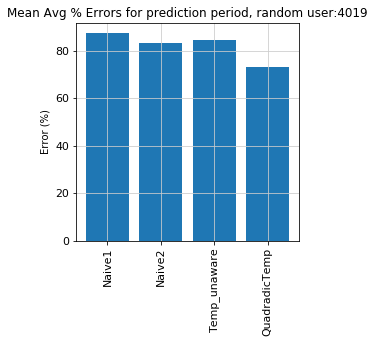

In [79]:
# plot MAPE for each model for random user nU
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)
ax1.bar([0,1,2,3],MAPEs*100)
ax1.set_ylabel('Error (%)')
ax1.grid(which='both')
ax1.set_xticks(np.array([0,1,2,3]))
ax1.set_xticklabels(['Naive1','Naive2','Temp_unaware','QuadradicTemp'],rotation='vertical')
ax1.tick_params(axis='both', labelsize=11)

print(MAPEs)
ax1.set_title('Mean Avg % Errors for prediction period, random user:'+str(uID),fontsize=12)
fig.savefig('./Figures/MLRv1.MAPEs_randomUser.png',dpi=300, format='png',  bbox_inches='tight')




In [80]:
# append latest MAPE for random user with uID
df_MAPEs = pd.concat([df_MAPEs,pd.DataFrame(MAPEs,columns=[uID])],axis=1)
df_MAPEs

Model      4019
0  Naive1 24h Lag   0.871692
1  Naive2 168h Lag  0.832489
2  QuadraticTemp    0.842224
3  Temp Unaware     0.730536

In [81]:
df_MAPEs.to_csv('.\MAPEs_random_user_set1.csv')

In [82]:
df_MAPEs = pd.DataFrame()

labels = ['Naive1 24h Lag', 'Naive2 168h Lag','QuadraticTemp', 'Temp Unaware']
df_MAPEs = pd.DataFrame(labels,columns = ['Model'])

# calculate MAPE's for the forecast for all users

for nU in range(nUsers): 
    actualIndividual_nU = hourly_df.iloc[nU,startPred:endPred].values
    uID = hourly_df.iloc[nU].name
    APEs = np.zeros((lenPrediction,4))
    APEs[:,0] = np.abs(seasonalNaive1Individual[nU]-actualIndividual_nU)/np.abs(actualIndividual_nU)
    APEs[:,1] = np.abs(seasonalNaive2Individual[nU]-actualIndividual_nU)/np.abs(actualIndividual_nU)
    APEs[:,2] = np.abs(predTempUnawareIndividual[nU]-actualIndividual_nU)/np.abs(actualIndividual_nU)
    APEs[:,3] = np.abs(predQuadraticTempIndividual[nU]-actualIndividual_nU)/np.abs(actualIndividual_nU)

    MAPEs = np.mean(APEs, axis=0)
    print(MAPEs)
        
    df_MAPEs = pd.concat([df_MAPEs,pd.DataFrame(MAPEs,columns=[uID])],axis=1)

[0.47200542 0.6174553  0.54278847 0.48673778]
[0.44611847 0.49325701 0.49502267 0.41046452]
[0.44882936 0.52223321 0.40767772 0.37655391]
[0.47431635 0.67259515 0.50755719 0.45166592]
[0.46501894 0.43727854 0.52276349 0.52770349]
[0.46649639 0.49545955 0.45906891 0.409882  ]
[0.7063547  0.66887709 0.76564358 0.65941322]
[0.25486274 0.50145861 0.40592132 0.4156446 ]
[0.5329313  0.72737742 0.66790814 0.55016932]
[0.32293377 0.41591351 0.39532239 0.34992546]
[0.5543881  0.53340957 0.45816211 0.4140467 ]
[0.55224805 0.49196031 0.58623618 0.44191251]
[0.6293039  0.54333439 0.4938581  0.45168734]
[0.49512549 0.58999021 0.52826293 0.46838504]
[0.46610665 0.43771562 0.41721542 0.39825777]
[0.61747601 0.68252399 0.59840209 0.48200762]
[0.28093777 0.29726936 0.25154744 0.24888195]
[0.62456849 0.54278605 0.55171808 0.52500924]
[0.61609315 0.60763537 0.55412829 0.50390999]
[0.49317847 0.4758186  0.47690113 0.36569786]
[1.014373   1.1723466  1.36711301 1.25369552]
[0.85754927 0.94345961 1.23913942 

In [83]:
# Reconfigure MAPEs dataframe
df_MAPEs=df_MAPEs.set_index('Model')


In [84]:
df_MAPEs=df_MAPEs.transpose()
df_MAPEs

Model  Naive1 24h Lag  Naive2 168h Lag  QuadraticTemp  Temp Unaware
2      0.472005        0.617455         0.542788       0.486738    
10     0.446118        0.493257         0.495023       0.410465    
18     0.448829        0.522233         0.407678       0.376554    
19     0.474316        0.672595         0.507557       0.451666    
27     0.465019        0.437279         0.522763       0.527703    
...         ...             ...              ...            ...    
5526   0.420133        0.326676         0.309647       0.290657    
5527   0.586747        0.857461         0.860721       0.906416    
5530   0.449764        0.448470         0.547291       0.375283    
5539   0.478826        0.483319         0.454178       0.341331    
5540   0.569267        0.626592         0.674139       0.590582    

[722 rows x 4 columns]

In [85]:
df_MAPEs.dtypes
df_MAPEs.iloc[:,3]

2       0.486738
10      0.410465
18      0.376554
19      0.451666
27      0.527703
          ...   
5526    0.290657
5527    0.906416
5530    0.375283
5539    0.341331
5540    0.590582
Name: Temp Unaware, Length: 722, dtype: float64

Naive1 24h Lag 0
vals:  [ 47.20054216  44.61184699  44.88293649  47.43163465  46.50189442
  46.64963869  70.63547049  25.48627385  53.29313032  32.2933771
  55.43881022  55.22480501  62.93038968  49.51254904  46.61066458
  61.74760114  28.09377686  62.45684922  61.60931533  49.31784655
 101.43729958  85.75492662  90.28698933  67.51526294  79.08789366
  63.5320696   38.04965179  31.68548138  17.9916924   61.86799618
  22.97169317  86.19964925  40.07900145  48.47144001  87.35853873
  65.50600518 119.62550636  68.39911942 111.76484153  36.10323584
  56.69884695  40.72208877 100.47388407  77.80568632  95.10656731
  36.20752838  73.89321507  68.56605008  71.0147517   75.21930945
  40.09213402  69.20480624  51.42699667 107.71452168  50.89825919
  97.39907696  19.7230017   95.72081561  47.40062792  35.46881083
  74.29760807  38.17604915  30.59095415  88.48918998  80.75423728
  35.07520787  32.89506394  62.64445695  50.76649864  97.9140464
  40.14303011  82.55446352  37.87732829  42.52134402  

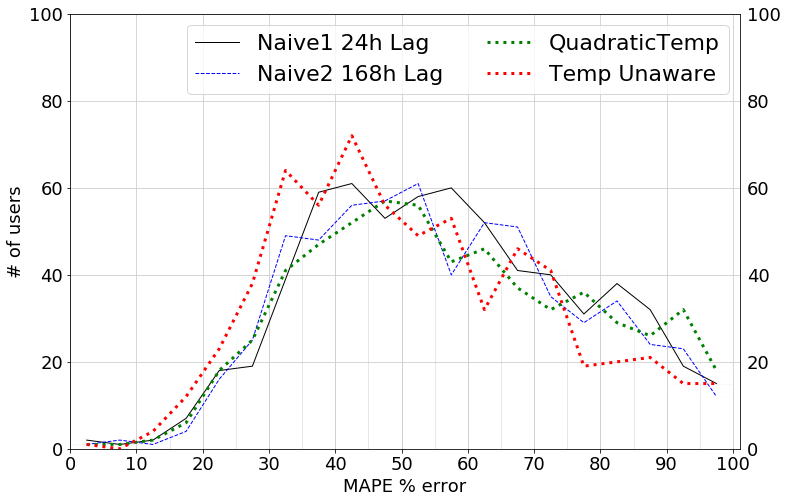

In [86]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
    
bins = np.arange(0,101,5) 
vals = df_MAPEs.iloc[:,3].values*100
hist,edges = np.histogram(vals, bins, density=False) 
widths = edges[1:]-edges[0:-1]  # bin edges
bin_centres = 0.5*(edges[1:]+edges[:-1])

colors=['k','b','g','r']         
lineStyles=['solid','dashed','dotted','dotted']   #dashdot'
lineWeights=[1,1,3,3]
names=np.array(df_MAPEs.columns) 

for k,name in enumerate(names): 
    print(name,k)
    vals = df_MAPEs[name].values*100
    print("vals: ",vals)
    cl=colors[k]
    lSt=lineStyles[k]

    hist,edges = np.histogram(vals, bins, density=False) 
    ax1.scatter(bin_centres,hist,color=cl,edgecolor=cl, alpha = 0.01, facecolor= 'None') 
    ax1.plot(bin_centres,hist,label=name,color=cl,linestyle=lSt ,lw=lineWeights[k]) 
    ax1.bar(edges[0:-1]+widths/2,hist,width=widths,edgecolor='k', alpha = 0.01, facecolor= 'None')
ax1.set_xlabel('MAPE % error',fontsize=18)
ax1.set_ylabel('# of users',fontsize=18)
ax1.set_ylim([0,100])
ax1.set_xlim([0,101])
ax1.set_xticks(np.arange(0,101,10))
ax1.tick_params(labeltop=False, labelright=True,labelsize=18)

#ax1.set_title('Mean Avg % Errors: (Forecast-Actual)/Actual for prediction period',fontsize=20)
ax1.grid(which='both')

plt.legend(ncol=2,fontsize=22)
fig.savefig('./Figures/MAPE errors - individual forecasts.png', dpi=300, format='png',  bbox_inches='tight')


In [87]:
df_MAPEs.to_csv('.\MAPEs_all_users.csv')

** Now try forecast for small aggregate group e.g. 50 users **

In [88]:
#nRandUsers = 50
nRandUsers = 10

** should go back and set the following up to iterate several times for different aggregation sizes      
for each aggregation pool, iterate sufficient times to get robust statistics     **

In [89]:
len(cIDs)
hourly_df.index

Int64Index([   2,   10,   18,   19,   27,   40,   49,   57,   60,   91,
            ...
            5461, 5463, 5475, 5518, 5525, 5526, 5527, 5530, 5539, 5540],
           dtype='int64', name='user_id', length=722)

In [90]:
# get  random users   

randIDs = []
for j in range(nRandUsers):
    uID = hourly_df.index.values[np.random.randint(len(hourly_df))]      # select ranbdom set from the  user IDs
    randIDs.append(uID)

#randIDs 
#randIDs50 = randIDs
randIDs10=randIDs



In [91]:
aggLoad_randIDsSubset = hourly_df.loc[randIDs].sum(axis=0)
aggLoad_randIDsSubset

# cf individual case:
#

2013-01-01 00:00:00    2.342
2013-01-01 01:00:00    2.777
2013-01-01 02:00:00    2.662
2013-01-01 03:00:00    5.080
2013-01-01 04:00:00    5.057
                       ...  
2013-12-31 19:00:00    6.143
2013-12-31 20:00:00    5.757
2013-12-31 21:00:00    5.031
2013-12-31 22:00:00    3.629
2013-12-31 23:00:00    4.166
Length: 8760, dtype: float64

** set up training inputs **

In [92]:
# check required inputs

print('The training length = %d hours'%(endTrain-startTrain),'from %d hours'%startTrain,'to %d hours'%endTrain)   #0 ,5832,5832,7296   # 1/Jan to 31/Aug training data; 1/Sep-31/Oct Prediction
print('The prediction length = %d hours'%lenPrediction,'from %d hours'%startPred,'to %d hours'%endPred)

print("featureLength: ",featureLength)    #endPred-(startTrain+168) # we need to train on 24 hours behind

The training length = 5832 hours from 0 hours to 5832 hours
The prediction length = 1464 hours from 5832 hours to 7296 hours
featureLength:  7128


In [93]:
# assuming interaction pattern of load/ Hour of Day/ Temperature remains constant across seasons....

dayClassifier = [[1,2,3,4],[5,6,0]]
allFeaturesAggGrp = np.zeros((featureLength,18))
yData = aggLoad_randIDsSubset[startTrain+168:endPred]         # drop 1st week of year
print(len(yData))          
interestTemp = hourlyTemp[startTrain+168:endPred]




for j in range(len(yData)):             # loop over 

    hourTrain = yData.index[j].hour       
    dayTrain = yData.index[j].dayofweek
    if j==0:
        print(hourTrain)
    # set the DoW * load terms :
    dummy = np.zeros((len(dayClassifier)))  # series of 0
    for k in range(len(dayClassifier)):
        dummy[k] = (dayTrain in dayClassifier[k])   # [0,1] if Sat-Mon or [1,0] if Tues-Fri
    allFeaturesAggGrp[j,0:2] = dummy  # constants for tues-fri and sat-mon   1 or 0  (DoW terms eqn 3)
    
    dummy = np.zeros((len(dayClassifier)))
    for k in range(len(dayClassifier)):             # 1,2
        dummy[k] = (dayTrain in dayClassifier[k])*aggLoad_randIDsSubset[(startTrain+168)+j-24]     
    allFeaturesAggGrp[j,2:4] = dummy   # linear terms for 24 hour lag for tues-fri and sat-mon, l(t-24) term eqn 2

    dummy = np.zeros((len(dayClassifier)))
    for k in range(len(dayClassifier)):
        dummy[k] = (dayTrain in dayClassifier[k])*aggLoad_randIDsSubset[startTrain+j]        # i.e.. start of Jan for j=0    
    allFeaturesAggGrp[j,4:6] = dummy   # linear terms for 168 hour lag for tues-fri and sat-mon, l(t-168) term eqn 2

    # in each daySection there is a constant, a linear temp term and a quadratic term
    dummy = np.zeros((len(timeLists)*3))    # 12 terms
    for k in range(len(timeLists)):         # k = 0 ,1,2,3
        dummy[3*k:3*(k+1)] = (hourTrain in timeLists[k])  # fill HoD terms (1 or 0) for all 12 elements
        dummy[3*k] = dummy[3*k]*interestTemp[j]           # set HoD * T term for HoD [0:3]
        dummy[3*k+1] = dummy[3*k+1]*(interestTemp[j]**2)  # set HoD * T^2 term for HoD [0:3]
        dummy[3*k+2] = dummy[3*k+2]*1                     # set HoD * constant(1) for HoD[0:3]        #(interestTemp[j]**3)*0     # no cubic T term?
    allFeaturesAggGrp[j,6:] = dummy                             # add all 12 HoD-Temperature terms 
    

7128
0


** Set Training and Prediction Data  for aggregate of RandIDs group**

In [94]:
# remember we do not have features for the first week (yData, all FeaturesTrain index0 on 8/Jan)

allFeaturesAggGrpTrain = allFeaturesAggGrp[startTrain:endTrain-168,:]
print(allFeaturesAggGrpTrain.shape)

allFeaturesAggGrpPredict = allFeaturesAggGrp[startPred-168:endPred-168,:]
print(np.shape(allFeaturesAggGrpPredict))

(5664, 18)
(1464, 18)


** Run models for small group aggregate **

In [95]:
# Model with quadratic temperature
clfQuadraticTempAggGrp = linear_model.LinearRegression(fit_intercept=True)    # # create sklearn linear regression object
clfQuadraticTempAggGrp.fit(allFeaturesAggGrpTrain, yData[startTrain:endTrain-168])  # fit linear model (self, X, y[sample_weight=None]) ; X = training data, y target values. Will be cast to X’s dtype if necessary
coefQuadraticTempAggGrp = clfQuadraticTempAggGrp.coef_                 # get fit coefficients for the linear regression (all 18  terms)
coefQuadraticTempAggGrp                              

# Run prediction on training data using regression model coefQuadraticTemp 
# (to get errors from training period later )
trainQuadraticTempAggGrp = clfQuadraticTempAggGrp.predict(allFeaturesAggGrpTrain)

# temperature unaware model  (only 6 terms)
clfTempUnawareAggGrp = linear_model.LinearRegression(fit_intercept=True)   # create sklearn linear regression object
clfTempUnawareAggGrp.fit(allFeaturesAggGrpTrain[:,0:6], yData[startTrain:endTrain-168])   # ignore Temperature terms, use only DoW terms
coefTempUnawareAggGrp = clfTempUnawareAggGrp.coef_

# get errors from training period (predict for training period using regression model coefTempUnaware)
trainTempUnawareAggGrp = clfTempUnawareAggGrp.predict(allFeaturesAggGrpTrain[:,0:6])


** Look at results for validation period **

In [96]:
# lets look at the predicted and actual load for the months of september-october
actual = aggLoad_randIDsSubset[startPred:endPred]
predictedQuadraticTempAggGrp = np.zeros((np.shape(actual)))
predictedTempUnawareAggGrp = np.zeros((np.shape(actual)))
seasonalNaive1AggGrp = aggLoad_randIDsSubset[startPred-24:endPred-24].values   # 24 hr lag naive persistence model
seasonalNaive2AggGrp = aggLoad_randIDsSubset[startPred-168:endPred-168].values # 168 hr lag naive persistence model

# predict using the QUADTRATIC temp model
predictedQuadraticTempAggGrp = clfQuadraticTempAggGrp.predict(allFeaturesAggGrpPredict)     # apply all 18 coeffs to input load and temp data
# predict using the temp unaware model
predictedTempUnawareAggGrp = clfTempUnawareAggGrp.predict(allFeaturesAggGrpPredict[:,0:6])

** Plot results ** 

In [97]:
actual.index
seasonalNaive1AggGrp

array([ 1.709    ,  1.832    ,  1.789    ,  2.795    ,  2.284    ,
        2.724    ,  2.763    ,  2.192    ,  2.359    ,  2.139    ,
        2.824    ,  3.823    ,  2.501    ,  3.519    ,  2.96     ,
        3.218    ,  3.305    ,  3.309    ,  4.39     ,  3.862    ,
        3.943    ,  3.656    ,  2.502    ,  2.374    ,  1.819    ,
        1.616    ,  1.665    ,  1.372    ,  2.347    ,  2.76     ,
        2.604    ,  2.777    ,  2.572    ,  2.427    ,  2.664    ,
        4.083    ,  3.661    ,  3.388    ,  2.734    ,  2.997    ,
        3.315    ,  3.625    ,  3.72     ,  3.764    ,  4.344    ,
        3.441    ,  2.438    ,  2.205    ,  1.766    ,  1.654    ,
        1.731    ,  2.541    ,  3.133    ,  2.186    ,  2.439    ,
        3.428    ,  2.602    ,  2.431    ,  2.416    ,  3.124    ,
        3.245    ,  2.573    ,  2.586    ,  2.988    ,  3.762    ,
        5.04     ,  4.221    ,  4.351    ,  4.138    ,  3.4      ,
        2.943    ,  2.987    ,  2.014    ,  1.631    ,  1.668 

plotStart:  5832 plotEnd:  6072


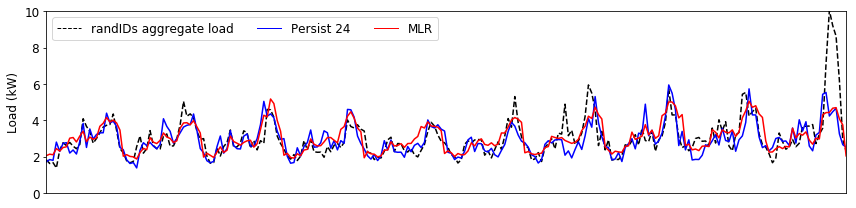

In [98]:
# Plot Actual, Naive Persistance model, MLR Quadratic Temp model


startPeriod = 0

fig = plt.figure(figsize = (12,3))
axs = []
window = [0,240]
plotStart, plotEnd = startPred+window[0], startPred+window[1]
print("plotStart: ",plotStart,"plotEnd: ",plotEnd)
titles = ['Aggregate Load']
axs.append(fig.add_subplot(1,1,1))
    
indexVals = actual.index
# find the first tick
j = startPeriod+window[0]
for ind in indexVals:
    if j >= plotStart:
        if ind.hour == 0:
            startTick = 0+j
            print("startTick :")
            break
    j+=1
j=0

axs[j].plot(np.arange(plotStart,plotEnd), actual[window[0]:window[1]], color='k', linestyle='--')

axs[j].plot(np.arange(plotStart,plotEnd), seasonalNaive1AggGrp[window[0]:window[1]], color='b', linestyle='-')

axs[j].plot(np.arange(plotStart,plotEnd), predictedQuadraticTempAggGrp[window[0]:window[1]], color='r', linestyle='-')

axs[j].set_xlim([plotStart,plotEnd-1])
axs[j].set_xticks(np.arange(startTick,plotEnd,12), minor=True)
axs[j].set_xticks(np.arange(startTick+12,plotEnd,24))
axs[j].set_ylim([0,10])



# revisit - not adding labels
tickLabs = []
#for ti in np.arange(startTick+12,plotEnd,24):
#    tickLabs.append(dayLabels[indexVals[ti-startPred].dayofweek])
#axs[j].set_xticklabels(tickLabs);


axs[j].tick_params(axis='both', labelsize=12)
axs[j].set_ylabel('Load (kW)', fontsize=12);

lineLabels = ['Persist 24','MLR']
lines = []
line = mlines.Line2D([], [], color='k', label='randIDs aggregate load', linewidth=1, linestyle='--')
lines.append(line)
lineColors = ['b','r']
for j in range(2):
    line = mlines.Line2D([], [], color=lineColors[j], label=lineLabels[j], linewidth=1)
    lines.append(line)

axs[0].legend(handles=lines, ncol=3, fontsize=12, frameon=True)

fig.tight_layout()
#fig.savefig('./Figures/RandIDs50_agg_result_10_days.png', dpi=300, format='png',  bbox_inches='tight')
fig.savefig('./Figures/RandIDs10_agg_result_10_days.png', dpi=300, format='png',  bbox_inches='tight')


In [99]:
# calculate MAPE's for the forecast.  
# recall 'actual' contains load data for prediction window, 
# seasonalNaive1,2,predicted etc : all have length = prediction window length ie same as 'actual'

APEs = np.zeros((lenPrediction,4))
APEs[:,0] = np.abs(seasonalNaive1AggGrp-actual)/np.abs(actual)   # diff /actual
APEs[:,1] = np.abs(seasonalNaive2AggGrp-actual)/np.abs(actual)
APEs[:,2] = np.abs(predictedTempUnawareAggGrp-actual)/np.abs(actual)
APEs[:,3] = np.abs(predictedQuadraticTempAggGrp-actual)/np.abs(actual)
APEs

array([[0.06047279, 0.06432106, 0.19367289, 0.12680649],
       [0.13366337, 0.27475248, 0.40948939, 0.3172219 ],
       [0.07447447, 0.02342342, 0.30004432, 0.2599046 ],
       [1.03717201, 0.05685131, 0.98768047, 0.77687668],
       [0.02684278, 0.3792075 , 0.02757618, 0.01984183],
       [0.01304348, 0.15      , 0.05097757, 0.09540048],
       [0.06105991, 0.0203533 , 0.15224492, 0.02640951],
       [0.21065898, 0.00540151, 0.03793826, 0.08474826],
       [0.08281493, 0.47978227, 0.17763517, 0.18455819],
       [0.11866502, 0.44416976, 0.16161856, 0.15478829],
       ...,
       [0.20182013, 0.15926124, 0.14886295, 0.09673736],
       [0.23391554, 0.09661729, 0.17511386, 0.18653063],
       [0.3427673 , 0.07253669, 0.23868627, 0.09610399],
       [0.27480491, 0.13638053, 0.22934735, 0.1476968 ],
       [0.16666667, 0.19211436, 0.19663744, 0.19780502],
       [0.2961388 , 0.15529852, 0.25567965, 0.1981484 ],
       [0.46427499, 0.34283999, 0.41840921, 0.33567487],
       [0.2808785 ,

In [100]:
MAPEs = np.mean(APEs, axis=0)
MAPEs

array([0.23635127, 0.25566789, 0.22868134, 0.21009213])

[0.23635127 0.25566789 0.22868134 0.21009213]


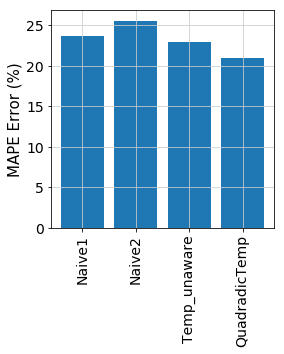

In [101]:
# plot MAPE for aggregate of 50 random users
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)
ax1.bar([0,1,2,3],MAPEs*100)
ax1.set_ylabel('MAPE Error (%)',fontsize=15)
ax1.grid(which='both')
ax1.set_xticks(np.array([0,1,2,3]))
ax1.set_xticklabels(['Naive1','Naive2','Temp_unaware','QuadradicTemp'],rotation='vertical')
ax1.tick_params(axis='both', labelsize=14)

print(MAPEs)
#ax1.set_title('Mean Avg % Errors for prediction period, AGGREGATE of random users:',fontsize=12)
#fig.savefig('./Figures/MAPEs_aggregate50users_iter1.png',dpi=300, format='png',  bbox_inches='tight')
fig.savefig('./Figures/MAPEs_aggregate10users_iter1.png',dpi=300, format='png',  bbox_inches='tight')



